This file will make a plot of N/S vs. E/S, with colour indicating how good the analytic approximation is for the biomass expression. I will do this for both the first and second order approximations.

The equation being approximated is
$$ B = S \int \sum n \varepsilon R$$

and the approximation is
$$ B = 4.17 \frac{E^{4/3}}{S^{1/3} \log(1/\beta)} \left( 1-1.16 \beta^{1/3} \right) $$

Note that at this point, this includes the approximation for the normalization Z, so there are multiple approximations going on here.

Additionally, note that because we want to only have two variables, we are redefining N/S, E/S as just N and E, and B becomes B/S. In this case, the S dependence actually just drops out. So we can pick an S and plot accordingly. Initially, I picked S=1, however this doesn't work very well because the sum for the first constraint goes to N, but it is equal to N/S. So we want S>1 to make these not the same. The smallest S from the dataset was 10, so let's use that.

In [1]:
import pandas as pd
import numpy as np
import biomass as bm

import matplotlib.pyplot as plt
%matplotlib inline

# Ranges for N/S and E/S
The smallest N/S from the data that John has in the table is the Hawaiian arthropods at the Volcano site, with about 11. The largest N/S is 750 at BCI.

The smallest E/S from the data is about 231 from the temperate invetebrates, and the largest is about 290 000 at UCSC.

In [2]:
# Getting the range more accurately
# Read in data
data = pd.read_csv('data_statevariables.txt')
data_ns = data['N']/data['S']
data_es = data['E']/data['S']
# Get max and min
ns_max = np.max(data_ns)
ns_min = np.min(data_ns)
es_max = np.max(data_es)
es_min = np.min(data_es)
print(ns_min,ns_max)
print(es_min,es_max)

11.431137724550899 750.8196721311475
231.0 290354.8387096774


In [3]:
# Define ns and es along with the number in each direction
num_ns = 20
num_es = 40
ns = np.linspace(10,800,num=num_ns)
es = np.logspace(np.log10(200),np.log10(300000),num=num_es)

In [4]:
# Define the default S to use. See below for the reasoning, but it really should be at least 50. There are errors
# below that.
s0 = 100

# Get biomasses

In [7]:
# Numerical
biomass_num = np.zeros([num_es,num_ns]) 
# First order
biomass_1 = np.zeros([num_es,num_ns]) 
# Second order
biomass_2 = np.zeros([num_es,num_ns]) 

In [27]:
# This is slow but should be ok just for a plot
for i,e in enumerate(es):
    for j,n in enumerate(ns):
        # Only do it if e>n, otherwise it's pretty broken.
        if e>n:
            s = pd.Series([s0,n*s0,e*s0],index=['S','N','E'])
            print(n,e) # Print this in case we have an error that we need to follow up on.
#            print(bm.mete_lambdas(s))
            biomass_num[i,j] = bm.biomass(s)
            biomass_1[i,j] = bm.biomass_approx(s,order=0)
            biomass_2[i,j] = bm.biomass_approx(s,order=1)

10.0 200.00000000000003
51.578947368421055 200.00000000000003
93.15789473684211 200.00000000000003
134.73684210526318 200.00000000000003
176.31578947368422 200.00000000000003
10.0 241.25050609304265
51.578947368421055 241.25050609304265
93.15789473684211 241.25050609304265
134.73684210526318 241.25050609304265
176.31578947368422 241.25050609304265
217.89473684210526 241.25050609304265
10.0 291.0090334507463
51.578947368421055 291.0090334507463
93.15789473684211 291.0090334507463
134.73684210526318 291.0090334507463
176.31578947368422 291.0090334507463
217.89473684210526 291.0090334507463
259.47368421052636 291.0090334507463
10.0 351.03038298819854
51.578947368421055 351.03038298819854
93.15789473684211 351.03038298819854
134.73684210526318 351.03038298819854
176.31578947368422 351.03038298819854
217.89473684210526 351.03038298819854
259.47368421052636 351.03038298819854
301.0526315789474 351.03038298819854
342.63157894736844 351.03038298819854
10.0 423.4312877496874
51.578947368421055 

467.3684210526316 3331.2218530274818
508.94736842105266 3331.2218530274818
550.5263157894738 3331.2218530274818
592.1052631578948 3331.2218530274818
633.6842105263158 3331.2218530274818
675.2631578947369 3331.2218530274818
716.8421052631579 3331.2218530274818
758.421052631579 3331.2218530274818
800.0 3331.2218530274818
10.0 4018.29478975542
51.578947368421055 4018.29478975542
93.15789473684211 4018.29478975542
134.73684210526318 4018.29478975542
176.31578947368422 4018.29478975542
217.89473684210526 4018.29478975542
259.47368421052636 4018.29478975542
301.0526315789474 4018.29478975542
342.63157894736844 4018.29478975542
384.2105263157895 4018.29478975542
425.7894736842105 4018.29478975542
467.3684210526316 4018.29478975542
508.94736842105266 4018.29478975542
550.5263157894738 4018.29478975542
592.1052631578948 4018.29478975542
633.6842105263158 4018.29478975542
675.2631578947369 4018.29478975542
716.8421052631579 4018.29478975542
758.421052631579 4018.29478975542
800.0 4018.2947897554

176.31578947368422 31612.75938459414
217.89473684210526 31612.75938459414
259.47368421052636 31612.75938459414
301.0526315789474 31612.75938459414
342.63157894736844 31612.75938459414
384.2105263157895 31612.75938459414
425.7894736842105 31612.75938459414
467.3684210526316 31612.75938459414
508.94736842105266 31612.75938459414
550.5263157894738 31612.75938459414
592.1052631578948 31612.75938459414
633.6842105263158 31612.75938459414
675.2631578947369 31612.75938459414
716.8421052631579 31612.75938459414
758.421052631579 31612.75938459414
800.0 31612.75938459414
10.0 38132.97100265463
51.578947368421055 38132.97100265463
93.15789473684211 38132.97100265463
134.73684210526318 38132.97100265463
176.31578947368422 38132.97100265463
217.89473684210526 38132.97100265463
259.47368421052636 38132.97100265463
301.0526315789474 38132.97100265463
342.63157894736844 38132.97100265463
384.2105263157895 38132.97100265463
425.7894736842105 38132.97100265463
467.3684210526316 38132.97100265463
508.947

675.2631578947369 248704.14148213228
716.8421052631579 248704.14148213228
758.421052631579 248704.14148213228
800.0 248704.14148213228
10.0 300000.0000000001
51.578947368421055 300000.0000000001
93.15789473684211 300000.0000000001
134.73684210526318 300000.0000000001
176.31578947368422 300000.0000000001
217.89473684210526 300000.0000000001
259.47368421052636 300000.0000000001
301.0526315789474 300000.0000000001
342.63157894736844 300000.0000000001
384.2105263157895 300000.0000000001
425.7894736842105 300000.0000000001
467.3684210526316 300000.0000000001
508.94736842105266 300000.0000000001
550.5263157894738 300000.0000000001
592.1052631578948 300000.0000000001
633.6842105263158 300000.0000000001
675.2631578947369 300000.0000000001
716.8421052631579 300000.0000000001
758.421052631579 300000.0000000001
800.0 300000.0000000001


In [28]:
# Get percent differences. Note that in doing this, the S dependence drops out. Since really we care about B/S
biomass_1_percent = (biomass_1-biomass_num)/biomass_num
biomass_2_percent = (biomass_2-biomass_num)/biomass_num
# ignore the nans as those will be for the values where we didn't calculate the biomass

# Get max deviation in both cases to fix colorplot
max_dev_1 = np.nanmax(np.abs(biomass_1_percent))
max_dev_2 = np.nanmax(np.abs(biomass_2_percent))

/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


# Best Plot
This plot uses the log scale below, since it is the easiest to read, and overlays the data points directly so we can see how they do.

In [29]:
# Get percent values to plot
z_bm1 = -np.log10(np.abs(biomass_1_percent))
z_bm2 = -np.log10(np.abs(biomass_2_percent))

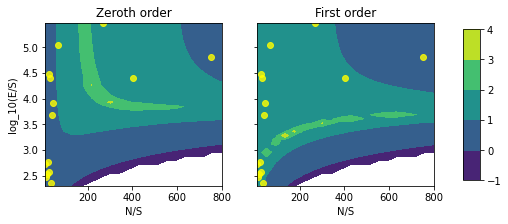

In [30]:
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))

# Set contour range to go from the smallest difference to the biggest, in either data set
# Need one consistent range so colorscheme is accurate
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)

# Plot the contours
im1 = axs[0].contourf(ns,np.log10(es),z_bm1,contour)
im2 = axs[1].contourf(ns,np.log10(es),z_bm2,contour)

# Overlay the data
for ax in axs:
    ax.scatter(data['N']/data['S'],np.log10(data['E']/data['S']),c='yellow',alpha=0.8)

# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels and titles
axs[0].set_ylabel('log_10(E/S)')
for ax in axs:
    ax.set_xlabel('N/S')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

fig.savefig('figures/logcontours_data.pdf')

# Linear Plot

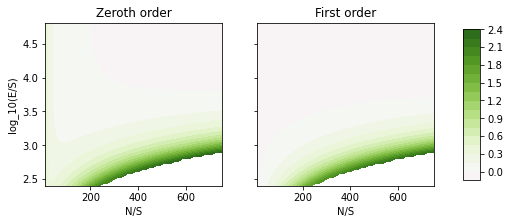

In [10]:
# Look at two approximations in one subfigure
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))
# The number of contours
nc = 20
im1 = axs[0].contourf(ns, np.log10(es), biomass_1_percent, nc, cmap='PiYG', vmin=-max_dev_1, vmax=max_dev_1)
# NOTE: We have to keep the maximums from 1 here for this plot to be accurate!
im2 = axs[1].contourf(ns, np.log10(es), biomass_2_percent, nc, cmap='PiYG', vmin=-max_dev_1, vmax=max_dev_1)
# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)
# Now labels
axs[0].set_ylabel('log_10(E/S)')
for ax in axs:
    ax.set_xlabel('N/S')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

fig.savefig('figures/contours.pdf')

# Log plot
Doing it this way, I could make the contours at different decimal points (integers for log10) to show how precise the approximation is at different spots. This is more interpretable than the above plots.

In [11]:
# To plot
z_bm1 = -np.log10(np.abs(biomass_1_percent))
z_bm2 = -np.log10(np.abs(biomass_2_percent))

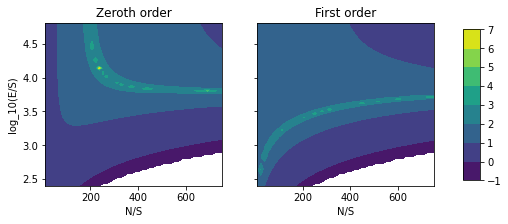

In [12]:
# Combine the two below into one plot
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))
# Set contour range
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)
im1 = axs[0].contourf(ns,np.log10(es),z_bm1,contour)
im2 = axs[1].contourf(ns,np.log10(es),z_bm2,contour)
# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)
# Now labels
axs[0].set_ylabel('log_10(E/S)')
for ax in axs:
    ax.set_xlabel('N/S')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

fig.savefig('figures/logcontours.pdf')

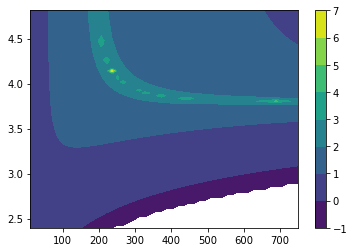

In [200]:
plt.contourf(ns,np.log10(es),-np.log10(np.abs(biomass_1_percent)),
             # Fix range so that it is easily interpretable
             np.arange(np.floor(np.nanmin(z_bm1)),np.ceil(np.nanmax(z_bm1))+1))
plt.colorbar()

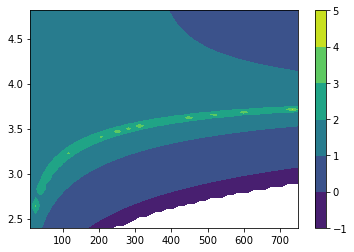

In [201]:
plt.contourf(ns,np.log10(es),-np.log10(np.abs(biomass_2_percent)),
             # Fix range so that it is easily interpretable
             np.arange(np.floor(np.nanmin(z_bm2)),np.ceil(np.nanmax(z_bm2))+1))
plt.colorbar()

# Test Plot
Two options, imshow allows for easier interpolation between points but you have to put in the axes by hand.
The countourf function is a nice option for a contour plot.

To center the colorbar, use vmin and vmax. Another option here: https://stackoverflow.com/questions/7404116/defining-the-midpoint-of-a-colormap-in-matplotlib

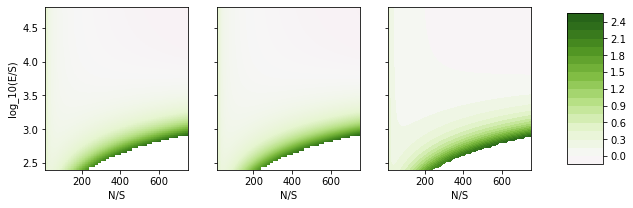

In [156]:
# Show three different plots on same figure for comparison
fig,axs = plt.subplots(1,3,sharey=True,figsize=(10,3))
im = axs[0].imshow(biomass_1_percent, origin='lower',aspect='auto',cmap='PiYG',#interpolation='bilinear',
           extent=[ns[0],ns[-1],np.log10(es[0]),np.log10(es[-1])],vmin=-max_dev_1, vmax=max_dev_1,
             label='imshow, no interp')
im1 = axs[1].imshow(biomass_1_percent, origin='lower',aspect='auto',cmap='PiYG',interpolation='bilinear',
           extent=[ns[0],ns[-1],np.log10(es[0]),np.log10(es[-1])],vmin=-max_dev_1, vmax=max_dev_1,
             label='imshow, bilinear interp')
im2 = axs[2].contourf(ns, np.log10(es), biomass_1_percent, 20, cmap='PiYG', vmin=-max_dev_1, vmax=max_dev_1)

# Have to do tight layout here if I want it
# Add colorbar from one of the images. Note! This only works because vmin is the same in all cases.
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels
axs[0].set_ylabel('log_10(E/S)')
for ax in axs:
    ax.set_xlabel('N/S')

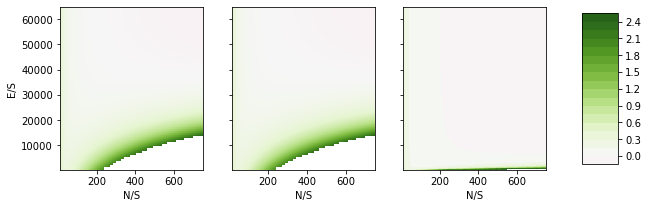

In [157]:
# Now with linear y axis
fig,axs = plt.subplots(1,3,sharey=True,figsize=(10,3))
im = axs[0].imshow(biomass_1_percent, origin='lower',aspect='auto',cmap='PiYG',#interpolation='bilinear',
           extent=[ns[0],ns[-1],es[0],es[-1]],vmin=-max_dev_1, vmax=max_dev_1,
             label='imshow, no interp')
im1 = axs[1].imshow(biomass_1_percent, origin='lower',aspect='auto',cmap='PiYG',interpolation='bilinear',
           extent=[ns[0],ns[-1],es[0],es[-1]],vmin=-max_dev_1, vmax=max_dev_1,
             label='imshow, bilinear interp')
im2 = axs[2].contourf(ns,es, biomass_1_percent, 20, cmap='PiYG', vmin=-max_dev_1, vmax=max_dev_1)

# Have to do tight layout here if I want it
# Add colorbar from one of the images. Note! This only works because vmin is the same in all cases.
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels
axs[0].set_ylabel('E/S')
for ax in axs:
    ax.set_xlabel('N/S')

# Different S
How much does making S, say 100, change things? Careful because I didn't redefine these variables, so going back up and replotting will change things.

In [31]:
s1 = 100

In [32]:
# This is slow but should be ok just for a plot
for i,e in enumerate(es):
    for j,n in enumerate(ns):
        # Only do it if e>n, otherwise it's pretty broken.
        if e>n:
            s = pd.Series([s1,n*s1,e*s1],index=['S','N','E'])
            print(n,e) # Print this in case we have an error that we need to follow up on.
#            print(bm.mete_lambdas(s))
            biomass_num[i,j] = bm.biomass(s)
            biomass_1[i,j] = bm.biomass_approx(s,order=0)
            biomass_2[i,j] = bm.biomass_approx(s,order=1)

10.0 200.00000000000003
51.578947368421055 200.00000000000003
93.15789473684211 200.00000000000003
134.73684210526318 200.00000000000003
176.31578947368422 200.00000000000003
10.0 241.25050609304265
51.578947368421055 241.25050609304265
93.15789473684211 241.25050609304265
134.73684210526318 241.25050609304265
176.31578947368422 241.25050609304265
217.89473684210526 241.25050609304265
10.0 291.0090334507463
51.578947368421055 291.0090334507463
93.15789473684211 291.0090334507463
134.73684210526318 291.0090334507463
176.31578947368422 291.0090334507463
217.89473684210526 291.0090334507463
259.47368421052636 291.0090334507463
10.0 351.03038298819854
51.578947368421055 351.03038298819854
93.15789473684211 351.03038298819854
134.73684210526318 351.03038298819854
176.31578947368422 351.03038298819854
217.89473684210526 351.03038298819854
259.47368421052636 351.03038298819854
301.0526315789474 351.03038298819854
342.63157894736844 351.03038298819854
10.0 423.4312877496874
51.578947368421055 

425.7894736842105 3331.2218530274818
467.3684210526316 3331.2218530274818
508.94736842105266 3331.2218530274818
550.5263157894738 3331.2218530274818
592.1052631578948 3331.2218530274818
633.6842105263158 3331.2218530274818
675.2631578947369 3331.2218530274818
716.8421052631579 3331.2218530274818
758.421052631579 3331.2218530274818
800.0 3331.2218530274818
10.0 4018.29478975542
51.578947368421055 4018.29478975542
93.15789473684211 4018.29478975542
134.73684210526318 4018.29478975542
176.31578947368422 4018.29478975542
217.89473684210526 4018.29478975542
259.47368421052636 4018.29478975542
301.0526315789474 4018.29478975542
342.63157894736844 4018.29478975542
384.2105263157895 4018.29478975542
425.7894736842105 4018.29478975542
467.3684210526316 4018.29478975542
508.94736842105266 4018.29478975542
550.5263157894738 4018.29478975542
592.1052631578948 4018.29478975542
633.6842105263158 4018.29478975542
675.2631578947369 4018.29478975542
716.8421052631579 4018.29478975542
758.421052631579 4

176.31578947368422 31612.75938459414
217.89473684210526 31612.75938459414
259.47368421052636 31612.75938459414
301.0526315789474 31612.75938459414
342.63157894736844 31612.75938459414
384.2105263157895 31612.75938459414
425.7894736842105 31612.75938459414
467.3684210526316 31612.75938459414
508.94736842105266 31612.75938459414
550.5263157894738 31612.75938459414
592.1052631578948 31612.75938459414
633.6842105263158 31612.75938459414
675.2631578947369 31612.75938459414
716.8421052631579 31612.75938459414
758.421052631579 31612.75938459414
800.0 31612.75938459414
10.0 38132.97100265463
51.578947368421055 38132.97100265463
93.15789473684211 38132.97100265463
134.73684210526318 38132.97100265463
176.31578947368422 38132.97100265463
217.89473684210526 38132.97100265463
259.47368421052636 38132.97100265463
301.0526315789474 38132.97100265463
342.63157894736844 38132.97100265463
384.2105263157895 38132.97100265463
425.7894736842105 38132.97100265463
467.3684210526316 38132.97100265463
508.947

675.2631578947369 248704.14148213228
716.8421052631579 248704.14148213228
758.421052631579 248704.14148213228
800.0 248704.14148213228
10.0 300000.0000000001
51.578947368421055 300000.0000000001
93.15789473684211 300000.0000000001
134.73684210526318 300000.0000000001
176.31578947368422 300000.0000000001
217.89473684210526 300000.0000000001
259.47368421052636 300000.0000000001
301.0526315789474 300000.0000000001
342.63157894736844 300000.0000000001
384.2105263157895 300000.0000000001
425.7894736842105 300000.0000000001
467.3684210526316 300000.0000000001
508.94736842105266 300000.0000000001
550.5263157894738 300000.0000000001
592.1052631578948 300000.0000000001
633.6842105263158 300000.0000000001
675.2631578947369 300000.0000000001
716.8421052631579 300000.0000000001
758.421052631579 300000.0000000001
800.0 300000.0000000001


In [34]:
# Get percent differences
biomass_1_percent = (biomass_1-biomass_num)/biomass_num
biomass_2_percent = (biomass_2-biomass_num)/biomass_num
# ignore the nans as those will be for the values where we didn't calculate the biomass

# Get max deviation in both cases to fix colorplot
max_dev_1 = np.nanmax(np.abs(biomass_1_percent))
max_dev_2 = np.nanmax(np.abs(biomass_2_percent))

# Get percent values to plot
z_bm1 = -np.log10(np.abs(biomass_1_percent))
z_bm2 = -np.log10(np.abs(biomass_2_percent))

/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


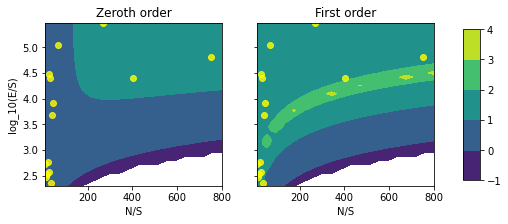

In [35]:
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))

# Set contour range to go from the smallest difference to the biggest, in either data set
# Need one consistent range so colorscheme is accurate
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)

# Plot the contours
im1 = axs[0].contourf(ns,np.log10(es),z_bm1,contour)
im2 = axs[1].contourf(ns,np.log10(es),z_bm2,contour)

# Overlay the data
for ax in axs:
    ax.scatter(data['N']/data['S'],np.log10(data['E']/data['S']),c='yellow',alpha=0.8)

# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels and titles
axs[0].set_ylabel('log_10(E/S)')
for ax in axs:
    ax.set_xlabel('N/S')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

fig.savefig('figures/logcontours_data_s100.pdf')

Why does this matter? The only place I can really see this appearing is that the sum will go to N as opposed to N/S, and similar with the integral for S and E/S, but I feel like those shouldn't matter as much as we see here. 

In [52]:
# Vary S to test this.
srange = np.array([5,10,30,50,100,200,500,800]) # The range of s to text over
for st in srange:
    # Set up test data so N/S and E/S are the same each time
    test_data = pd.Series([st,321000/800*st,20500000/800*st],index=['S','N','E']) # Choose roughly Pasoh
    print('{}    {:.2e}    {:.2e}'.format(st,bm.biomass(test_data),bm.biomass(test_data)/st))
    test_l = bm.mete_lambdas(test_data)
    print('{}    {:.2e}    {:.2e}'.format(st,test_l[0],test_l[1]))
    print()

5    1.56e+06    3.11e+05
5    -6.62e-04    3.96e-05

10    3.49e+06    3.49e+05
10    3.85e-05    3.96e-05

30    1.09e+07    3.63e+05
30    2.59e-04    3.96e-05

50    1.82e+07    3.64e+05
50    2.68e-04    3.96e-05

100    3.64e+07    3.64e+05
100    2.69e-04    3.96e-05

200    7.27e+07    3.64e+05
200    2.69e-04    3.96e-05

500    1.82e+08    3.64e+05
500    2.69e-04    3.96e-05

800    2.91e+08    3.64e+05
800    2.69e-04    3.96e-05



So the lesson here is that when S is large enough, the results converge. This actually makes sense because it basically has to do with the sum in the N/S constraint going high enough to not matter anymore for lambda_1, I think. It's pretty close for S=30 and basically there for S=50, but lower than that is a little dubious.

In [53]:
# Verify this with S=50
s2 = 50

# This is slow but should be ok just for a plot
for i,e in enumerate(es):
    for j,n in enumerate(ns):
        # Only do it if e>n, otherwise it's pretty broken.
        if e>n:
            s = pd.Series([s2,n*s2,e*s2],index=['S','N','E'])
            print(n,e) # Print this in case we have an error that we need to follow up on.
#            print(bm.mete_lambdas(s))
            biomass_num[i,j] = bm.biomass(s)
            biomass_1[i,j] = bm.biomass_approx(s,order=0)
            biomass_2[i,j] = bm.biomass_approx(s,order=1)

10.0 200.00000000000003
51.578947368421055 200.00000000000003
93.15789473684211 200.00000000000003
134.73684210526318 200.00000000000003
176.31578947368422 200.00000000000003
10.0 241.25050609304265
51.578947368421055 241.25050609304265
93.15789473684211 241.25050609304265
134.73684210526318 241.25050609304265
176.31578947368422 241.25050609304265
217.89473684210526 241.25050609304265
10.0 291.0090334507463
51.578947368421055 291.0090334507463
93.15789473684211 291.0090334507463
134.73684210526318 291.0090334507463
176.31578947368422 291.0090334507463
217.89473684210526 291.0090334507463
259.47368421052636 291.0090334507463
10.0 351.03038298819854
51.578947368421055 351.03038298819854
93.15789473684211 351.03038298819854
134.73684210526318 351.03038298819854
176.31578947368422 351.03038298819854
217.89473684210526 351.03038298819854
259.47368421052636 351.03038298819854
301.0526315789474 351.03038298819854
342.63157894736844 351.03038298819854
10.0 423.4312877496874
51.578947368421055 

425.7894736842105 3331.2218530274818
467.3684210526316 3331.2218530274818
508.94736842105266 3331.2218530274818
550.5263157894738 3331.2218530274818
592.1052631578948 3331.2218530274818
633.6842105263158 3331.2218530274818
675.2631578947369 3331.2218530274818
716.8421052631579 3331.2218530274818
758.421052631579 3331.2218530274818
800.0 3331.2218530274818
10.0 4018.29478975542
51.578947368421055 4018.29478975542
93.15789473684211 4018.29478975542
134.73684210526318 4018.29478975542
176.31578947368422 4018.29478975542
217.89473684210526 4018.29478975542
259.47368421052636 4018.29478975542
301.0526315789474 4018.29478975542
342.63157894736844 4018.29478975542
384.2105263157895 4018.29478975542
425.7894736842105 4018.29478975542
467.3684210526316 4018.29478975542
508.94736842105266 4018.29478975542
550.5263157894738 4018.29478975542
592.1052631578948 4018.29478975542
633.6842105263158 4018.29478975542
675.2631578947369 4018.29478975542
716.8421052631579 4018.29478975542
758.421052631579 4

134.73684210526318 31612.75938459414
176.31578947368422 31612.75938459414
217.89473684210526 31612.75938459414
259.47368421052636 31612.75938459414
301.0526315789474 31612.75938459414
342.63157894736844 31612.75938459414
384.2105263157895 31612.75938459414
425.7894736842105 31612.75938459414
467.3684210526316 31612.75938459414
508.94736842105266 31612.75938459414
550.5263157894738 31612.75938459414
592.1052631578948 31612.75938459414
633.6842105263158 31612.75938459414
675.2631578947369 31612.75938459414
716.8421052631579 31612.75938459414
758.421052631579 31612.75938459414
800.0 31612.75938459414
10.0 38132.97100265463
51.578947368421055 38132.97100265463
93.15789473684211 38132.97100265463
134.73684210526318 38132.97100265463
176.31578947368422 38132.97100265463
217.89473684210526 38132.97100265463
259.47368421052636 38132.97100265463
301.0526315789474 38132.97100265463
342.63157894736844 38132.97100265463
384.2105263157895 38132.97100265463
425.7894736842105 38132.97100265463
467.36

633.6842105263158 248704.14148213228
675.2631578947369 248704.14148213228
716.8421052631579 248704.14148213228
758.421052631579 248704.14148213228
800.0 248704.14148213228
10.0 300000.0000000001
51.578947368421055 300000.0000000001
93.15789473684211 300000.0000000001
134.73684210526318 300000.0000000001
176.31578947368422 300000.0000000001
217.89473684210526 300000.0000000001
259.47368421052636 300000.0000000001
301.0526315789474 300000.0000000001
342.63157894736844 300000.0000000001
384.2105263157895 300000.0000000001
425.7894736842105 300000.0000000001
467.3684210526316 300000.0000000001
508.94736842105266 300000.0000000001
550.5263157894738 300000.0000000001
592.1052631578948 300000.0000000001
633.6842105263158 300000.0000000001
675.2631578947369 300000.0000000001
716.8421052631579 300000.0000000001
758.421052631579 300000.0000000001
800.0 300000.0000000001


In [54]:
# Get percent differences
biomass_1_percent = (biomass_1-biomass_num)/biomass_num
biomass_2_percent = (biomass_2-biomass_num)/biomass_num
# ignore the nans as those will be for the values where we didn't calculate the biomass

# Get max deviation in both cases to fix colorplot
max_dev_1 = np.nanmax(np.abs(biomass_1_percent))
max_dev_2 = np.nanmax(np.abs(biomass_2_percent))

# Get percent values to plot
z_bm1 = -np.log10(np.abs(biomass_1_percent))
z_bm2 = -np.log10(np.abs(biomass_2_percent))

/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


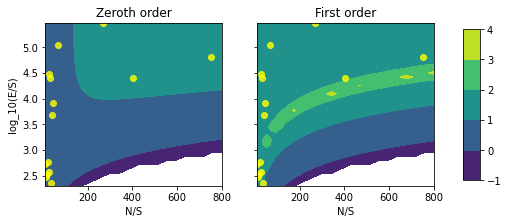

In [55]:
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))

# Set contour range to go from the smallest difference to the biggest, in either data set
# Need one consistent range so colorscheme is accurate
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)

# Plot the contours
im1 = axs[0].contourf(ns,np.log10(es),z_bm1,contour)
im2 = axs[1].contourf(ns,np.log10(es),z_bm2,contour)

# Overlay the data
for ax in axs:
    ax.scatter(data['N']/data['S'],np.log10(data['E']/data['S']),c='yellow',alpha=0.8)

# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels and titles
axs[0].set_ylabel('log_10(E/S)')
for ax in axs:
    ax.set_xlabel('N/S')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

fig.savefig('figures/logcontours_data_s50.pdf')

In [56]:
# Finally with S=30 just to test!
s3 = 30

# This is slow but should be ok just for a plot
for i,e in enumerate(es):
    for j,n in enumerate(ns):
        # Only do it if e>n, otherwise it's pretty broken.
        if e>n:
            s = pd.Series([s3,n*s3,e*s3],index=['S','N','E'])
            print(n,e) # Print this in case we have an error that we need to follow up on.
#            print(bm.mete_lambdas(s))
            biomass_num[i,j] = bm.biomass(s)
            biomass_1[i,j] = bm.biomass_approx(s,order=0)
            biomass_2[i,j] = bm.biomass_approx(s,order=1)

10.0 200.00000000000003
51.578947368421055 200.00000000000003
93.15789473684211 200.00000000000003
134.73684210526318 200.00000000000003
176.31578947368422 200.00000000000003
10.0 241.25050609304265
51.578947368421055 241.25050609304265
93.15789473684211 241.25050609304265
134.73684210526318 241.25050609304265
176.31578947368422 241.25050609304265
217.89473684210526 241.25050609304265
10.0 291.0090334507463
51.578947368421055 291.0090334507463
93.15789473684211 291.0090334507463
134.73684210526318 291.0090334507463
176.31578947368422 291.0090334507463
217.89473684210526 291.0090334507463
259.47368421052636 291.0090334507463
10.0 351.03038298819854
51.578947368421055 351.03038298819854
93.15789473684211 351.03038298819854
134.73684210526318 351.03038298819854
176.31578947368422 351.03038298819854
217.89473684210526 351.03038298819854
259.47368421052636 351.03038298819854
301.0526315789474 351.03038298819854
342.63157894736844 351.03038298819854
10.0 423.4312877496874
51.578947368421055 

384.2105263157895 3331.2218530274818
425.7894736842105 3331.2218530274818
467.3684210526316 3331.2218530274818
508.94736842105266 3331.2218530274818
550.5263157894738 3331.2218530274818
592.1052631578948 3331.2218530274818
633.6842105263158 3331.2218530274818
675.2631578947369 3331.2218530274818
716.8421052631579 3331.2218530274818
758.421052631579 3331.2218530274818
800.0 3331.2218530274818
10.0 4018.29478975542
51.578947368421055 4018.29478975542
93.15789473684211 4018.29478975542
134.73684210526318 4018.29478975542
176.31578947368422 4018.29478975542
217.89473684210526 4018.29478975542
259.47368421052636 4018.29478975542
301.0526315789474 4018.29478975542
342.63157894736844 4018.29478975542
384.2105263157895 4018.29478975542
425.7894736842105 4018.29478975542
467.3684210526316 4018.29478975542
508.94736842105266 4018.29478975542
550.5263157894738 4018.29478975542
592.1052631578948 4018.29478975542
633.6842105263158 4018.29478975542
675.2631578947369 4018.29478975542
716.842105263157

134.73684210526318 31612.75938459414
176.31578947368422 31612.75938459414
217.89473684210526 31612.75938459414
259.47368421052636 31612.75938459414
301.0526315789474 31612.75938459414
342.63157894736844 31612.75938459414
384.2105263157895 31612.75938459414
425.7894736842105 31612.75938459414
467.3684210526316 31612.75938459414
508.94736842105266 31612.75938459414
550.5263157894738 31612.75938459414
592.1052631578948 31612.75938459414
633.6842105263158 31612.75938459414
675.2631578947369 31612.75938459414
716.8421052631579 31612.75938459414
758.421052631579 31612.75938459414
800.0 31612.75938459414
10.0 38132.97100265463
51.578947368421055 38132.97100265463
93.15789473684211 38132.97100265463
134.73684210526318 38132.97100265463
176.31578947368422 38132.97100265463
217.89473684210526 38132.97100265463
259.47368421052636 38132.97100265463
301.0526315789474 38132.97100265463
342.63157894736844 38132.97100265463
384.2105263157895 38132.97100265463
425.7894736842105 38132.97100265463
467.36

633.6842105263158 248704.14148213228
675.2631578947369 248704.14148213228
716.8421052631579 248704.14148213228
758.421052631579 248704.14148213228
800.0 248704.14148213228
10.0 300000.0000000001
51.578947368421055 300000.0000000001
93.15789473684211 300000.0000000001
134.73684210526318 300000.0000000001
176.31578947368422 300000.0000000001
217.89473684210526 300000.0000000001
259.47368421052636 300000.0000000001
301.0526315789474 300000.0000000001
342.63157894736844 300000.0000000001
384.2105263157895 300000.0000000001
425.7894736842105 300000.0000000001
467.3684210526316 300000.0000000001
508.94736842105266 300000.0000000001
550.5263157894738 300000.0000000001
592.1052631578948 300000.0000000001
633.6842105263158 300000.0000000001
675.2631578947369 300000.0000000001
716.8421052631579 300000.0000000001
758.421052631579 300000.0000000001
800.0 300000.0000000001


In [57]:
# Get percent differences
biomass_1_percent = (biomass_1-biomass_num)/biomass_num
biomass_2_percent = (biomass_2-biomass_num)/biomass_num
# ignore the nans as those will be for the values where we didn't calculate the biomass

# Get max deviation in both cases to fix colorplot
max_dev_1 = np.nanmax(np.abs(biomass_1_percent))
max_dev_2 = np.nanmax(np.abs(biomass_2_percent))

# Get percent values to plot
z_bm1 = -np.log10(np.abs(biomass_1_percent))
z_bm2 = -np.log10(np.abs(biomass_2_percent))

/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


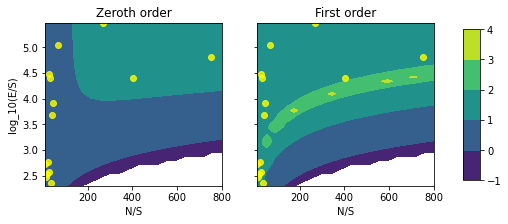

In [58]:
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))

# Set contour range to go from the smallest difference to the biggest, in either data set
# Need one consistent range so colorscheme is accurate
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)

# Plot the contours
im1 = axs[0].contourf(ns,np.log10(es),z_bm1,contour)
im2 = axs[1].contourf(ns,np.log10(es),z_bm2,contour)

# Overlay the data
for ax in axs:
    ax.scatter(data['N']/data['S'],np.log10(data['E']/data['S']),c='yellow',alpha=0.8)

# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels and titles
axs[0].set_ylabel('log_10(E/S)')
for ax in axs:
    ax.set_xlabel('N/S')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

fig.savefig('figures/logcontours_data_s30.pdf')

In [59]:
# WIth S=10 to show why it's bad.
s4 = 10

# This is slow but should be ok just for a plot
for i,e in enumerate(es):
    for j,n in enumerate(ns):
        # Only do it if e>n, otherwise it's pretty broken.
        if e>n:
            s = pd.Series([s4,n*s4,e*s4],index=['S','N','E'])
            print(n,e) # Print this in case we have an error that we need to follow up on.
#            print(bm.mete_lambdas(s))
            biomass_num[i,j] = bm.biomass(s)
            biomass_1[i,j] = bm.biomass_approx(s,order=0)
            biomass_2[i,j] = bm.biomass_approx(s,order=1)

10.0 200.00000000000003
51.578947368421055 200.00000000000003
93.15789473684211 200.00000000000003
134.73684210526318 200.00000000000003
176.31578947368422 200.00000000000003
10.0 241.25050609304265
51.578947368421055 241.25050609304265
93.15789473684211 241.25050609304265
134.73684210526318 241.25050609304265
176.31578947368422 241.25050609304265
217.89473684210526 241.25050609304265
10.0 291.0090334507463
51.578947368421055 291.0090334507463
93.15789473684211 291.0090334507463
134.73684210526318 291.0090334507463
176.31578947368422 291.0090334507463
217.89473684210526 291.0090334507463
259.47368421052636 291.0090334507463
10.0 351.03038298819854
51.578947368421055 351.03038298819854
93.15789473684211 351.03038298819854
134.73684210526318 351.03038298819854
176.31578947368422 351.03038298819854
217.89473684210526 351.03038298819854
259.47368421052636 351.03038298819854
301.0526315789474 351.03038298819854
342.63157894736844 351.03038298819854
10.0 423.4312877496874
51.578947368421055 

384.2105263157895 3331.2218530274818
425.7894736842105 3331.2218530274818
467.3684210526316 3331.2218530274818
508.94736842105266 3331.2218530274818
550.5263157894738 3331.2218530274818
592.1052631578948 3331.2218530274818
633.6842105263158 3331.2218530274818
675.2631578947369 3331.2218530274818
716.8421052631579 3331.2218530274818
758.421052631579 3331.2218530274818
800.0 3331.2218530274818
10.0 4018.29478975542
51.578947368421055 4018.29478975542
93.15789473684211 4018.29478975542
134.73684210526318 4018.29478975542
176.31578947368422 4018.29478975542
217.89473684210526 4018.29478975542
259.47368421052636 4018.29478975542
301.0526315789474 4018.29478975542
342.63157894736844 4018.29478975542
384.2105263157895 4018.29478975542
425.7894736842105 4018.29478975542
467.3684210526316 4018.29478975542
508.94736842105266 4018.29478975542
550.5263157894738 4018.29478975542
592.1052631578948 4018.29478975542
633.6842105263158 4018.29478975542
675.2631578947369 4018.29478975542
716.842105263157

134.73684210526318 31612.75938459414
176.31578947368422 31612.75938459414
217.89473684210526 31612.75938459414
259.47368421052636 31612.75938459414
301.0526315789474 31612.75938459414
342.63157894736844 31612.75938459414
384.2105263157895 31612.75938459414
425.7894736842105 31612.75938459414
467.3684210526316 31612.75938459414
508.94736842105266 31612.75938459414
550.5263157894738 31612.75938459414
592.1052631578948 31612.75938459414
633.6842105263158 31612.75938459414
675.2631578947369 31612.75938459414
716.8421052631579 31612.75938459414
758.421052631579 31612.75938459414
800.0 31612.75938459414
10.0 38132.97100265463
51.578947368421055 38132.97100265463
93.15789473684211 38132.97100265463
134.73684210526318 38132.97100265463
176.31578947368422 38132.97100265463
217.89473684210526 38132.97100265463
259.47368421052636 38132.97100265463
301.0526315789474 38132.97100265463
342.63157894736844 38132.97100265463
384.2105263157895 38132.97100265463
425.7894736842105 38132.97100265463
467.36

592.1052631578948 248704.14148213228
633.6842105263158 248704.14148213228
675.2631578947369 248704.14148213228
716.8421052631579 248704.14148213228
758.421052631579 248704.14148213228
800.0 248704.14148213228
10.0 300000.0000000001
51.578947368421055 300000.0000000001
93.15789473684211 300000.0000000001
134.73684210526318 300000.0000000001
176.31578947368422 300000.0000000001
217.89473684210526 300000.0000000001
259.47368421052636 300000.0000000001
301.0526315789474 300000.0000000001
342.63157894736844 300000.0000000001
384.2105263157895 300000.0000000001
425.7894736842105 300000.0000000001
467.3684210526316 300000.0000000001
508.94736842105266 300000.0000000001
550.5263157894738 300000.0000000001
592.1052631578948 300000.0000000001
633.6842105263158 300000.0000000001
675.2631578947369 300000.0000000001
716.8421052631579 300000.0000000001
758.421052631579 300000.0000000001
800.0 300000.0000000001


In [60]:
# Get percent differences
biomass_1_percent = (biomass_1-biomass_num)/biomass_num
biomass_2_percent = (biomass_2-biomass_num)/biomass_num
# ignore the nans as those will be for the values where we didn't calculate the biomass

# Get max deviation in both cases to fix colorplot
max_dev_1 = np.nanmax(np.abs(biomass_1_percent))
max_dev_2 = np.nanmax(np.abs(biomass_2_percent))

# Get percent values to plot
z_bm1 = -np.log10(np.abs(biomass_1_percent))
z_bm2 = -np.log10(np.abs(biomass_2_percent))

/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


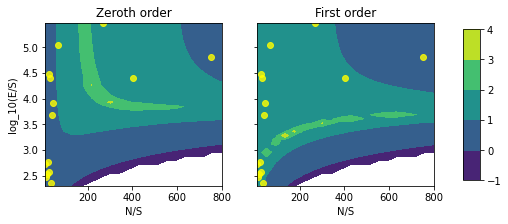

In [61]:
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))

# Set contour range to go from the smallest difference to the biggest, in either data set
# Need one consistent range so colorscheme is accurate
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)

# Plot the contours
im1 = axs[0].contourf(ns,np.log10(es),z_bm1,contour)
im2 = axs[1].contourf(ns,np.log10(es),z_bm2,contour)

# Overlay the data
for ax in axs:
    ax.scatter(data['N']/data['S'],np.log10(data['E']/data['S']),c='yellow',alpha=0.8)

# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels and titles
axs[0].set_ylabel('log_10(E/S)')
for ax in axs:
    ax.set_xlabel('N/S')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

fig.savefig('figures/logcontours_data_s10.pdf')

# Different number of grid points
Just double check the grid is adequate to capture the contours.


### ns =10, es = 20

In [5]:
# Define ns and es along with the number in each direction
num_ns = 10
num_es = 20
ns = np.linspace(10,800,num=num_ns)
es = np.logspace(np.log10(200),np.log10(300000),num=num_es)

# Numerical
biomass_num = np.zeros([num_es,num_ns]) 
# First order
biomass_1 = np.zeros([num_es,num_ns]) 
# Second order
biomass_2 = np.zeros([num_es,num_ns]) 

In [8]:
s0 = 50

# This is slow but should be ok just for a plot
for i,e in enumerate(es):
    for j,n in enumerate(ns):
        # Only do it if e>n, otherwise it's pretty broken.
        if e>n:
            s = pd.Series([s0,n*s0,e*s0],index=['S','N','E'])
            print(n,e) # Print this in case we have an error that we need to follow up on.
#            print(bm.mete_lambdas(s))
            biomass_num[i,j] = bm.biomass(s)
            biomass_1[i,j] = bm.biomass_approx(s,order=0)
            biomass_2[i,j] = bm.biomass_approx(s,order=1)

10.0 200.00000000000003
97.77777777777777 200.00000000000003
185.55555555555554 200.00000000000003
10.0 293.8953356341138
97.77777777777777 293.8953356341138
185.55555555555554 293.8953356341138
273.3333333333333 293.8953356341138
10.0 431.8723415374419
97.77777777777777 431.8723415374419
185.55555555555554 431.8723415374419
273.3333333333333 431.8723415374419
361.1111111111111 431.8723415374419
10.0 634.6263338361861
97.77777777777777 634.6263338361861
185.55555555555554 634.6263338361861
273.3333333333333 634.6263338361861
361.1111111111111 634.6263338361861
448.88888888888886 634.6263338361861
536.6666666666666 634.6263338361861
624.4444444444443 634.6263338361861
10.0 932.5685969251651
97.77777777777777 932.5685969251651
185.55555555555554 932.5685969251651
273.3333333333333 932.5685969251651
361.1111111111111 932.5685969251651
448.88888888888886 932.5685969251651
536.6666666666666 932.5685969251651
624.4444444444443 932.5685969251651
712.2222222222222 932.5685969251651
800.0 932.5

In [9]:
# Get percent differences
biomass_1_percent = (biomass_1-biomass_num)/biomass_num
biomass_2_percent = (biomass_2-biomass_num)/biomass_num
# ignore the nans as those will be for the values where we didn't calculate the biomass

# Get max deviation in both cases to fix colorplot
max_dev_1 = np.nanmax(np.abs(biomass_1_percent))
max_dev_2 = np.nanmax(np.abs(biomass_2_percent))

# Get percent values to plot
z_bm1 = -np.log10(np.abs(biomass_1_percent))
z_bm2 = -np.log10(np.abs(biomass_2_percent))

/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


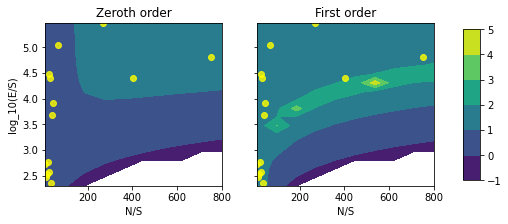

In [10]:
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))

# Set contour range to go from the smallest difference to the biggest, in either data set
# Need one consistent range so colorscheme is accurate
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)

# Plot the contours
im1 = axs[0].contourf(ns,np.log10(es),z_bm1,contour)
im2 = axs[1].contourf(ns,np.log10(es),z_bm2,contour)

# Overlay the data
for ax in axs:
    ax.scatter(data['N']/data['S'],np.log10(data['E']/data['S']),c='yellow',alpha=0.8)

# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels and titles
axs[0].set_ylabel('log_10(E/S)')
for ax in axs:
    ax.set_xlabel('N/S')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

fig.savefig('figures/logcontours_data_ns10es20.pdf')

### ns = 20, es = 20

In [19]:
# Define ns and es along with the number in each direction
num_ns = 20
num_es = 20
ns = np.linspace(10,800,num=num_ns)
es = np.logspace(np.log10(200),np.log10(300000),num=num_es)

# Numerical
biomass_num = np.zeros([num_es,num_ns]) 
# First order
biomass_1 = np.zeros([num_es,num_ns]) 
# Second order
biomass_2 = np.zeros([num_es,num_ns]) 

In [20]:
s0 = 50

# This is slow but should be ok just for a plot
for i,e in enumerate(es):
    for j,n in enumerate(ns):
        # Only do it if e>n, otherwise it's pretty broken.
        if e>n:
            s = pd.Series([s0,n*s0,e*s0],index=['S','N','E'])
            print(n,e) # Print this in case we have an error that we need to follow up on.
#            print(bm.mete_lambdas(s))
            biomass_num[i,j] = bm.biomass(s)
            biomass_1[i,j] = bm.biomass_approx(s,order=0)
            biomass_2[i,j] = bm.biomass_approx(s,order=1)

10.0 200.00000000000003
51.578947368421055 200.00000000000003
93.15789473684211 200.00000000000003
134.73684210526318 200.00000000000003
176.31578947368422 200.00000000000003
10.0 293.8953356341138
51.578947368421055 293.8953356341138
93.15789473684211 293.8953356341138
134.73684210526318 293.8953356341138
176.31578947368422 293.8953356341138
217.89473684210526 293.8953356341138
259.47368421052636 293.8953356341138
10.0 431.8723415374419
51.578947368421055 431.8723415374419
93.15789473684211 431.8723415374419
134.73684210526318 431.8723415374419
176.31578947368422 431.8723415374419
217.89473684210526 431.8723415374419
259.47368421052636 431.8723415374419
301.0526315789474 431.8723415374419
342.63157894736844 431.8723415374419
384.2105263157895 431.8723415374419
425.7894736842105 431.8723415374419
10.0 634.6263338361861
51.578947368421055 634.6263338361861
93.15789473684211 634.6263338361861
134.73684210526318 634.6263338361861
176.31578947368422 634.6263338361861
217.89473684210526 634

550.5263157894738 29795.115112649888
592.1052631578948 29795.115112649888
633.6842105263158 29795.115112649888
675.2631578947369 29795.115112649888
716.8421052631579 29795.115112649888
758.421052631579 29795.115112649888
800.0 29795.115112649888
10.0 43783.226781446516
51.578947368421055 43783.226781446516
93.15789473684211 43783.226781446516
134.73684210526318 43783.226781446516
176.31578947368422 43783.226781446516
217.89473684210526 43783.226781446516
259.47368421052636 43783.226781446516
301.0526315789474 43783.226781446516
342.63157894736844 43783.226781446516
384.2105263157895 43783.226781446516
425.7894736842105 43783.226781446516
467.3684210526316 43783.226781446516
508.94736842105266 43783.226781446516
550.5263157894738 43783.226781446516
592.1052631578948 43783.226781446516
633.6842105263158 43783.226781446516
675.2631578947369 43783.226781446516
716.8421052631579 43783.226781446516
758.421052631579 43783.226781446516
800.0 43783.226781446516
10.0 64338.43065038877
51.5789473

In [21]:

# Get percent differences
biomass_1_percent = (biomass_1-biomass_num)/biomass_num
biomass_2_percent = (biomass_2-biomass_num)/biomass_num
# ignore the nans as those will be for the values where we didn't calculate the biomass

# Get max deviation in both cases to fix colorplot
max_dev_1 = np.nanmax(np.abs(biomass_1_percent))
max_dev_2 = np.nanmax(np.abs(biomass_2_percent))

# Get percent values to plot
z_bm1 = -np.log10(np.abs(biomass_1_percent))
z_bm2 = -np.log10(np.abs(biomass_2_percent))

/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


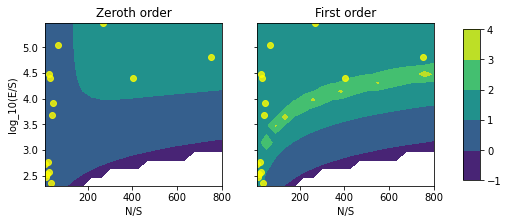

In [22]:
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))

# Set contour range to go from the smallest difference to the biggest, in either data set
# Need one consistent range so colorscheme is accurate
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)

# Plot the contours
im1 = axs[0].contourf(ns,np.log10(es),z_bm1,contour)
im2 = axs[1].contourf(ns,np.log10(es),z_bm2,contour)

# Overlay the data
for ax in axs:
    ax.scatter(data['N']/data['S'],np.log10(data['E']/data['S']),c='yellow',alpha=0.8)

# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels and titles
axs[0].set_ylabel('log_10(E/S)')
for ax in axs:
    ax.set_xlabel('N/S')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

fig.savefig('figures/logcontours_data_ns20es20.pdf')

### ns = 30, es = 20

In [23]:
# Define ns and es along with the number in each direction
num_ns = 30
num_es = 20
ns = np.linspace(10,800,num=num_ns)
es = np.logspace(np.log10(200),np.log10(300000),num=num_es)

# Numerical
biomass_num = np.zeros([num_es,num_ns]) 
# First order
biomass_1 = np.zeros([num_es,num_ns]) 
# Second order
biomass_2 = np.zeros([num_es,num_ns]) 

In [24]:
s0 = 50

# This is slow but should be ok just for a plot
for i,e in enumerate(es):
    for j,n in enumerate(ns):
        # Only do it if e>n, otherwise it's pretty broken.
        if e>n:
            s = pd.Series([s0,n*s0,e*s0],index=['S','N','E'])
            print(n,e) # Print this in case we have an error that we need to follow up on.
#            print(bm.mete_lambdas(s))
            biomass_num[i,j] = bm.biomass(s)
            biomass_1[i,j] = bm.biomass_approx(s,order=0)
            biomass_2[i,j] = bm.biomass_approx(s,order=1)

10.0 200.00000000000003
37.241379310344826 200.00000000000003
64.48275862068965 200.00000000000003
91.72413793103449 200.00000000000003
118.96551724137932 200.00000000000003
146.20689655172416 200.00000000000003
173.44827586206898 200.00000000000003
10.0 293.8953356341138
37.241379310344826 293.8953356341138
64.48275862068965 293.8953356341138
91.72413793103449 293.8953356341138
118.96551724137932 293.8953356341138
146.20689655172416 293.8953356341138
173.44827586206898 293.8953356341138
200.6896551724138 293.8953356341138
227.93103448275863 293.8953356341138
255.17241379310346 293.8953356341138
282.4137931034483 293.8953356341138
10.0 431.8723415374419
37.241379310344826 431.8723415374419
64.48275862068965 431.8723415374419
91.72413793103449 431.8723415374419
118.96551724137932 431.8723415374419
146.20689655172416 431.8723415374419
173.44827586206898 431.8723415374419
200.6896551724138 431.8723415374419
227.93103448275863 431.8723415374419
255.17241379310346 431.8723415374419
282.4137

636.551724137931 6389.903157985248
663.7931034482759 6389.903157985248
691.0344827586207 6389.903157985248
718.2758620689656 6389.903157985248
745.5172413793103 6389.903157985248
772.7586206896552 6389.903157985248
800.0 6389.903157985248
10.0 9389.813666427799
37.241379310344826 9389.813666427799
64.48275862068965 9389.813666427799
91.72413793103449 9389.813666427799
118.96551724137932 9389.813666427799
146.20689655172416 9389.813666427799
173.44827586206898 9389.813666427799
200.6896551724138 9389.813666427799
227.93103448275863 9389.813666427799
255.17241379310346 9389.813666427799
282.4137931034483 9389.813666427799
309.65517241379314 9389.813666427799
336.89655172413796 9389.813666427799
364.1379310344828 9389.813666427799
391.3793103448276 9389.813666427799
418.62068965517244 9389.813666427799
445.86206896551727 9389.813666427799
473.1034482758621 9389.813666427799
500.3448275862069 9389.813666427799
527.5862068965517 9389.813666427799
554.8275862068966 9389.813666427799
582.0689

309.65517241379314 138929.94347913857
336.89655172413796 138929.94347913857
364.1379310344828 138929.94347913857
391.3793103448276 138929.94347913857
418.62068965517244 138929.94347913857
445.86206896551727 138929.94347913857
473.1034482758621 138929.94347913857
500.3448275862069 138929.94347913857
527.5862068965517 138929.94347913857
554.8275862068966 138929.94347913857
582.0689655172414 138929.94347913857
609.3103448275863 138929.94347913857
636.551724137931 138929.94347913857
663.7931034482759 138929.94347913857
691.0344827586207 138929.94347913857
718.2758620689656 138929.94347913857
745.5172413793103 138929.94347913857
772.7586206896552 138929.94347913857
800.0 138929.94347913857
10.0 204154.3118421492
37.241379310344826 204154.3118421492
64.48275862068965 204154.3118421492
91.72413793103449 204154.3118421492
118.96551724137932 204154.3118421492
146.20689655172416 204154.3118421492
173.44827586206898 204154.3118421492
200.6896551724138 204154.3118421492
227.93103448275863 204154.3

In [25]:

# Get percent differences
biomass_1_percent = (biomass_1-biomass_num)/biomass_num
biomass_2_percent = (biomass_2-biomass_num)/biomass_num
# ignore the nans as those will be for the values where we didn't calculate the biomass

# Get max deviation in both cases to fix colorplot
max_dev_1 = np.nanmax(np.abs(biomass_1_percent))
max_dev_2 = np.nanmax(np.abs(biomass_2_percent))

# Get percent values to plot
z_bm1 = -np.log10(np.abs(biomass_1_percent))
z_bm2 = -np.log10(np.abs(biomass_2_percent))

/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


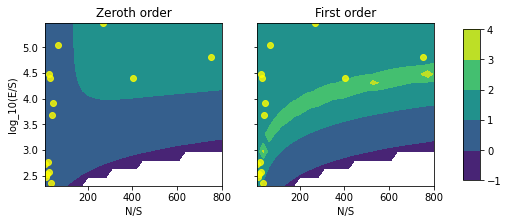

In [26]:
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))

# Set contour range to go from the smallest difference to the biggest, in either data set
# Need one consistent range so colorscheme is accurate
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)

# Plot the contours
im1 = axs[0].contourf(ns,np.log10(es),z_bm1,contour)
im2 = axs[1].contourf(ns,np.log10(es),z_bm2,contour)

# Overlay the data
for ax in axs:
    ax.scatter(data['N']/data['S'],np.log10(data['E']/data['S']),c='yellow',alpha=0.8)

# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels and titles
axs[0].set_ylabel('log_10(E/S)')
for ax in axs:
    ax.set_xlabel('N/S')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

fig.savefig('figures/logcontours_data_ns30es20.pdf')

### ns = 40, es = 20

In [27]:
# Define ns and es along with the number in each direction
num_ns = 40
num_es = 20
ns = np.linspace(10,800,num=num_ns)
es = np.logspace(np.log10(200),np.log10(300000),num=num_es)

# Numerical
biomass_num = np.zeros([num_es,num_ns]) 
# First order
biomass_1 = np.zeros([num_es,num_ns]) 
# Second order
biomass_2 = np.zeros([num_es,num_ns]) 

In [28]:
s0 = 50

# This is slow but should be ok just for a plot
for i,e in enumerate(es):
    for j,n in enumerate(ns):
        # Only do it if e>n, otherwise it's pretty broken.
        if e>n:
            s = pd.Series([s0,n*s0,e*s0],index=['S','N','E'])
            print(n,e) # Print this in case we have an error that we need to follow up on.
#            print(bm.mete_lambdas(s))
            biomass_num[i,j] = bm.biomass(s)
            biomass_1[i,j] = bm.biomass_approx(s,order=0)
            biomass_2[i,j] = bm.biomass_approx(s,order=1)

10.0 200.00000000000003
30.256410256410255 200.00000000000003
50.51282051282051 200.00000000000003
70.76923076923077 200.00000000000003
91.02564102564102 200.00000000000003
111.28205128205127 200.00000000000003
131.53846153846155 200.00000000000003
151.7948717948718 200.00000000000003
172.05128205128204 200.00000000000003
192.3076923076923 200.00000000000003
10.0 293.8953356341138
30.256410256410255 293.8953356341138
50.51282051282051 293.8953356341138
70.76923076923077 293.8953356341138
91.02564102564102 293.8953356341138
111.28205128205127 293.8953356341138
131.53846153846155 293.8953356341138
151.7948717948718 293.8953356341138
172.05128205128204 293.8953356341138
192.3076923076923 293.8953356341138
212.56410256410254 293.8953356341138
232.82051282051282 293.8953356341138
253.07692307692307 293.8953356341138
273.3333333333333 293.8953356341138
293.5897435897436 293.8953356341138
10.0 431.8723415374419
30.256410256410255 431.8723415374419
50.51282051282051 431.8723415374419
70.769230

637.9487179487179 2959.162948586864
658.2051282051282 2959.162948586864
678.4615384615385 2959.162948586864
698.7179487179487 2959.162948586864
718.9743589743589 2959.162948586864
739.2307692307692 2959.162948586864
759.4871794871794 2959.162948586864
779.7435897435897 2959.162948586864
800.0 2959.162948586864
10.0 4348.420939854855
30.256410256410255 4348.420939854855
50.51282051282051 4348.420939854855
70.76923076923077 4348.420939854855
91.02564102564102 4348.420939854855
111.28205128205127 4348.420939854855
131.53846153846155 4348.420939854855
151.7948717948718 4348.420939854855
172.05128205128204 4348.420939854855
192.3076923076923 4348.420939854855
212.56410256410254 4348.420939854855
232.82051282051282 4348.420939854855
253.07692307692307 4348.420939854855
273.3333333333333 4348.420939854855
293.5897435897436 4348.420939854855
313.8461538461538 4348.420939854855
334.1025641025641 4348.420939854855
354.35897435897436 4348.420939854855
374.6153846153846 4348.420939854855
394.87179

394.87179487179486 29795.115112649888
415.1282051282051 29795.115112649888
435.38461538461536 29795.115112649888
455.64102564102564 29795.115112649888
475.89743589743586 29795.115112649888
496.15384615384613 29795.115112649888
516.4102564102564 29795.115112649888
536.6666666666666 29795.115112649888
556.9230769230769 29795.115112649888
577.1794871794872 29795.115112649888
597.4358974358975 29795.115112649888
617.6923076923076 29795.115112649888
637.9487179487179 29795.115112649888
658.2051282051282 29795.115112649888
678.4615384615385 29795.115112649888
698.7179487179487 29795.115112649888
718.9743589743589 29795.115112649888
739.2307692307692 29795.115112649888
759.4871794871794 29795.115112649888
779.7435897435897 29795.115112649888
800.0 29795.115112649888
10.0 43783.226781446516
30.256410256410255 43783.226781446516
50.51282051282051 43783.226781446516
70.76923076923077 43783.226781446516
91.02564102564102 43783.226781446516
111.28205128205127 43783.226781446516
131.53846153846155 

172.05128205128204 300000.0000000001
192.3076923076923 300000.0000000001
212.56410256410254 300000.0000000001
232.82051282051282 300000.0000000001
253.07692307692307 300000.0000000001
273.3333333333333 300000.0000000001
293.5897435897436 300000.0000000001
313.8461538461538 300000.0000000001
334.1025641025641 300000.0000000001
354.35897435897436 300000.0000000001
374.6153846153846 300000.0000000001
394.87179487179486 300000.0000000001
415.1282051282051 300000.0000000001
435.38461538461536 300000.0000000001
455.64102564102564 300000.0000000001
475.89743589743586 300000.0000000001
496.15384615384613 300000.0000000001
516.4102564102564 300000.0000000001
536.6666666666666 300000.0000000001
556.9230769230769 300000.0000000001
577.1794871794872 300000.0000000001
597.4358974358975 300000.0000000001
617.6923076923076 300000.0000000001
637.9487179487179 300000.0000000001
658.2051282051282 300000.0000000001
678.4615384615385 300000.0000000001
698.7179487179487 300000.0000000001
718.9743589743589 

In [29]:

# Get percent differences
biomass_1_percent = (biomass_1-biomass_num)/biomass_num
biomass_2_percent = (biomass_2-biomass_num)/biomass_num
# ignore the nans as those will be for the values where we didn't calculate the biomass

# Get max deviation in both cases to fix colorplot
max_dev_1 = np.nanmax(np.abs(biomass_1_percent))
max_dev_2 = np.nanmax(np.abs(biomass_2_percent))

# Get percent values to plot
z_bm1 = -np.log10(np.abs(biomass_1_percent))
z_bm2 = -np.log10(np.abs(biomass_2_percent))

/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


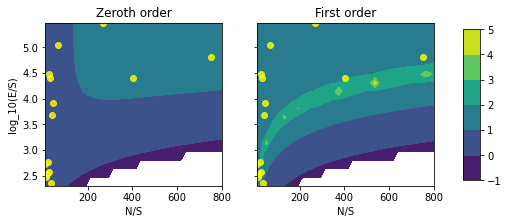

In [30]:
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))

# Set contour range to go from the smallest difference to the biggest, in either data set
# Need one consistent range so colorscheme is accurate
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)

# Plot the contours
im1 = axs[0].contourf(ns,np.log10(es),z_bm1,contour)
im2 = axs[1].contourf(ns,np.log10(es),z_bm2,contour)

# Overlay the data
for ax in axs:
    ax.scatter(data['N']/data['S'],np.log10(data['E']/data['S']),c='yellow',alpha=0.8)

# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels and titles
axs[0].set_ylabel('log_10(E/S)')
for ax in axs:
    ax.set_xlabel('N/S')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

fig.savefig('figures/logcontours_data_ns40es20.pdf')

### ns = 50, es = 20

In [31]:
# Define ns and es along with the number in each direction
num_ns = 50
num_es = 20
ns = np.linspace(10,800,num=num_ns)
es = np.logspace(np.log10(200),np.log10(300000),num=num_es)

# Numerical
biomass_num = np.zeros([num_es,num_ns]) 
# First order
biomass_1 = np.zeros([num_es,num_ns]) 
# Second order
biomass_2 = np.zeros([num_es,num_ns]) 

In [32]:
s0 = 50

# This is slow but should be ok just for a plot
for i,e in enumerate(es):
    for j,n in enumerate(ns):
        # Only do it if e>n, otherwise it's pretty broken.
        if e>n:
            s = pd.Series([s0,n*s0,e*s0],index=['S','N','E'])
            print(n,e) # Print this in case we have an error that we need to follow up on.
#            print(bm.mete_lambdas(s))
            biomass_num[i,j] = bm.biomass(s)
            biomass_1[i,j] = bm.biomass_approx(s,order=0)
            biomass_2[i,j] = bm.biomass_approx(s,order=1)

10.0 200.00000000000003
26.122448979591837 200.00000000000003
42.244897959183675 200.00000000000003
58.36734693877551 200.00000000000003
74.48979591836735 200.00000000000003
90.61224489795919 200.00000000000003
106.73469387755102 200.00000000000003
122.85714285714286 200.00000000000003
138.9795918367347 200.00000000000003
155.10204081632654 200.00000000000003
171.22448979591837 200.00000000000003
187.3469387755102 200.00000000000003
10.0 293.8953356341138
26.122448979591837 293.8953356341138
42.244897959183675 293.8953356341138
58.36734693877551 293.8953356341138
74.48979591836735 293.8953356341138
90.61224489795919 293.8953356341138
106.73469387755102 293.8953356341138
122.85714285714286 293.8953356341138
138.9795918367347 293.8953356341138
155.10204081632654 293.8953356341138
171.22448979591837 293.8953356341138
187.3469387755102 293.8953356341138
203.46938775510205 293.8953356341138
219.59183673469389 293.8953356341138
235.71428571428572 293.8953356341138
251.83673469387756 293.8953

525.9183673469388 2013.7529179917892
542.0408163265306 2013.7529179917892
558.1632653061224 2013.7529179917892
574.2857142857143 2013.7529179917892
590.4081632653061 2013.7529179917892
606.530612244898 2013.7529179917892
622.6530612244899 2013.7529179917892
638.7755102040817 2013.7529179917892
654.8979591836735 2013.7529179917892
671.0204081632653 2013.7529179917892
687.1428571428571 2013.7529179917892
703.265306122449 2013.7529179917892
719.3877551020408 2013.7529179917892
735.5102040816327 2013.7529179917892
751.6326530612246 2013.7529179917892
767.7551020408164 2013.7529179917892
783.8775510204082 2013.7529179917892
800.0 2013.7529179917892
10.0 2959.162948586864
26.122448979591837 2959.162948586864
42.244897959183675 2959.162948586864
58.36734693877551 2959.162948586864
74.48979591836735 2959.162948586864
90.61224489795919 2959.162948586864
106.73469387755102 2959.162948586864
122.85714285714286 2959.162948586864
138.9795918367347 2959.162948586864
155.10204081632654 2959.162948586

219.59183673469389 13798.112195182945
235.71428571428572 13798.112195182945
251.83673469387756 13798.112195182945
267.9591836734694 13798.112195182945
284.0816326530612 13798.112195182945
300.2040816326531 13798.112195182945
316.32653061224494 13798.112195182945
332.44897959183675 13798.112195182945
348.57142857142856 13798.112195182945
364.6938775510204 13798.112195182945
380.8163265306123 13798.112195182945
396.9387755102041 13798.112195182945
413.0612244897959 13798.112195182945
429.18367346938777 13798.112195182945
445.30612244897964 13798.112195182945
461.42857142857144 13798.112195182945
477.55102040816325 13798.112195182945
493.6734693877551 13798.112195182945
509.795918367347 13798.112195182945
525.9183673469388 13798.112195182945
542.0408163265306 13798.112195182945
558.1632653061224 13798.112195182945
574.2857142857143 13798.112195182945
590.4081632653061 13798.112195182945
606.530612244898 13798.112195182945
622.6530612244899 13798.112195182945
638.7755102040817 13798.112195

622.6530612244899 64338.43065038877
638.7755102040817 64338.43065038877
654.8979591836735 64338.43065038877
671.0204081632653 64338.43065038877
687.1428571428571 64338.43065038877
703.265306122449 64338.43065038877
719.3877551020408 64338.43065038877
735.5102040816327 64338.43065038877
751.6326530612246 64338.43065038877
767.7551020408164 64338.43065038877
783.8775510204082 64338.43065038877
800.0 64338.43065038877
10.0 94543.82335084089
26.122448979591837 94543.82335084089
42.244897959183675 94543.82335084089
58.36734693877551 94543.82335084089
74.48979591836735 94543.82335084089
90.61224489795919 94543.82335084089
106.73469387755102 94543.82335084089
122.85714285714286 94543.82335084089
138.9795918367347 94543.82335084089
155.10204081632654 94543.82335084089
171.22448979591837 94543.82335084089
187.3469387755102 94543.82335084089
203.46938775510205 94543.82335084089
219.59183673469389 94543.82335084089
235.71428571428572 94543.82335084089
251.83673469387756 94543.82335084089
267.9591

In [33]:

# Get percent differences
biomass_1_percent = (biomass_1-biomass_num)/biomass_num
biomass_2_percent = (biomass_2-biomass_num)/biomass_num
# ignore the nans as those will be for the values where we didn't calculate the biomass

# Get max deviation in both cases to fix colorplot
max_dev_1 = np.nanmax(np.abs(biomass_1_percent))
max_dev_2 = np.nanmax(np.abs(biomass_2_percent))

# Get percent values to plot
z_bm1 = -np.log10(np.abs(biomass_1_percent))
z_bm2 = -np.log10(np.abs(biomass_2_percent))

/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


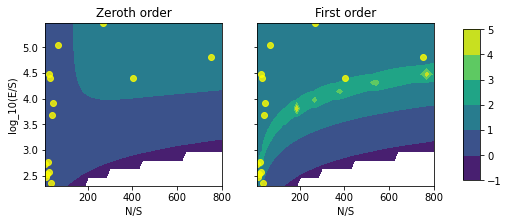

In [34]:
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))

# Set contour range to go from the smallest difference to the biggest, in either data set
# Need one consistent range so colorscheme is accurate
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)

# Plot the contours
im1 = axs[0].contourf(ns,np.log10(es),z_bm1,contour)
im2 = axs[1].contourf(ns,np.log10(es),z_bm2,contour)

# Overlay the data
for ax in axs:
    ax.scatter(data['N']/data['S'],np.log10(data['E']/data['S']),c='yellow',alpha=0.8)

# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels and titles
axs[0].set_ylabel('log_10(E/S)')
for ax in axs:
    ax.set_xlabel('N/S')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

fig.savefig('figures/logcontours_data_ns50es20.pdf')

### ns = 40, es = 40

In [35]:
# Define ns and es along with the number in each direction
num_ns = 40
num_es = 40
ns = np.linspace(10,800,num=num_ns)
es = np.logspace(np.log10(200),np.log10(300000),num=num_es)

# Numerical
biomass_num = np.zeros([num_es,num_ns]) 
# First order
biomass_1 = np.zeros([num_es,num_ns]) 
# Second order
biomass_2 = np.zeros([num_es,num_ns]) 

In [36]:
s0 = 50

# This is slow but should be ok just for a plot
for i,e in enumerate(es):
    for j,n in enumerate(ns):
        # Only do it if e>n, otherwise it's pretty broken.
        if e>n:
            s = pd.Series([s0,n*s0,e*s0],index=['S','N','E'])
            print(n,e) # Print this in case we have an error that we need to follow up on.
#            print(bm.mete_lambdas(s))
            biomass_num[i,j] = bm.biomass(s)
            biomass_1[i,j] = bm.biomass_approx(s,order=0)
            biomass_2[i,j] = bm.biomass_approx(s,order=1)

10.0 200.00000000000003
30.256410256410255 200.00000000000003
50.51282051282051 200.00000000000003
70.76923076923077 200.00000000000003
91.02564102564102 200.00000000000003
111.28205128205127 200.00000000000003
131.53846153846155 200.00000000000003
151.7948717948718 200.00000000000003
172.05128205128204 200.00000000000003
192.3076923076923 200.00000000000003
10.0 241.25050609304265
30.256410256410255 241.25050609304265
50.51282051282051 241.25050609304265
70.76923076923077 241.25050609304265
91.02564102564102 241.25050609304265
111.28205128205127 241.25050609304265
131.53846153846155 241.25050609304265
151.7948717948718 241.25050609304265
172.05128205128204 241.25050609304265
192.3076923076923 241.25050609304265
212.56410256410254 241.25050609304265
232.82051282051282 241.25050609304265
10.0 291.0090334507463
30.256410256410255 291.0090334507463
50.51282051282051 291.0090334507463
70.76923076923077 291.0090334507463
91.02564102564102 291.0090334507463
111.28205128205127 291.00903345074

475.89743589743586 1081.3695403916709
496.15384615384613 1081.3695403916709
516.4102564102564 1081.3695403916709
536.6666666666666 1081.3695403916709
556.9230769230769 1081.3695403916709
577.1794871794872 1081.3695403916709
597.4358974358975 1081.3695403916709
617.6923076923076 1081.3695403916709
637.9487179487179 1081.3695403916709
658.2051282051282 1081.3695403916709
678.4615384615385 1081.3695403916709
698.7179487179487 1081.3695403916709
718.9743589743589 1081.3695403916709
739.2307692307692 1081.3695403916709
759.4871794871794 1081.3695403916709
779.7435897435897 1081.3695403916709
800.0 1081.3695403916709
10.0 1304.4047444654586
30.256410256410255 1304.4047444654586
50.51282051282051 1304.4047444654586
70.76923076923077 1304.4047444654586
91.02564102564102 1304.4047444654586
111.28205128205127 1304.4047444654586
131.53846153846155 1304.4047444654586
151.7948717948718 1304.4047444654586
172.05128205128204 1304.4047444654586
192.3076923076923 1304.4047444654586
212.56410256410254 1

212.56410256410254 3331.2218530274818
232.82051282051282 3331.2218530274818
253.07692307692307 3331.2218530274818
273.3333333333333 3331.2218530274818
293.5897435897436 3331.2218530274818
313.8461538461538 3331.2218530274818
334.1025641025641 3331.2218530274818
354.35897435897436 3331.2218530274818
374.6153846153846 3331.2218530274818
394.87179487179486 3331.2218530274818
415.1282051282051 3331.2218530274818
435.38461538461536 3331.2218530274818
455.64102564102564 3331.2218530274818
475.89743589743586 3331.2218530274818
496.15384615384613 3331.2218530274818
516.4102564102564 3331.2218530274818
536.6666666666666 3331.2218530274818
556.9230769230769 3331.2218530274818
577.1794871794872 3331.2218530274818
597.4358974358975 3331.2218530274818
617.6923076923076 3331.2218530274818
637.9487179487179 3331.2218530274818
658.2051282051282 3331.2218530274818
678.4615384615385 3331.2218530274818
698.7179487179487 3331.2218530274818
718.9743589743589 3331.2218530274818
739.2307692307692 3331.221853

10.0 10262.022943672442
30.256410256410255 10262.022943672442
50.51282051282051 10262.022943672442
70.76923076923077 10262.022943672442
91.02564102564102 10262.022943672442
111.28205128205127 10262.022943672442
131.53846153846155 10262.022943672442
151.7948717948718 10262.022943672442
172.05128205128204 10262.022943672442
192.3076923076923 10262.022943672442
212.56410256410254 10262.022943672442
232.82051282051282 10262.022943672442
253.07692307692307 10262.022943672442
273.3333333333333 10262.022943672442
293.5897435897436 10262.022943672442
313.8461538461538 10262.022943672442
334.1025641025641 10262.022943672442
354.35897435897436 10262.022943672442
374.6153846153846 10262.022943672442
394.87179487179486 10262.022943672442
415.1282051282051 10262.022943672442
435.38461538461536 10262.022943672442
455.64102564102564 10262.022943672442
475.89743589743586 10262.022943672442
496.15384615384613 10262.022943672442
516.4102564102564 10262.022943672442
536.6666666666666 10262.022943672442
5

536.6666666666666 26207.41394208901
556.9230769230769 26207.41394208901
577.1794871794872 26207.41394208901
597.4358974358975 26207.41394208901
617.6923076923076 26207.41394208901
637.9487179487179 26207.41394208901
658.2051282051282 26207.41394208901
678.4615384615385 26207.41394208901
698.7179487179487 26207.41394208901
718.9743589743589 26207.41394208901
739.2307692307692 26207.41394208901
759.4871794871794 26207.41394208901
779.7435897435897 26207.41394208901
800.0 26207.41394208901
10.0 31612.75938459414
30.256410256410255 31612.75938459414
50.51282051282051 31612.75938459414
70.76923076923077 31612.75938459414
91.02564102564102 31612.75938459414
111.28205128205127 31612.75938459414
131.53846153846155 31612.75938459414
151.7948717948718 31612.75938459414
172.05128205128204 31612.75938459414
192.3076923076923 31612.75938459414
212.56410256410254 31612.75938459414
232.82051282051282 31612.75938459414
253.07692307692307 31612.75938459414
273.3333333333333 31612.75938459414
293.589743

354.35897435897436 80733.46508687777
374.6153846153846 80733.46508687777
394.87179487179486 80733.46508687777
415.1282051282051 80733.46508687777
435.38461538461536 80733.46508687777
455.64102564102564 80733.46508687777
475.89743589743586 80733.46508687777
496.15384615384613 80733.46508687777
516.4102564102564 80733.46508687777
536.6666666666666 80733.46508687777
556.9230769230769 80733.46508687777
577.1794871794872 80733.46508687777
597.4358974358975 80733.46508687777
617.6923076923076 80733.46508687777
637.9487179487179 80733.46508687777
658.2051282051282 80733.46508687777
678.4615384615385 80733.46508687777
698.7179487179487 80733.46508687777
718.9743589743589 80733.46508687777
739.2307692307692 80733.46508687777
759.4871794871794 80733.46508687777
779.7435897435897 80733.46508687777
800.0 80733.46508687777
10.0 97384.94655427114
30.256410256410255 97384.94655427114
50.51282051282051 97384.94655427114
70.76923076923077 97384.94655427114
91.02564102564102 97384.94655427114
111.282051

91.02564102564102 248704.14148213228
111.28205128205127 248704.14148213228
131.53846153846155 248704.14148213228
151.7948717948718 248704.14148213228
172.05128205128204 248704.14148213228
192.3076923076923 248704.14148213228
212.56410256410254 248704.14148213228
232.82051282051282 248704.14148213228
253.07692307692307 248704.14148213228
273.3333333333333 248704.14148213228
293.5897435897436 248704.14148213228
313.8461538461538 248704.14148213228
334.1025641025641 248704.14148213228
354.35897435897436 248704.14148213228
374.6153846153846 248704.14148213228
394.87179487179486 248704.14148213228
415.1282051282051 248704.14148213228
435.38461538461536 248704.14148213228
455.64102564102564 248704.14148213228
475.89743589743586 248704.14148213228
496.15384615384613 248704.14148213228
516.4102564102564 248704.14148213228
536.6666666666666 248704.14148213228
556.9230769230769 248704.14148213228
577.1794871794872 248704.14148213228
597.4358974358975 248704.14148213228
617.6923076923076 248704.1

In [37]:

# Get percent differences
biomass_1_percent = (biomass_1-biomass_num)/biomass_num
biomass_2_percent = (biomass_2-biomass_num)/biomass_num
# ignore the nans as those will be for the values where we didn't calculate the biomass

# Get max deviation in both cases to fix colorplot
max_dev_1 = np.nanmax(np.abs(biomass_1_percent))
max_dev_2 = np.nanmax(np.abs(biomass_2_percent))

# Get percent values to plot
z_bm1 = -np.log10(np.abs(biomass_1_percent))
z_bm2 = -np.log10(np.abs(biomass_2_percent))

/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


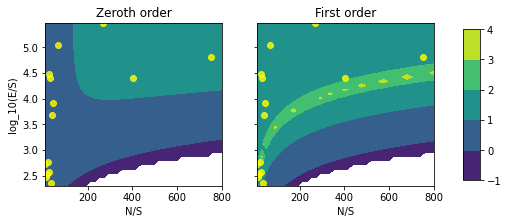

In [38]:
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))

# Set contour range to go from the smallest difference to the biggest, in either data set
# Need one consistent range so colorscheme is accurate
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)

# Plot the contours
im1 = axs[0].contourf(ns,np.log10(es),z_bm1,contour)
im2 = axs[1].contourf(ns,np.log10(es),z_bm2,contour)

# Overlay the data
for ax in axs:
    ax.scatter(data['N']/data['S'],np.log10(data['E']/data['S']),c='yellow',alpha=0.8)

# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels and titles
axs[0].set_ylabel('log_10(E/S)')
for ax in axs:
    ax.set_xlabel('N/S')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

fig.savefig('figures/logcontours_data_ns40es40.pdf')

### ns = 40, es = 80

In [39]:
# Define ns and es along with the number in each direction
num_ns = 40
num_es = 80
ns = np.linspace(10,800,num=num_ns)
es = np.logspace(np.log10(200),np.log10(300000),num=num_es)

# Numerical
biomass_num = np.zeros([num_es,num_ns]) 
# First order
biomass_1 = np.zeros([num_es,num_ns]) 
# Second order
biomass_2 = np.zeros([num_es,num_ns]) 

In [40]:
s0 = 50

# This is slow but should be ok just for a plot
for i,e in enumerate(es):
    for j,n in enumerate(ns):
        # Only do it if e>n, otherwise it's pretty broken.
        if e>n:
            s = pd.Series([s0,n*s0,e*s0],index=['S','N','E'])
            print(n,e) # Print this in case we have an error that we need to follow up on.
#            print(bm.mete_lambdas(s))
            biomass_num[i,j] = bm.biomass(s)
            biomass_1[i,j] = bm.biomass_approx(s,order=0)
            biomass_2[i,j] = bm.biomass_approx(s,order=1)

10.0 200.00000000000003
30.256410256410255 200.00000000000003
50.51282051282051 200.00000000000003
70.76923076923077 200.00000000000003
91.02564102564102 200.00000000000003
111.28205128205127 200.00000000000003
131.53846153846155 200.00000000000003
151.7948717948718 200.00000000000003
172.05128205128204 200.00000000000003
192.3076923076923 200.00000000000003
10.0 219.39851437524436
30.256410256410255 219.39851437524436
50.51282051282051 219.39851437524436
70.76923076923077 219.39851437524436
91.02564102564102 219.39851437524436
111.28205128205127 219.39851437524436
131.53846153846155 219.39851437524436
151.7948717948718 219.39851437524436
172.05128205128204 219.39851437524436
192.3076923076923 219.39851437524436
212.56410256410254 219.39851437524436
10.0 240.6785405503215
30.256410256410255 240.6785405503215
50.51282051282051 240.6785405503215
70.76923076923077 240.6785405503215
91.02564102564102 240.6785405503215
111.28205128205127 240.6785405503215
131.53846153846155 240.678540550321

435.38461538461536 607.399230724991
455.64102564102564 607.399230724991
475.89743589743586 607.399230724991
496.15384615384613 607.399230724991
516.4102564102564 607.399230724991
536.6666666666666 607.399230724991
556.9230769230769 607.399230724991
577.1794871794872 607.399230724991
597.4358974358975 607.399230724991
10.0 666.3124442686463
30.256410256410255 666.3124442686463
50.51282051282051 666.3124442686463
70.76923076923077 666.3124442686463
91.02564102564102 666.3124442686463
111.28205128205127 666.3124442686463
131.53846153846155 666.3124442686463
151.7948717948718 666.3124442686463
172.05128205128204 666.3124442686463
192.3076923076923 666.3124442686463
212.56410256410254 666.3124442686463
232.82051282051282 666.3124442686463
253.07692307692307 666.3124442686463
273.3333333333333 666.3124442686463
293.5897435897436 666.3124442686463
313.8461538461538 666.3124442686463
334.1025641025641 666.3124442686463
354.35897435897436 666.3124442686463
374.6153846153846 666.3124442686463
39

698.7179487179487 1058.5133957305543
718.9743589743589 1058.5133957305543
739.2307692307692 1058.5133957305543
759.4871794871794 1058.5133957305543
779.7435897435897 1058.5133957305543
800.0 1058.5133957305543
10.0 1161.1813323478934
30.256410256410255 1161.1813323478934
50.51282051282051 1161.1813323478934
70.76923076923077 1161.1813323478934
91.02564102564102 1161.1813323478934
111.28205128205127 1161.1813323478934
131.53846153846155 1161.1813323478934
151.7948717948718 1161.1813323478934
172.05128205128204 1161.1813323478934
192.3076923076923 1161.1813323478934
212.56410256410254 1161.1813323478934
232.82051282051282 1161.1813323478934
253.07692307692307 1161.1813323478934
273.3333333333333 1161.1813323478934
293.5897435897436 1161.1813323478934
313.8461538461538 1161.1813323478934
334.1025641025641 1161.1813323478934
354.35897435897436 1161.1813323478934
374.6153846153846 1161.1813323478934
394.87179487179486 1161.1813323478934
415.1282051282051 1161.1813323478934
435.3846153846153

374.6153846153846 1844.6691274265556
394.87179487179486 1844.6691274265556
415.1282051282051 1844.6691274265556
435.38461538461536 1844.6691274265556
455.64102564102564 1844.6691274265556
475.89743589743586 1844.6691274265556
496.15384615384613 1844.6691274265556
516.4102564102564 1844.6691274265556
536.6666666666666 1844.6691274265556
556.9230769230769 1844.6691274265556
577.1794871794872 1844.6691274265556
597.4358974358975 1844.6691274265556
617.6923076923076 1844.6691274265556
637.9487179487179 1844.6691274265556
658.2051282051282 1844.6691274265556
678.4615384615385 1844.6691274265556
698.7179487179487 1844.6691274265556
718.9743589743589 1844.6691274265556
739.2307692307692 1844.6691274265556
759.4871794871794 1844.6691274265556
779.7435897435897 1844.6691274265556
800.0 1844.6691274265556
10.0 2023.5883303563228
30.256410256410255 2023.5883303563228
50.51282051282051 2023.5883303563228
70.76923076923077 2023.5883303563228
91.02564102564102 2023.5883303563228
111.28205128205127 2

131.53846153846155 3214.701111394186
151.7948717948718 3214.701111394186
172.05128205128204 3214.701111394186
192.3076923076923 3214.701111394186
212.56410256410254 3214.701111394186
232.82051282051282 3214.701111394186
253.07692307692307 3214.701111394186
273.3333333333333 3214.701111394186
293.5897435897436 3214.701111394186
313.8461538461538 3214.701111394186
334.1025641025641 3214.701111394186
354.35897435897436 3214.701111394186
374.6153846153846 3214.701111394186
394.87179487179486 3214.701111394186
415.1282051282051 3214.701111394186
435.38461538461536 3214.701111394186
455.64102564102564 3214.701111394186
475.89743589743586 3214.701111394186
496.15384615384613 3214.701111394186
516.4102564102564 3214.701111394186
536.6666666666666 3214.701111394186
556.9230769230769 3214.701111394186
577.1794871794872 3214.701111394186
597.4358974358975 3214.701111394186
617.6923076923076 3214.701111394186
637.9487179487179 3214.701111394186
658.2051282051282 3214.701111394186
678.4615384615385

678.4615384615385 5106.919762568161
698.7179487179487 5106.919762568161
718.9743589743589 5106.919762568161
739.2307692307692 5106.919762568161
759.4871794871794 5106.919762568161
779.7435897435897 5106.919762568161
800.0 5106.919762568161
10.0 5602.2530447051495
30.256410256410255 5602.2530447051495
50.51282051282051 5602.2530447051495
70.76923076923077 5602.2530447051495
91.02564102564102 5602.2530447051495
111.28205128205127 5602.2530447051495
131.53846153846155 5602.2530447051495
151.7948717948718 5602.2530447051495
172.05128205128204 5602.2530447051495
192.3076923076923 5602.2530447051495
212.56410256410254 5602.2530447051495
232.82051282051282 5602.2530447051495
253.07692307692307 5602.2530447051495
273.3333333333333 5602.2530447051495
293.5897435897436 5602.2530447051495
313.8461538461538 5602.2530447051495
334.1025641025641 5602.2530447051495
354.35897435897436 5602.2530447051495
374.6153846153846 5602.2530447051495
394.87179487179486 5602.2530447051495
415.1282051282051 5602.2

475.89743589743586 8899.818613776013
496.15384615384613 8899.818613776013
516.4102564102564 8899.818613776013
536.6666666666666 8899.818613776013
556.9230769230769 8899.818613776013
577.1794871794872 8899.818613776013
597.4358974358975 8899.818613776013
617.6923076923076 8899.818613776013
637.9487179487179 8899.818613776013
658.2051282051282 8899.818613776013
678.4615384615385 8899.818613776013
698.7179487179487 8899.818613776013
718.9743589743589 8899.818613776013
739.2307692307692 8899.818613776013
759.4871794871794 8899.818613776013
779.7435897435897 8899.818613776013
800.0 8899.818613776013
10.0 9763.034910358017
30.256410256410255 9763.034910358017
50.51282051282051 9763.034910358017
70.76923076923077 9763.034910358017
91.02564102564102 9763.034910358017
111.28205128205127 9763.034910358017
131.53846153846155 9763.034910358017
151.7948717948718 9763.034910358017
172.05128205128204 9763.034910358017
192.3076923076923 9763.034910358017
212.56410256410254 9763.034910358017
232.820512

232.82051282051282 15509.695675790785
253.07692307692307 15509.695675790785
273.3333333333333 15509.695675790785
293.5897435897436 15509.695675790785
313.8461538461538 15509.695675790785
334.1025641025641 15509.695675790785
354.35897435897436 15509.695675790785
374.6153846153846 15509.695675790785
394.87179487179486 15509.695675790785
415.1282051282051 15509.695675790785
435.38461538461536 15509.695675790785
455.64102564102564 15509.695675790785
475.89743589743586 15509.695675790785
496.15384615384613 15509.695675790785
516.4102564102564 15509.695675790785
536.6666666666666 15509.695675790785
556.9230769230769 15509.695675790785
577.1794871794872 15509.695675790785
597.4358974358975 15509.695675790785
617.6923076923076 15509.695675790785
637.9487179487179 15509.695675790785
658.2051282051282 15509.695675790785
678.4615384615385 15509.695675790785
698.7179487179487 15509.695675790785
718.9743589743589 15509.695675790785
739.2307692307692 15509.695675790785
759.4871794871794 15509.695675

718.9743589743589 24638.922442081304
739.2307692307692 24638.922442081304
759.4871794871794 24638.922442081304
779.7435897435897 24638.922442081304
800.0 24638.922442081304
10.0 27028.714897997525
30.256410256410255 27028.714897997525
50.51282051282051 27028.714897997525
70.76923076923077 27028.714897997525
91.02564102564102 27028.714897997525
111.28205128205127 27028.714897997525
131.53846153846155 27028.714897997525
151.7948717948718 27028.714897997525
172.05128205128204 27028.714897997525
192.3076923076923 27028.714897997525
212.56410256410254 27028.714897997525
232.82051282051282 27028.714897997525
253.07692307692307 27028.714897997525
273.3333333333333 27028.714897997525
293.5897435897436 27028.714897997525
313.8461538461538 27028.714897997525
334.1025641025641 27028.714897997525
354.35897435897436 27028.714897997525
374.6153846153846 27028.714897997525
394.87179487179486 27028.714897997525
415.1282051282051 27028.714897997525
435.38461538461536 27028.714897997525
455.641025641025

496.15384615384613 42938.19969146065
516.4102564102564 42938.19969146065
536.6666666666666 42938.19969146065
556.9230769230769 42938.19969146065
577.1794871794872 42938.19969146065
597.4358974358975 42938.19969146065
617.6923076923076 42938.19969146065
637.9487179487179 42938.19969146065
658.2051282051282 42938.19969146065
678.4615384615385 42938.19969146065
698.7179487179487 42938.19969146065
718.9743589743589 42938.19969146065
739.2307692307692 42938.19969146065
759.4871794871794 42938.19969146065
779.7435897435897 42938.19969146065
800.0 42938.19969146065
10.0 47102.8861112702
30.256410256410255 47102.8861112702
50.51282051282051 47102.8861112702
70.76923076923077 47102.8861112702
91.02564102564102 47102.8861112702
111.28205128205127 47102.8861112702
131.53846153846155 47102.8861112702
151.7948717948718 47102.8861112702
172.05128205128204 47102.8861112702
192.3076923076923 47102.8861112702
212.56410256410254 47102.8861112702
232.82051282051282 47102.8861112702
253.07692307692307 471

313.8461538461538 74828.31268606448
334.1025641025641 74828.31268606448
354.35897435897436 74828.31268606448
374.6153846153846 74828.31268606448
394.87179487179486 74828.31268606448
415.1282051282051 74828.31268606448
435.38461538461536 74828.31268606448
455.64102564102564 74828.31268606448
475.89743589743586 74828.31268606448
496.15384615384613 74828.31268606448
516.4102564102564 74828.31268606448
536.6666666666666 74828.31268606448
556.9230769230769 74828.31268606448
577.1794871794872 74828.31268606448
597.4358974358975 74828.31268606448
617.6923076923076 74828.31268606448
637.9487179487179 74828.31268606448
658.2051282051282 74828.31268606448
678.4615384615385 74828.31268606448
698.7179487179487 74828.31268606448
718.9743589743589 74828.31268606448
739.2307692307692 74828.31268606448
759.4871794871794 74828.31268606448
779.7435897435897 74828.31268606448
800.0 74828.31268606448
10.0 82086.10318264397
30.256410256410255 82086.10318264397
50.51282051282051 82086.10318264397
70.7692307

111.28205128205127 130403.14730654619
131.53846153846155 130403.14730654619
151.7948717948718 130403.14730654619
172.05128205128204 130403.14730654619
192.3076923076923 130403.14730654619
212.56410256410254 130403.14730654619
232.82051282051282 130403.14730654619
253.07692307692307 130403.14730654619
273.3333333333333 130403.14730654619
293.5897435897436 130403.14730654619
313.8461538461538 130403.14730654619
334.1025641025641 130403.14730654619
354.35897435897436 130403.14730654619
374.6153846153846 130403.14730654619
394.87179487179486 130403.14730654619
415.1282051282051 130403.14730654619
435.38461538461536 130403.14730654619
455.64102564102564 130403.14730654619
475.89743589743586 130403.14730654619
496.15384615384613 130403.14730654619
516.4102564102564 130403.14730654619
536.6666666666666 130403.14730654619
556.9230769230769 130403.14730654619
577.1794871794872 130403.14730654619
597.4358974358975 130403.14730654619
617.6923076923076 130403.14730654619
637.9487179487179 130403.1

597.4358974358975 207160.28862542304
617.6923076923076 207160.28862542304
637.9487179487179 207160.28862542304
658.2051282051282 207160.28862542304
678.4615384615385 207160.28862542304
698.7179487179487 207160.28862542304
718.9743589743589 207160.28862542304
739.2307692307692 207160.28862542304
759.4871794871794 207160.28862542304
779.7435897435897 207160.28862542304
800.0 207160.28862542304
10.0 227253.2978098232
30.256410256410255 227253.2978098232
50.51282051282051 227253.2978098232
70.76923076923077 227253.2978098232
91.02564102564102 227253.2978098232
111.28205128205127 227253.2978098232
131.53846153846155 227253.2978098232
151.7948717948718 227253.2978098232
172.05128205128204 227253.2978098232
192.3076923076923 227253.2978098232
212.56410256410254 227253.2978098232
232.82051282051282 227253.2978098232
253.07692307692307 227253.2978098232
273.3333333333333 227253.2978098232
293.5897435897436 227253.2978098232
313.8461538461538 227253.2978098232
334.1025641025641 227253.2978098232

In [41]:

# Get percent differences
biomass_1_percent = (biomass_1-biomass_num)/biomass_num
biomass_2_percent = (biomass_2-biomass_num)/biomass_num
# ignore the nans as those will be for the values where we didn't calculate the biomass

# Get max deviation in both cases to fix colorplot
max_dev_1 = np.nanmax(np.abs(biomass_1_percent))
max_dev_2 = np.nanmax(np.abs(biomass_2_percent))

# Get percent values to plot
z_bm1 = -np.log10(np.abs(biomass_1_percent))
z_bm2 = -np.log10(np.abs(biomass_2_percent))

/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


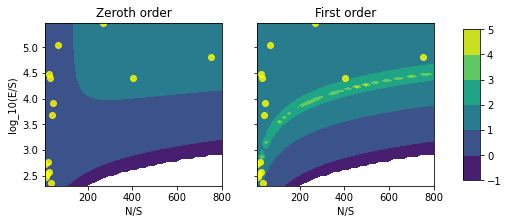

In [42]:
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))

# Set contour range to go from the smallest difference to the biggest, in either data set
# Need one consistent range so colorscheme is accurate
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)

# Plot the contours
im1 = axs[0].contourf(ns,np.log10(es),z_bm1,contour)
im2 = axs[1].contourf(ns,np.log10(es),z_bm2,contour)

# Overlay the data
for ax in axs:
    ax.scatter(data['N']/data['S'],np.log10(data['E']/data['S']),c='yellow',alpha=0.8)

# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels and titles
axs[0].set_ylabel('log_10(E/S)')
for ax in axs:
    ax.set_xlabel('N/S')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

fig.savefig('figures/logcontours_data_ns40es80.pdf')

### ns = 40, es = 150

In [43]:
# Define ns and es along with the number in each direction
num_ns = 40
num_es = 150
ns = np.linspace(10,800,num=num_ns)
es = np.logspace(np.log10(200),np.log10(300000),num=num_es)

# Numerical
biomass_num = np.zeros([num_es,num_ns]) 
# First order
biomass_1 = np.zeros([num_es,num_ns]) 
# Second order
biomass_2 = np.zeros([num_es,num_ns]) 

In [44]:
s0 = 50

# This is slow but should be ok just for a plot
for i,e in enumerate(es):
    for j,n in enumerate(ns):
        # Only do it if e>n, otherwise it's pretty broken.
        if e>n:
            s = pd.Series([s0,n*s0,e*s0],index=['S','N','E'])
            print(n,e) # Print this in case we have an error that we need to follow up on.
#            print(bm.mete_lambdas(s))
            biomass_num[i,j] = bm.biomass(s)
            biomass_1[i,j] = bm.biomass_approx(s,order=0)
            biomass_2[i,j] = bm.biomass_approx(s,order=1)

10.0 200.00000000000003
30.256410256410255 200.00000000000003
50.51282051282051 200.00000000000003
70.76923076923077 200.00000000000003
91.02564102564102 200.00000000000003
111.28205128205127 200.00000000000003
131.53846153846155 200.00000000000003
151.7948717948718 200.00000000000003
172.05128205128204 200.00000000000003
192.3076923076923 200.00000000000003
10.0 210.06129783328282
30.256410256410255 210.06129783328282
50.51282051282051 210.06129783328282
70.76923076923077 210.06129783328282
91.02564102564102 210.06129783328282
111.28205128205127 210.06129783328282
131.53846153846155 210.06129783328282
151.7948717948718 210.06129783328282
172.05128205128204 210.06129783328282
192.3076923076923 210.06129783328282
10.0 220.6287442370155
30.256410256410255 220.6287442370155
50.51282051282051 220.6287442370155
70.76923076923077 220.6287442370155
91.02564102564102 220.6287442370155
111.28205128205127 220.6287442370155
131.53846153846155 220.6287442370155
151.7948717948718 220.6287442370155


313.8461538461538 417.6098430694029
334.1025641025641 417.6098430694029
354.35897435897436 417.6098430694029
374.6153846153846 417.6098430694029
394.87179487179486 417.6098430694029
415.1282051282051 417.6098430694029
10.0 438.61832811556167
30.256410256410255 438.61832811556167
50.51282051282051 438.61832811556167
70.76923076923077 438.61832811556167
91.02564102564102 438.61832811556167
111.28205128205127 438.61832811556167
131.53846153846155 438.61832811556167
151.7948717948718 438.61832811556167
172.05128205128204 438.61832811556167
192.3076923076923 438.61832811556167
212.56410256410254 438.61832811556167
232.82051282051282 438.61832811556167
253.07692307692307 438.61832811556167
273.3333333333333 438.61832811556167
293.5897435897436 438.61832811556167
313.8461538461538 438.61832811556167
334.1025641025641 438.61832811556167
354.35897435897436 438.61832811556167
374.6153846153846 438.61832811556167
394.87179487179486 438.61832811556167
415.1282051282051 438.61832811556167
435.38461

313.8461538461538 649.5538554830604
334.1025641025641 649.5538554830604
354.35897435897436 649.5538554830604
374.6153846153846 649.5538554830604
394.87179487179486 649.5538554830604
415.1282051282051 649.5538554830604
435.38461538461536 649.5538554830604
455.64102564102564 649.5538554830604
475.89743589743586 649.5538554830604
496.15384615384613 649.5538554830604
516.4102564102564 649.5538554830604
536.6666666666666 649.5538554830604
556.9230769230769 649.5538554830604
577.1794871794872 649.5538554830604
597.4358974358975 649.5538554830604
617.6923076923076 649.5538554830604
637.9487179487179 649.5538554830604
10.0 682.2306294769213
30.256410256410255 682.2306294769213
50.51282051282051 682.2306294769213
70.76923076923077 682.2306294769213
91.02564102564102 682.2306294769213
111.28205128205127 682.2306294769213
131.53846153846155 682.2306294769213
151.7948717948718 682.2306294769213
172.05128205128204 682.2306294769213
192.3076923076923 682.2306294769213
212.56410256410254 682.23062947

556.9230769230769 871.9899051422565
577.1794871794872 871.9899051422565
597.4358974358975 871.9899051422565
617.6923076923076 871.9899051422565
637.9487179487179 871.9899051422565
658.2051282051282 871.9899051422565
678.4615384615385 871.9899051422565
698.7179487179487 871.9899051422565
718.9743589743589 871.9899051422565
739.2307692307692 871.9899051422565
759.4871794871794 871.9899051422565
779.7435897435897 871.9899051422565
800.0 871.9899051422565
10.0 915.8566558585178
30.256410256410255 915.8566558585178
50.51282051282051 915.8566558585178
70.76923076923077 915.8566558585178
91.02564102564102 915.8566558585178
111.28205128205127 915.8566558585178
131.53846153846155 915.8566558585178
151.7948717948718 915.8566558585178
172.05128205128204 915.8566558585178
192.3076923076923 915.8566558585178
212.56410256410254 915.8566558585178
232.82051282051282 915.8566558585178
253.07692307692307 915.8566558585178
273.3333333333333 915.8566558585178
293.5897435897436 915.8566558585178
313.846153

334.1025641025641 1170.5979238696568
354.35897435897436 1170.5979238696568
374.6153846153846 1170.5979238696568
394.87179487179486 1170.5979238696568
415.1282051282051 1170.5979238696568
435.38461538461536 1170.5979238696568
455.64102564102564 1170.5979238696568
475.89743589743586 1170.5979238696568
496.15384615384613 1170.5979238696568
516.4102564102564 1170.5979238696568
536.6666666666666 1170.5979238696568
556.9230769230769 1170.5979238696568
577.1794871794872 1170.5979238696568
597.4358974358975 1170.5979238696568
617.6923076923076 1170.5979238696568
637.9487179487179 1170.5979238696568
658.2051282051282 1170.5979238696568
678.4615384615385 1170.5979238696568
698.7179487179487 1170.5979238696568
718.9743589743589 1170.5979238696568
739.2307692307692 1170.5979238696568
759.4871794871794 1170.5979238696568
779.7435897435897 1170.5979238696568
800.0 1170.5979238696568
10.0 1229.4865956450312
30.256410256410255 1229.4865956450312
50.51282051282051 1229.4865956450312
70.76923076923077 1

91.02564102564102 1571.462572315443
111.28205128205127 1571.462572315443
131.53846153846155 1571.462572315443
151.7948717948718 1571.462572315443
172.05128205128204 1571.462572315443
192.3076923076923 1571.462572315443
212.56410256410254 1571.462572315443
232.82051282051282 1571.462572315443
253.07692307692307 1571.462572315443
273.3333333333333 1571.462572315443
293.5897435897436 1571.462572315443
313.8461538461538 1571.462572315443
334.1025641025641 1571.462572315443
354.35897435897436 1571.462572315443
374.6153846153846 1571.462572315443
394.87179487179486 1571.462572315443
415.1282051282051 1571.462572315443
435.38461538461536 1571.462572315443
455.64102564102564 1571.462572315443
475.89743589743586 1571.462572315443
496.15384615384613 1571.462572315443
516.4102564102564 1571.462572315443
536.6666666666666 1571.462572315443
556.9230769230769 1571.462572315443
577.1794871794872 1571.462572315443
597.4358974358975 1571.462572315443
617.6923076923076 1571.462572315443
637.948717948717

637.9487179487179 2008.5575759308597
658.2051282051282 2008.5575759308597
678.4615384615385 2008.5575759308597
698.7179487179487 2008.5575759308597
718.9743589743589 2008.5575759308597
739.2307692307692 2008.5575759308597
759.4871794871794 2008.5575759308597
779.7435897435897 2008.5575759308597
800.0 2008.5575759308597
10.0 2109.6010558645416
30.256410256410255 2109.6010558645416
50.51282051282051 2109.6010558645416
70.76923076923077 2109.6010558645416
91.02564102564102 2109.6010558645416
111.28205128205127 2109.6010558645416
131.53846153846155 2109.6010558645416
151.7948717948718 2109.6010558645416
172.05128205128204 2109.6010558645416
192.3076923076923 2109.6010558645416
212.56410256410254 2109.6010558645416
232.82051282051282 2109.6010558645416
253.07692307692307 2109.6010558645416
273.3333333333333 2109.6010558645416
293.5897435897436 2109.6010558645416
313.8461538461538 2109.6010558645416
334.1025641025641 2109.6010558645416
354.35897435897436 2109.6010558645416
374.6153846153846 

394.87179487179486 2696.3767751115824
415.1282051282051 2696.3767751115824
435.38461538461536 2696.3767751115824
455.64102564102564 2696.3767751115824
475.89743589743586 2696.3767751115824
496.15384615384613 2696.3767751115824
516.4102564102564 2696.3767751115824
536.6666666666666 2696.3767751115824
556.9230769230769 2696.3767751115824
577.1794871794872 2696.3767751115824
597.4358974358975 2696.3767751115824
617.6923076923076 2696.3767751115824
637.9487179487179 2696.3767751115824
658.2051282051282 2696.3767751115824
678.4615384615385 2696.3767751115824
698.7179487179487 2696.3767751115824
718.9743589743589 2696.3767751115824
739.2307692307692 2696.3767751115824
759.4871794871794 2696.3767751115824
779.7435897435897 2696.3767751115824
800.0 2696.3767751115824
10.0 2832.0220241373036
30.256410256410255 2832.0220241373036
50.51282051282051 2832.0220241373036
70.76923076923077 2832.0220241373036
91.02564102564102 2832.0220241373036
111.28205128205127 2832.0220241373036
131.53846153846155 

111.28205128205127 3619.735774809283
131.53846153846155 3619.735774809283
151.7948717948718 3619.735774809283
172.05128205128204 3619.735774809283
192.3076923076923 3619.735774809283
212.56410256410254 3619.735774809283
232.82051282051282 3619.735774809283
253.07692307692307 3619.735774809283
273.3333333333333 3619.735774809283
293.5897435897436 3619.735774809283
313.8461538461538 3619.735774809283
334.1025641025641 3619.735774809283
354.35897435897436 3619.735774809283
374.6153846153846 3619.735774809283
394.87179487179486 3619.735774809283
415.1282051282051 3619.735774809283
435.38461538461536 3619.735774809283
455.64102564102564 3619.735774809283
475.89743589743586 3619.735774809283
496.15384615384613 3619.735774809283
516.4102564102564 3619.735774809283
536.6666666666666 3619.735774809283
556.9230769230769 3619.735774809283
577.1794871794872 3619.735774809283
597.4358974358975 3619.735774809283
617.6923076923076 3619.735774809283
637.9487179487179 3619.735774809283
658.205128205128

678.4615384615385 4626.548440570644
698.7179487179487 4626.548440570644
718.9743589743589 4626.548440570644
739.2307692307692 4626.548440570644
759.4871794871794 4626.548440570644
779.7435897435897 4626.548440570644
800.0 4626.548440570644
10.0 4859.2938495741
30.256410256410255 4859.2938495741
50.51282051282051 4859.2938495741
70.76923076923077 4859.2938495741
91.02564102564102 4859.2938495741
111.28205128205127 4859.2938495741
131.53846153846155 4859.2938495741
151.7948717948718 4859.2938495741
172.05128205128204 4859.2938495741
192.3076923076923 4859.2938495741
212.56410256410254 4859.2938495741
232.82051282051282 4859.2938495741
253.07692307692307 4859.2938495741
273.3333333333333 4859.2938495741
293.5897435897436 4859.2938495741
313.8461538461538 4859.2938495741
334.1025641025641 4859.2938495741
354.35897435897436 4859.2938495741
374.6153846153846 4859.2938495741
394.87179487179486 4859.2938495741
415.1282051282051 4859.2938495741
435.38461538461536 4859.2938495741
455.64102564102

536.6666666666666 6210.883827067763
556.9230769230769 6210.883827067763
577.1794871794872 6210.883827067763
597.4358974358975 6210.883827067763
617.6923076923076 6210.883827067763
637.9487179487179 6210.883827067763
658.2051282051282 6210.883827067763
678.4615384615385 6210.883827067763
698.7179487179487 6210.883827067763
718.9743589743589 6210.883827067763
739.2307692307692 6210.883827067763
759.4871794871794 6210.883827067763
779.7435897435897 6210.883827067763
800.0 6210.883827067763
10.0 6523.331587027997
30.256410256410255 6523.331587027997
50.51282051282051 6523.331587027997
70.76923076923077 6523.331587027997
91.02564102564102 6523.331587027997
111.28205128205127 6523.331587027997
131.53846153846155 6523.331587027997
151.7948717948718 6523.331587027997
172.05128205128204 6523.331587027997
192.3076923076923 6523.331587027997
212.56410256410254 6523.331587027997
232.82051282051282 6523.331587027997
253.07692307692307 6523.331587027997
273.3333333333333 6523.331587027997
293.589743

394.87179487179486 8337.765919635323
415.1282051282051 8337.765919635323
435.38461538461536 8337.765919635323
455.64102564102564 8337.765919635323
475.89743589743586 8337.765919635323
496.15384615384613 8337.765919635323
516.4102564102564 8337.765919635323
536.6666666666666 8337.765919635323
556.9230769230769 8337.765919635323
577.1794871794872 8337.765919635323
597.4358974358975 8337.765919635323
617.6923076923076 8337.765919635323
637.9487179487179 8337.765919635323
658.2051282051282 8337.765919635323
678.4615384615385 8337.765919635323
698.7179487179487 8337.765919635323
718.9743589743589 8337.765919635323
739.2307692307692 8337.765919635323
759.4871794871794 8337.765919635323
779.7435897435897 8337.765919635323
800.0 8337.765919635323
10.0 8757.209650543546
30.256410256410255 8757.209650543546
50.51282051282051 8757.209650543546
70.76923076923077 8757.209650543546
91.02564102564102 8757.209650543546
111.28205128205127 8757.209650543546
131.53846153846155 8757.209650543546
151.79487

151.7948717948718 11192.986773905375
172.05128205128204 11192.986773905375
192.3076923076923 11192.986773905375
212.56410256410254 11192.986773905375
232.82051282051282 11192.986773905375
253.07692307692307 11192.986773905375
273.3333333333333 11192.986773905375
293.5897435897436 11192.986773905375
313.8461538461538 11192.986773905375
334.1025641025641 11192.986773905375
354.35897435897436 11192.986773905375
374.6153846153846 11192.986773905375
394.87179487179486 11192.986773905375
415.1282051282051 11192.986773905375
435.38461538461536 11192.986773905375
455.64102564102564 11192.986773905375
475.89743589743586 11192.986773905375
496.15384615384613 11192.986773905375
516.4102564102564 11192.986773905375
536.6666666666666 11192.986773905375
556.9230769230769 11192.986773905375
577.1794871794872 11192.986773905375
597.4358974358975 11192.986773905375
617.6923076923076 11192.986773905375
637.9487179487179 11192.986773905375
658.2051282051282 11192.986773905375
678.4615384615385 11192.9867

658.2051282051282 14306.263972228251
678.4615384615385 14306.263972228251
698.7179487179487 14306.263972228251
718.9743589743589 14306.263972228251
739.2307692307692 14306.263972228251
759.4871794871794 14306.263972228251
779.7435897435897 14306.263972228251
800.0 14306.263972228251
10.0 15025.96188575901
30.256410256410255 15025.96188575901
50.51282051282051 15025.96188575901
70.76923076923077 15025.96188575901
91.02564102564102 15025.96188575901
111.28205128205127 15025.96188575901
131.53846153846155 15025.96188575901
151.7948717948718 15025.96188575901
172.05128205128204 15025.96188575901
192.3076923076923 15025.96188575901
212.56410256410254 15025.96188575901
232.82051282051282 15025.96188575901
253.07692307692307 15025.96188575901
273.3333333333333 15025.96188575901
293.5897435897436 15025.96188575901
313.8461538461538 15025.96188575901
334.1025641025641 15025.96188575901
354.35897435897436 15025.96188575901
374.6153846153846 15025.96188575901
394.87179487179486 15025.96188575901


374.6153846153846 19205.363279394354
394.87179487179486 19205.363279394354
415.1282051282051 19205.363279394354
435.38461538461536 19205.363279394354
455.64102564102564 19205.363279394354
475.89743589743586 19205.363279394354
496.15384615384613 19205.363279394354
516.4102564102564 19205.363279394354
536.6666666666666 19205.363279394354
556.9230769230769 19205.363279394354
577.1794871794872 19205.363279394354
597.4358974358975 19205.363279394354
617.6923076923076 19205.363279394354
637.9487179487179 19205.363279394354
658.2051282051282 19205.363279394354
678.4615384615385 19205.363279394354
698.7179487179487 19205.363279394354
718.9743589743589 19205.363279394354
739.2307692307692 19205.363279394354
759.4871794871794 19205.363279394354
779.7435897435897 19205.363279394354
800.0 19205.363279394354
10.0 20171.51767914625
30.256410256410255 20171.51767914625
50.51282051282051 20171.51767914625
70.76923076923077 20171.51767914625
91.02564102564102 20171.51767914625
111.28205128205127 20171.

131.53846153846155 25782.13147817795
151.7948717948718 25782.13147817795
172.05128205128204 25782.13147817795
192.3076923076923 25782.13147817795
212.56410256410254 25782.13147817795
232.82051282051282 25782.13147817795
253.07692307692307 25782.13147817795
273.3333333333333 25782.13147817795
293.5897435897436 25782.13147817795
313.8461538461538 25782.13147817795
334.1025641025641 25782.13147817795
354.35897435897436 25782.13147817795
374.6153846153846 25782.13147817795
394.87179487179486 25782.13147817795
415.1282051282051 25782.13147817795
435.38461538461536 25782.13147817795
455.64102564102564 25782.13147817795
475.89743589743586 25782.13147817795
496.15384615384613 25782.13147817795
516.4102564102564 25782.13147817795
536.6666666666666 25782.13147817795
556.9230769230769 25782.13147817795
577.1794871794872 25782.13147817795
597.4358974358975 25782.13147817795
617.6923076923076 25782.13147817795
637.9487179487179 25782.13147817795
658.2051282051282 25782.13147817795
678.4615384615385

698.7179487179487 32953.31140329884
718.9743589743589 32953.31140329884
739.2307692307692 32953.31140329884
759.4871794871794 32953.31140329884
779.7435897435897 32953.31140329884
800.0 32953.31140329884
10.0 34611.07680640629
30.256410256410255 34611.07680640629
50.51282051282051 34611.07680640629
70.76923076923077 34611.07680640629
91.02564102564102 34611.07680640629
111.28205128205127 34611.07680640629
131.53846153846155 34611.07680640629
151.7948717948718 34611.07680640629
172.05128205128204 34611.07680640629
192.3076923076923 34611.07680640629
212.56410256410254 34611.07680640629
232.82051282051282 34611.07680640629
253.07692307692307 34611.07680640629
273.3333333333333 34611.07680640629
293.5897435897436 34611.07680640629
313.8461538461538 34611.07680640629
334.1025641025641 34611.07680640629
354.35897435897436 34611.07680640629
374.6153846153846 34611.07680640629
394.87179487179486 34611.07680640629
415.1282051282051 34611.07680640629
435.38461538461536 34611.07680640629
455.641

496.15384615384613 44237.98679990311
516.4102564102564 44237.98679990311
536.6666666666666 44237.98679990311
556.9230769230769 44237.98679990311
577.1794871794872 44237.98679990311
597.4358974358975 44237.98679990311
617.6923076923076 44237.98679990311
637.9487179487179 44237.98679990311
658.2051282051282 44237.98679990311
678.4615384615385 44237.98679990311
698.7179487179487 44237.98679990311
718.9743589743589 44237.98679990311
739.2307692307692 44237.98679990311
759.4871794871794 44237.98679990311
779.7435897435897 44237.98679990311
800.0 44237.98679990311
10.0 46463.4446035964
30.256410256410255 46463.4446035964
50.51282051282051 46463.4446035964
70.76923076923077 46463.4446035964
91.02564102564102 46463.4446035964
111.28205128205127 46463.4446035964
131.53846153846155 46463.4446035964
151.7948717948718 46463.4446035964
172.05128205128204 46463.4446035964
192.3076923076923 46463.4446035964
212.56410256410254 46463.4446035964
232.82051282051282 46463.4446035964
253.07692307692307 464

354.35897435897436 59387.035559421485
374.6153846153846 59387.035559421485
394.87179487179486 59387.035559421485
415.1282051282051 59387.035559421485
435.38461538461536 59387.035559421485
455.64102564102564 59387.035559421485
475.89743589743586 59387.035559421485
496.15384615384613 59387.035559421485
516.4102564102564 59387.035559421485
536.6666666666666 59387.035559421485
556.9230769230769 59387.035559421485
577.1794871794872 59387.035559421485
597.4358974358975 59387.035559421485
617.6923076923076 59387.035559421485
637.9487179487179 59387.035559421485
658.2051282051282 59387.035559421485
678.4615384615385 59387.035559421485
698.7179487179487 59387.035559421485
718.9743589743589 59387.035559421485
739.2307692307692 59387.035559421485
759.4871794871794 59387.035559421485
779.7435897435897 59387.035559421485
800.0 59387.035559421485
10.0 62374.58882041697
30.256410256410255 62374.58882041697
50.51282051282051 62374.58882041697
70.76923076923077 62374.58882041697
91.02564102564102 62374

212.56410256410254 79723.79051715175
232.82051282051282 79723.79051715175
253.07692307692307 79723.79051715175
273.3333333333333 79723.79051715175
293.5897435897436 79723.79051715175
313.8461538461538 79723.79051715175
334.1025641025641 79723.79051715175
354.35897435897436 79723.79051715175
374.6153846153846 79723.79051715175
394.87179487179486 79723.79051715175
415.1282051282051 79723.79051715175
435.38461538461536 79723.79051715175
455.64102564102564 79723.79051715175
475.89743589743586 79723.79051715175
496.15384615384613 79723.79051715175
516.4102564102564 79723.79051715175
536.6666666666666 79723.79051715175
556.9230769230769 79723.79051715175
577.1794871794872 79723.79051715175
597.4358974358975 79723.79051715175
617.6923076923076 79723.79051715175
637.9487179487179 79723.79051715175
658.2051282051282 79723.79051715175
678.4615384615385 79723.79051715175
698.7179487179487 79723.79051715175
718.9743589743589 79723.79051715175
739.2307692307692 79723.79051715175
759.4871794871794 7

30.256410256410255 107024.75236473327
50.51282051282051 107024.75236473327
70.76923076923077 107024.75236473327
91.02564102564102 107024.75236473327
111.28205128205127 107024.75236473327
131.53846153846155 107024.75236473327
151.7948717948718 107024.75236473327
172.05128205128204 107024.75236473327
192.3076923076923 107024.75236473327
212.56410256410254 107024.75236473327
232.82051282051282 107024.75236473327
253.07692307692307 107024.75236473327
273.3333333333333 107024.75236473327
293.5897435897436 107024.75236473327
313.8461538461538 107024.75236473327
334.1025641025641 107024.75236473327
354.35897435897436 107024.75236473327
374.6153846153846 107024.75236473327
394.87179487179486 107024.75236473327
415.1282051282051 107024.75236473327
435.38461538461536 107024.75236473327
455.64102564102564 107024.75236473327
475.89743589743586 107024.75236473327
496.15384615384613 107024.75236473327
516.4102564102564 107024.75236473327
536.6666666666666 107024.75236473327
556.9230769230769 107024.

536.6666666666666 136793.18932653446
556.9230769230769 136793.18932653446
577.1794871794872 136793.18932653446
597.4358974358975 136793.18932653446
617.6923076923076 136793.18932653446
637.9487179487179 136793.18932653446
658.2051282051282 136793.18932653446
678.4615384615385 136793.18932653446
698.7179487179487 136793.18932653446
718.9743589743589 136793.18932653446
739.2307692307692 136793.18932653446
759.4871794871794 136793.18932653446
779.7435897435897 136793.18932653446
800.0 136793.18932653446
10.0 143674.77442342896
30.256410256410255 143674.77442342896
50.51282051282051 143674.77442342896
70.76923076923077 143674.77442342896
91.02564102564102 143674.77442342896
111.28205128205127 143674.77442342896
131.53846153846155 143674.77442342896
151.7948717948718 143674.77442342896
172.05128205128204 143674.77442342896
192.3076923076923 143674.77442342896
212.56410256410254 143674.77442342896
232.82051282051282 143674.77442342896
253.07692307692307 143674.77442342896
273.3333333333333 1

273.3333333333333 183637.2445149196
293.5897435897436 183637.2445149196
313.8461538461538 183637.2445149196
334.1025641025641 183637.2445149196
354.35897435897436 183637.2445149196
374.6153846153846 183637.2445149196
394.87179487179486 183637.2445149196
415.1282051282051 183637.2445149196
435.38461538461536 183637.2445149196
455.64102564102564 183637.2445149196
475.89743589743586 183637.2445149196
496.15384615384613 183637.2445149196
516.4102564102564 183637.2445149196
536.6666666666666 183637.2445149196
556.9230769230769 183637.2445149196
577.1794871794872 183637.2445149196
597.4358974358975 183637.2445149196
617.6923076923076 183637.2445149196
637.9487179487179 183637.2445149196
658.2051282051282 183637.2445149196
678.4615384615385 183637.2445149196
698.7179487179487 183637.2445149196
718.9743589743589 183637.2445149196
739.2307692307692 183637.2445149196
759.4871794871794 183637.2445149196
779.7435897435897 183637.2445149196
800.0 183637.2445149196
10.0 192875.38956665952
30.2564102

800.0 234715.08974600653
10.0 246522.7818655074
30.256410256410255 246522.7818655074
50.51282051282051 246522.7818655074
70.76923076923077 246522.7818655074
91.02564102564102 246522.7818655074
111.28205128205127 246522.7818655074
131.53846153846155 246522.7818655074
151.7948717948718 246522.7818655074
172.05128205128204 246522.7818655074
192.3076923076923 246522.7818655074
212.56410256410254 246522.7818655074
232.82051282051282 246522.7818655074
253.07692307692307 246522.7818655074
273.3333333333333 246522.7818655074
293.5897435897436 246522.7818655074
313.8461538461538 246522.7818655074
334.1025641025641 246522.7818655074
354.35897435897436 246522.7818655074
374.6153846153846 246522.7818655074
394.87179487179486 246522.7818655074
415.1282051282051 246522.7818655074
435.38461538461536 246522.7818655074
455.64102564102564 246522.7818655074
475.89743589743586 246522.7818655074
496.15384615384613 246522.7818655074
516.4102564102564 246522.7818655074
536.6666666666666 246522.7818655074
556

In [45]:

# Get percent differences
biomass_1_percent = (biomass_1-biomass_num)/biomass_num
biomass_2_percent = (biomass_2-biomass_num)/biomass_num
# ignore the nans as those will be for the values where we didn't calculate the biomass

# Get max deviation in both cases to fix colorplot
max_dev_1 = np.nanmax(np.abs(biomass_1_percent))
max_dev_2 = np.nanmax(np.abs(biomass_2_percent))

# Get percent values to plot
z_bm1 = -np.log10(np.abs(biomass_1_percent))
z_bm2 = -np.log10(np.abs(biomass_2_percent))

/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


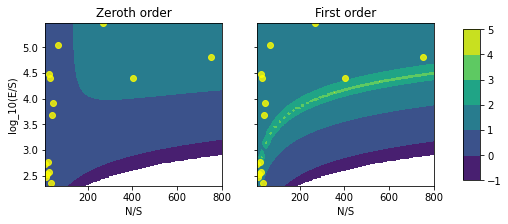

In [46]:
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))

# Set contour range to go from the smallest difference to the biggest, in either data set
# Need one consistent range so colorscheme is accurate
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)

# Plot the contours
im1 = axs[0].contourf(ns,np.log10(es),z_bm1,contour)
im2 = axs[1].contourf(ns,np.log10(es),z_bm2,contour)

# Overlay the data
for ax in axs:
    ax.scatter(data['N']/data['S'],np.log10(data['E']/data['S']),c='yellow',alpha=0.8)

# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels and titles
axs[0].set_ylabel('log_10(E/S)')
for ax in axs:
    ax.set_xlabel('N/S')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

fig.savefig('figures/logcontours_data_ns40es150.pdf')

### ns = 20, es = 150
Do I need that high level of N/S to get this right? I do for es...

In [47]:
# Define ns and es along with the number in each direction
num_ns = 20
num_es = 150
ns = np.linspace(10,800,num=num_ns)
es = np.logspace(np.log10(200),np.log10(300000),num=num_es)

# Numerical
biomass_num = np.zeros([num_es,num_ns]) 
# First order
biomass_1 = np.zeros([num_es,num_ns]) 
# Second order
biomass_2 = np.zeros([num_es,num_ns]) 

In [48]:
s0 = 50

# This is slow but should be ok just for a plot
for i,e in enumerate(es):
    for j,n in enumerate(ns):
        # Only do it if e>n, otherwise it's pretty broken.
        if e>n:
            s = pd.Series([s0,n*s0,e*s0],index=['S','N','E'])
            print(n,e) # Print this in case we have an error that we need to follow up on.
#            print(bm.mete_lambdas(s))
            biomass_num[i,j] = bm.biomass(s)
            biomass_1[i,j] = bm.biomass_approx(s,order=0)
            biomass_2[i,j] = bm.biomass_approx(s,order=1)

10.0 200.00000000000003
51.578947368421055 200.00000000000003
93.15789473684211 200.00000000000003
134.73684210526318 200.00000000000003
176.31578947368422 200.00000000000003
10.0 210.06129783328282
51.578947368421055 210.06129783328282
93.15789473684211 210.06129783328282
134.73684210526318 210.06129783328282
176.31578947368422 210.06129783328282
10.0 220.6287442370155
51.578947368421055 220.6287442370155
93.15789473684211 220.6287442370155
134.73684210526318 220.6287442370155
176.31578947368422 220.6287442370155
217.89473684210526 220.6287442370155
10.0 231.7278017687744
51.578947368421055 231.7278017687744
93.15789473684211 231.7278017687744
134.73684210526318 231.7278017687744
176.31578947368422 231.7278017687744
217.89473684210526 231.7278017687744
10.0 243.38521391801194
51.578947368421055 243.38521391801194
93.15789473684211 243.38521391801194
134.73684210526318 243.38521391801194
176.31578947368422 243.38521391801194
217.89473684210526 243.38521391801194
10.0 255.62906954524374

592.1052631578948 649.5538554830604
633.6842105263158 649.5538554830604
10.0 682.2306294769213
51.578947368421055 682.2306294769213
93.15789473684211 682.2306294769213
134.73684210526318 682.2306294769213
176.31578947368422 682.2306294769213
217.89473684210526 682.2306294769213
259.47368421052636 682.2306294769213
301.0526315789474 682.2306294769213
342.63157894736844 682.2306294769213
384.2105263157895 682.2306294769213
425.7894736842105 682.2306294769213
467.3684210526316 682.2306294769213
508.94736842105266 682.2306294769213
550.5263157894738 682.2306294769213
592.1052631578948 682.2306294769213
633.6842105263158 682.2306294769213
675.2631578947369 682.2306294769213
10.0 716.5512572476978
51.578947368421055 716.5512572476978
93.15789473684211 716.5512572476978
134.73684210526318 716.5512572476978
176.31578947368422 716.5512572476978
217.89473684210526 716.5512572476978
259.47368421052636 716.5512572476978
301.0526315789474 716.5512572476978
342.63157894736844 716.5512572476978
384.2

758.421052631579 1170.5979238696568
800.0 1170.5979238696568
10.0 1229.4865956450312
51.578947368421055 1229.4865956450312
93.15789473684211 1229.4865956450312
134.73684210526318 1229.4865956450312
176.31578947368422 1229.4865956450312
217.89473684210526 1229.4865956450312
259.47368421052636 1229.4865956450312
301.0526315789474 1229.4865956450312
342.63157894736844 1229.4865956450312
384.2105263157895 1229.4865956450312
425.7894736842105 1229.4865956450312
467.3684210526316 1229.4865956450312
508.94736842105266 1229.4865956450312
550.5263157894738 1229.4865956450312
592.1052631578948 1229.4865956450312
633.6842105263158 1229.4865956450312
675.2631578947369 1229.4865956450312
716.8421052631579 1229.4865956450312
758.421052631579 1229.4865956450312
800.0 1229.4865956450312
10.0 1291.3377497490976
51.578947368421055 1291.3377497490976
93.15789473684211 1291.3377497490976
134.73684210526318 1291.3377497490976
176.31578947368422 1291.3377497490976
217.89473684210526 1291.3377497490976
259.4

342.63157894736844 2109.6010558645416
384.2105263157895 2109.6010558645416
425.7894736842105 2109.6010558645416
467.3684210526316 2109.6010558645416
508.94736842105266 2109.6010558645416
550.5263157894738 2109.6010558645416
592.1052631578948 2109.6010558645416
633.6842105263158 2109.6010558645416
675.2631578947369 2109.6010558645416
716.8421052631579 2109.6010558645416
758.421052631579 2109.6010558645416
800.0 2109.6010558645416
10.0 2215.727678526847
51.578947368421055 2215.727678526847
93.15789473684211 2215.727678526847
134.73684210526318 2215.727678526847
176.31578947368422 2215.727678526847
217.89473684210526 2215.727678526847
259.47368421052636 2215.727678526847
301.0526315789474 2215.727678526847
342.63157894736844 2215.727678526847
384.2105263157895 2215.727678526847
425.7894736842105 2215.727678526847
467.3684210526316 2215.727678526847
508.94736842105266 2215.727678526847
550.5263157894738 2215.727678526847
592.1052631578948 2215.727678526847
633.6842105263158 2215.7276785268

10.0 3801.831973350007
51.578947368421055 3801.831973350007
93.15789473684211 3801.831973350007
134.73684210526318 3801.831973350007
176.31578947368422 3801.831973350007
217.89473684210526 3801.831973350007
259.47368421052636 3801.831973350007
301.0526315789474 3801.831973350007
342.63157894736844 3801.831973350007
384.2105263157895 3801.831973350007
425.7894736842105 3801.831973350007
467.3684210526316 3801.831973350007
508.94736842105266 3801.831973350007
550.5263157894738 3801.831973350007
592.1052631578948 3801.831973350007
633.6842105263158 3801.831973350007
675.2631578947369 3801.831973350007
716.8421052631579 3801.831973350007
758.421052631579 3801.831973350007
800.0 3801.831973350007
10.0 3993.0887923298615
51.578947368421055 3993.0887923298615
93.15789473684211 3993.0887923298615
134.73684210526318 3993.0887923298615
176.31578947368422 3993.0887923298615
217.89473684210526 3993.0887923298615
259.47368421052636 3993.0887923298615
301.0526315789474 3993.0887923298615
342.6315789

675.2631578947369 6523.331587027997
716.8421052631579 6523.331587027997
758.421052631579 6523.331587027997
800.0 6523.331587027997
10.0 6851.497496839746
51.578947368421055 6851.497496839746
93.15789473684211 6851.497496839746
134.73684210526318 6851.497496839746
176.31578947368422 6851.497496839746
217.89473684210526 6851.497496839746
259.47368421052636 6851.497496839746
301.0526315789474 6851.497496839746
342.63157894736844 6851.497496839746
384.2105263157895 6851.497496839746
425.7894736842105 6851.497496839746
467.3684210526316 6851.497496839746
508.94736842105266 6851.497496839746
550.5263157894738 6851.497496839746
592.1052631578948 6851.497496839746
633.6842105263158 6851.497496839746
675.2631578947369 6851.497496839746
716.8421052631579 6851.497496839746
758.421052631579 6851.497496839746
800.0 6851.497496839746
10.0 7196.17228143822
51.578947368421055 7196.17228143822
93.15789473684211 7196.17228143822
134.73684210526318 7196.17228143822
176.31578947368422 7196.17228143822
217

508.94736842105266 11756.066641786661
550.5263157894738 11756.066641786661
592.1052631578948 11756.066641786661
633.6842105263158 11756.066641786661
675.2631578947369 11756.066641786661
716.8421052631579 11756.066641786661
758.421052631579 11756.066641786661
800.0 11756.066641786661
10.0 12347.473080941341
51.578947368421055 12347.473080941341
93.15789473684211 12347.473080941341
134.73684210526318 12347.473080941341
176.31578947368422 12347.473080941341
217.89473684210526 12347.473080941341
259.47368421052636 12347.473080941341
301.0526315789474 12347.473080941341
342.63157894736844 12347.473080941341
384.2105263157895 12347.473080941341
425.7894736842105 12347.473080941341
467.3684210526316 12347.473080941341
508.94736842105266 12347.473080941341
550.5263157894738 12347.473080941341
592.1052631578948 12347.473080941341
633.6842105263158 12347.473080941341
675.2631578947369 12347.473080941341
716.8421052631579 12347.473080941341
758.421052631579 12347.473080941341
800.0 12347.47308094

93.15789473684211 21186.275914742306
134.73684210526318 21186.275914742306
176.31578947368422 21186.275914742306
217.89473684210526 21186.275914742306
259.47368421052636 21186.275914742306
301.0526315789474 21186.275914742306
342.63157894736844 21186.275914742306
384.2105263157895 21186.275914742306
425.7894736842105 21186.275914742306
467.3684210526316 21186.275914742306
508.94736842105266 21186.275914742306
550.5263157894738 21186.275914742306
592.1052631578948 21186.275914742306
633.6842105263158 21186.275914742306
675.2631578947369 21186.275914742306
716.8421052631579 21186.275914742306
758.421052631579 21186.275914742306
800.0 21186.275914742306
10.0 22252.083074523947
51.578947368421055 22252.083074523947
93.15789473684211 22252.083074523947
134.73684210526318 22252.083074523947
176.31578947368422 22252.083074523947
217.89473684210526 22252.083074523947
259.47368421052636 22252.083074523947
301.0526315789474 22252.083074523947
342.63157894736844 22252.083074523947
384.21052631578

550.5263157894738 36352.23856680569
592.1052631578948 36352.23856680569
633.6842105263158 36352.23856680569
675.2631578947369 36352.23856680569
716.8421052631579 36352.23856680569
758.421052631579 36352.23856680569
800.0 36352.23856680569
10.0 38180.99206244159
51.578947368421055 38180.99206244159
93.15789473684211 38180.99206244159
134.73684210526318 38180.99206244159
176.31578947368422 38180.99206244159
217.89473684210526 38180.99206244159
259.47368421052636 38180.99206244159
301.0526315789474 38180.99206244159
342.63157894736844 38180.99206244159
384.2105263157895 38180.99206244159
425.7894736842105 38180.99206244159
467.3684210526316 38180.99206244159
508.94736842105266 38180.99206244159
550.5263157894738 38180.99206244159
592.1052631578948 38180.99206244159
633.6842105263158 38180.99206244159
675.2631578947369 38180.99206244159
716.8421052631579 38180.99206244159
758.421052631579 38180.99206244159
800.0 38180.99206244159
10.0 40101.74372599374
51.578947368421055 40101.74372599374


425.7894736842105 65512.4353971708
467.3684210526316 65512.4353971708
508.94736842105266 65512.4353971708
550.5263157894738 65512.4353971708
592.1052631578948 65512.4353971708
633.6842105263158 65512.4353971708
675.2631578947369 65512.4353971708
716.8421052631579 65512.4353971708
758.421052631579 65512.4353971708
800.0 65512.4353971708
10.0 68808.13601874396
51.578947368421055 68808.13601874396
93.15789473684211 68808.13601874396
134.73684210526318 68808.13601874396
176.31578947368422 68808.13601874396
217.89473684210526 68808.13601874396
259.47368421052636 68808.13601874396
301.0526315789474 68808.13601874396
342.63157894736844 68808.13601874396
384.2105263157895 68808.13601874396
425.7894736842105 68808.13601874396
467.3684210526316 68808.13601874396
508.94736842105266 68808.13601874396
550.5263157894738 68808.13601874396
592.1052631578948 68808.13601874396
633.6842105263158 68808.13601874396
675.2631578947369 68808.13601874396
716.8421052631579 68808.13601874396
758.421052631579 688

217.89473684210526 118063.68358254338
259.47368421052636 118063.68358254338
301.0526315789474 118063.68358254338
342.63157894736844 118063.68358254338
384.2105263157895 118063.68358254338
425.7894736842105 118063.68358254338
467.3684210526316 118063.68358254338
508.94736842105266 118063.68358254338
550.5263157894738 118063.68358254338
592.1052631578948 118063.68358254338
633.6842105263158 118063.68358254338
675.2631578947369 118063.68358254338
716.8421052631579 118063.68358254338
758.421052631579 118063.68358254338
800.0 118063.68358254338
10.0 124003.05300163553
51.578947368421055 124003.05300163553
93.15789473684211 124003.05300163553
134.73684210526318 124003.05300163553
176.31578947368422 124003.05300163553
217.89473684210526 124003.05300163553
259.47368421052636 124003.05300163553
301.0526315789474 124003.05300163553
342.63157894736844 124003.05300163553
384.2105263157895 124003.05300163553
425.7894736842105 124003.05300163553
467.3684210526316 124003.05300163553
508.9473684210526

633.6842105263158 202578.27326236255
675.2631578947369 202578.27326236255
716.8421052631579 202578.27326236255
758.421052631579 202578.27326236255
800.0 202578.27326236255
10.0 212769.27497158598
51.578947368421055 212769.27497158598
93.15789473684211 212769.27497158598
134.73684210526318 212769.27497158598
176.31578947368422 212769.27497158598
217.89473684210526 212769.27497158598
259.47368421052636 212769.27497158598
301.0526315789474 212769.27497158598
342.63157894736844 212769.27497158598
384.2105263157895 212769.27497158598
425.7894736842105 212769.27497158598
467.3684210526316 212769.27497158598
508.94736842105266 212769.27497158598
550.5263157894738 212769.27497158598
592.1052631578948 212769.27497158598
633.6842105263158 212769.27497158598
675.2631578947369 212769.27497158598
716.8421052631579 212769.27497158598
758.421052631579 212769.27497158598
800.0 212769.27497158598
10.0 223472.95019788985
51.578947368421055 223472.95019788985
93.15789473684211 223472.95019788985
134.7368

In [49]:

# Get percent differences
biomass_1_percent = (biomass_1-biomass_num)/biomass_num
biomass_2_percent = (biomass_2-biomass_num)/biomass_num
# ignore the nans as those will be for the values where we didn't calculate the biomass

# Get max deviation in both cases to fix colorplot
max_dev_1 = np.nanmax(np.abs(biomass_1_percent))
max_dev_2 = np.nanmax(np.abs(biomass_2_percent))

# Get percent values to plot
z_bm1 = -np.log10(np.abs(biomass_1_percent))
z_bm2 = -np.log10(np.abs(biomass_2_percent))

/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


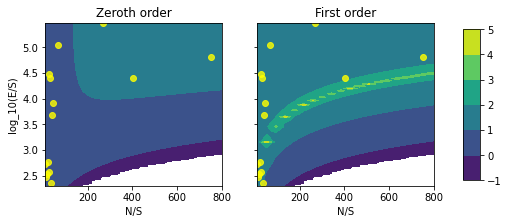

In [50]:
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))

# Set contour range to go from the smallest difference to the biggest, in either data set
# Need one consistent range so colorscheme is accurate
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)

# Plot the contours
im1 = axs[0].contourf(ns,np.log10(es),z_bm1,contour)
im2 = axs[1].contourf(ns,np.log10(es),z_bm2,contour)

# Overlay the data
for ax in axs:
    ax.scatter(data['N']/data['S'],np.log10(data['E']/data['S']),c='yellow',alpha=0.8)

# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels and titles
axs[0].set_ylabel('log_10(E/S)')
for ax in axs:
    ax.set_xlabel('N/S')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

fig.savefig('figures/logcontours_data_ns20es150.pdf')

### ns = 200, es = 200
There really isn't a reason to pick these so low. Just make them high for the actual figure.

In [60]:
# Define ns and es along with the number in each direction
num_ns = 200
num_es = 200
ns = np.linspace(10,800,num=num_ns)
es = np.logspace(np.log10(200),np.log10(300000),num=num_es)

# Numerical
biomass_num = np.zeros([num_es,num_ns]) 
# First order
biomass_1 = np.zeros([num_es,num_ns]) 
# Second order
biomass_2 = np.zeros([num_es,num_ns]) 

In [61]:
s0 = 50

# This is slow but should be ok just for a plot
for i,e in enumerate(es):
    for j,n in enumerate(ns):
        # Only do it if e>n, otherwise it's pretty broken.
        if e>n:
            s = pd.Series([s0,n*s0,e*s0],index=['S','N','E'])
            print(n,e) # Print this in case we have an error that we need to follow up on.
#            print(bm.mete_lambdas(s))
            biomass_num[i,j] = bm.biomass(s)
            biomass_1[i,j] = bm.biomass_approx(s,order=0)
            biomass_2[i,j] = bm.biomass_approx(s,order=1)

10.0 200.00000000000003
13.969849246231156 200.00000000000003
17.939698492462313 200.00000000000003
21.90954773869347 200.00000000000003
25.879396984924625 200.00000000000003
29.849246231155778 200.00000000000003
33.81909547738694 200.00000000000003
37.78894472361809 200.00000000000003
41.75879396984925 200.00000000000003
45.7286432160804 200.00000000000003
49.698492462311556 200.00000000000003
53.66834170854271 200.00000000000003
57.63819095477387 200.00000000000003
61.608040201005025 200.00000000000003
65.57788944723617 200.00000000000003
69.54773869346734 200.00000000000003
73.5175879396985 200.00000000000003
77.48743718592965 200.00000000000003
81.4572864321608 200.00000000000003
85.42713567839196 200.00000000000003
89.39698492462311 200.00000000000003
93.36683417085428 200.00000000000003
97.33668341708542 200.00000000000003
101.30653266331659 200.00000000000003
105.27638190954774 200.00000000000003
109.2462311557789 200.00000000000003
113.21608040201005 200.00000000000003
117.1859

93.36683417085428 231.6706547075949
97.33668341708542 231.6706547075949
101.30653266331659 231.6706547075949
105.27638190954774 231.6706547075949
109.2462311557789 231.6706547075949
113.21608040201005 231.6706547075949
117.18592964824121 231.6706547075949
121.15577889447236 231.6706547075949
125.12562814070353 231.6706547075949
129.09547738693468 231.6706547075949
133.06532663316585 231.6706547075949
137.035175879397 231.6706547075949
141.00502512562815 231.6706547075949
144.9748743718593 231.6706547075949
148.94472361809045 231.6706547075949
152.9145728643216 231.6706547075949
156.88442211055278 231.6706547075949
160.85427135678393 231.6706547075949
164.82412060301507 231.6706547075949
168.79396984924622 231.6706547075949
172.7638190954774 231.6706547075949
176.73366834170855 231.6706547075949
180.7035175879397 231.6706547075949
184.67336683417085 231.6706547075949
188.64321608040203 231.6706547075949
192.61306532663318 231.6706547075949
196.58291457286433 231.6706547075949
200.552763

/Users/micbru/Documents/Research/2021EquationOfState/PythonCode/biomass.py:111: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  b = s['S']*integrate.quad(lambda loge: np.exp((power+1)*loge)*nRsum(np.exp(loge),l,s),0,np.log(s['E']))[0]


10.0 249.3397623241535
13.969849246231156 249.3397623241535
17.939698492462313 249.3397623241535
21.90954773869347 249.3397623241535
25.879396984924625 249.3397623241535
29.849246231155778 249.3397623241535
33.81909547738694 249.3397623241535
37.78894472361809 249.3397623241535
41.75879396984925 249.3397623241535
45.7286432160804 249.3397623241535
49.698492462311556 249.3397623241535
53.66834170854271 249.3397623241535
57.63819095477387 249.3397623241535
61.608040201005025 249.3397623241535
65.57788944723617 249.3397623241535
69.54773869346734 249.3397623241535
73.5175879396985 249.3397623241535
77.48743718592965 249.3397623241535
81.4572864321608 249.3397623241535
85.42713567839196 249.3397623241535
89.39698492462311 249.3397623241535
93.36683417085428 249.3397623241535
97.33668341708542 249.3397623241535
101.30653266331659 249.3397623241535
105.27638190954774 249.3397623241535
109.2462311557789 249.3397623241535
113.21608040201005 249.3397623241535
117.18592964824121 249.339762324153

160.85427135678393 278.4019763158438
164.82412060301507 278.4019763158438
168.79396984924622 278.4019763158438
172.7638190954774 278.4019763158438
176.73366834170855 278.4019763158438
180.7035175879397 278.4019763158438
184.67336683417085 278.4019763158438
188.64321608040203 278.4019763158438
192.61306532663318 278.4019763158438
196.58291457286433 278.4019763158438
200.55276381909547 278.4019763158438
204.52261306532662 278.4019763158438
208.4924623115578 278.4019763158438
212.46231155778895 278.4019763158438
216.4321608040201 278.4019763158438
220.40201005025125 278.4019763158438
224.37185929648243 278.4019763158438
228.34170854271358 278.4019763158438
232.31155778894473 278.4019763158438
236.28140703517587 278.4019763158438
240.25125628140705 278.4019763158438
244.2211055276382 278.4019763158438
248.19095477386935 278.4019763158438
252.1608040201005 278.4019763158438
256.1306532663317 278.4019763158438
260.1005025125628 278.4019763158438
264.070351758794 278.4019763158438
268.0402010

216.4321608040201 310.85158537932676
220.40201005025125 310.85158537932676
224.37185929648243 310.85158537932676
228.34170854271358 310.85158537932676
232.31155778894473 310.85158537932676
236.28140703517587 310.85158537932676
240.25125628140705 310.85158537932676
244.2211055276382 310.85158537932676
248.19095477386935 310.85158537932676
252.1608040201005 310.85158537932676
256.1306532663317 310.85158537932676
260.1005025125628 310.85158537932676
264.070351758794 310.85158537932676
268.04020100502515 310.85158537932676
272.0100502512563 310.85158537932676
275.97989949748745 310.85158537932676
279.9497487437186 310.85158537932676
283.91959798994975 310.85158537932676
287.8894472361809 310.85158537932676
291.85929648241205 310.85158537932676
295.8291457286432 310.85158537932676
299.7989949748744 310.85158537932676
303.76884422110555 310.85158537932676
307.7386934673367 310.85158537932676
10.0 322.48784062489926
13.969849246231156 322.48784062489926
17.939698492462313 322.48784062489926
2

164.82412060301507 347.08341302583545
168.79396984924622 347.08341302583545
172.7638190954774 347.08341302583545
176.73366834170855 347.08341302583545
180.7035175879397 347.08341302583545
184.67336683417085 347.08341302583545
188.64321608040203 347.08341302583545
192.61306532663318 347.08341302583545
196.58291457286433 347.08341302583545
200.55276381909547 347.08341302583545
204.52261306532662 347.08341302583545
208.4924623115578 347.08341302583545
212.46231155778895 347.08341302583545
216.4321608040201 347.08341302583545
220.40201005025125 347.08341302583545
224.37185929648243 347.08341302583545
228.34170854271358 347.08341302583545
232.31155778894473 347.08341302583545
236.28140703517587 347.08341302583545
240.25125628140705 347.08341302583545
244.2211055276382 347.08341302583545
248.19095477386935 347.08341302583545
252.1608040201005 347.08341302583545
256.1306532663317 347.08341302583545
260.1005025125628 347.08341302583545
264.070351758794 347.08341302583545
268.04020100502515 347

351.4070351758794 373.55484586404424
355.37688442211055 373.55484586404424
359.3467336683417 373.55484586404424
363.31658291457285 373.55484586404424
367.28643216080405 373.55484586404424
371.2562814070352 373.55484586404424
10.0 387.5383020828382
13.969849246231156 387.5383020828382
17.939698492462313 387.5383020828382
21.90954773869347 387.5383020828382
25.879396984924625 387.5383020828382
29.849246231155778 387.5383020828382
33.81909547738694 387.5383020828382
37.78894472361809 387.5383020828382
41.75879396984925 387.5383020828382
45.7286432160804 387.5383020828382
49.698492462311556 387.5383020828382
53.66834170854271 387.5383020828382
57.63819095477387 387.5383020828382
61.608040201005025 387.5383020828382
65.57788944723617 387.5383020828382
69.54773869346734 387.5383020828382
73.5175879396985 387.5383020828382
77.48743718592965 387.5383020828382
81.4572864321608 387.5383020828382
85.42713567839196 387.5383020828382
89.39698492462311 387.5383020828382
93.36683417085428 387.5383020

101.30653266331659 417.09515715230197
105.27638190954774 417.09515715230197
109.2462311557789 417.09515715230197
113.21608040201005 417.09515715230197
117.18592964824121 417.09515715230197
121.15577889447236 417.09515715230197
125.12562814070353 417.09515715230197
129.09547738693468 417.09515715230197
133.06532663316585 417.09515715230197
137.035175879397 417.09515715230197
141.00502512562815 417.09515715230197
144.9748743718593 417.09515715230197
148.94472361809045 417.09515715230197
152.9145728643216 417.09515715230197
156.88442211055278 417.09515715230197
160.85427135678393 417.09515715230197
164.82412060301507 417.09515715230197
168.79396984924622 417.09515715230197
172.7638190954774 417.09515715230197
176.73366834170855 417.09515715230197
180.7035175879397 417.09515715230197
184.67336683417085 417.09515715230197
188.64321608040203 417.09515715230197
192.61306532663318 417.09515715230197
196.58291457286433 417.09515715230197
200.55276381909547 417.09515715230197
204.52261306532662 

148.94472361809045 448.906260839004
152.9145728643216 448.906260839004
156.88442211055278 448.906260839004
160.85427135678393 448.906260839004
164.82412060301507 448.906260839004
168.79396984924622 448.906260839004
172.7638190954774 448.906260839004
176.73366834170855 448.906260839004
180.7035175879397 448.906260839004
184.67336683417085 448.906260839004
188.64321608040203 448.906260839004
192.61306532663318 448.906260839004
196.58291457286433 448.906260839004
200.55276381909547 448.906260839004
204.52261306532662 448.906260839004
208.4924623115578 448.906260839004
212.46231155778895 448.906260839004
216.4321608040201 448.906260839004
220.40201005025125 448.906260839004
224.37185929648243 448.906260839004
228.34170854271358 448.906260839004
232.31155778894473 448.906260839004
236.28140703517587 448.906260839004
240.25125628140705 448.906260839004
244.2211055276382 448.906260839004
248.19095477386935 448.906260839004
252.1608040201005 448.906260839004
256.1306532663317 448.906260839004


156.88442211055278 483.1435406642043
160.85427135678393 483.1435406642043
164.82412060301507 483.1435406642043
168.79396984924622 483.1435406642043
172.7638190954774 483.1435406642043
176.73366834170855 483.1435406642043
180.7035175879397 483.1435406642043
184.67336683417085 483.1435406642043
188.64321608040203 483.1435406642043
192.61306532663318 483.1435406642043
196.58291457286433 483.1435406642043
200.55276381909547 483.1435406642043
204.52261306532662 483.1435406642043
208.4924623115578 483.1435406642043
212.46231155778895 483.1435406642043
216.4321608040201 483.1435406642043
220.40201005025125 483.1435406642043
224.37185929648243 483.1435406642043
228.34170854271358 483.1435406642043
232.31155778894473 483.1435406642043
236.28140703517587 483.1435406642043
240.25125628140705 483.1435406642043
244.2211055276382 483.1435406642043
248.19095477386935 483.1435406642043
252.1608040201005 483.1435406642043
256.1306532663317 483.1435406642043
260.1005025125628 483.1435406642043
264.07035

85.42713567839196 519.992036754552
89.39698492462311 519.992036754552
93.36683417085428 519.992036754552
97.33668341708542 519.992036754552
101.30653266331659 519.992036754552
105.27638190954774 519.992036754552
109.2462311557789 519.992036754552
113.21608040201005 519.992036754552
117.18592964824121 519.992036754552
121.15577889447236 519.992036754552
125.12562814070353 519.992036754552
129.09547738693468 519.992036754552
133.06532663316585 519.992036754552
137.035175879397 519.992036754552
141.00502512562815 519.992036754552
144.9748743718593 519.992036754552
148.94472361809045 519.992036754552
152.9145728643216 519.992036754552
156.88442211055278 519.992036754552
160.85427135678393 519.992036754552
164.82412060301507 519.992036754552
168.79396984924622 519.992036754552
172.7638190954774 519.992036754552
176.73366834170855 519.992036754552
180.7035175879397 519.992036754552
184.67336683417085 519.992036754552
188.64321608040203 519.992036754552
192.61306532663318 519.992036754552
196

498.29145728643215 539.457145989743
502.26130653266335 539.457145989743
506.2311557788945 539.457145989743
510.20100502512565 539.457145989743
514.1708542713568 539.457145989743
518.140703517588 539.457145989743
522.1105527638191 539.457145989743
526.0804020100503 539.457145989743
530.0502512562814 539.457145989743
534.0201005025126 539.457145989743
537.9899497487437 539.457145989743
10.0 559.6509019171085
13.969849246231156 559.6509019171085
17.939698492462313 559.6509019171085
21.90954773869347 559.6509019171085
25.879396984924625 559.6509019171085
29.849246231155778 559.6509019171085
33.81909547738694 559.6509019171085
37.78894472361809 559.6509019171085
41.75879396984925 559.6509019171085
45.7286432160804 559.6509019171085
49.698492462311556 559.6509019171085
53.66834170854271 559.6509019171085
57.63819095477387 559.6509019171085
61.608040201005025 559.6509019171085
65.57788944723617 559.6509019171085
69.54773869346734 559.6509019171085
73.5175879396985 559.6509019171085
77.4874371

319.64824120603015 580.6005803148408
323.6180904522613 580.6005803148408
327.58793969849245 580.6005803148408
331.5577889447236 580.6005803148408
335.5276381909548 580.6005803148408
339.49748743718595 580.6005803148408
343.4673366834171 580.6005803148408
347.43718592964825 580.6005803148408
351.4070351758794 580.6005803148408
355.37688442211055 580.6005803148408
359.3467336683417 580.6005803148408
363.31658291457285 580.6005803148408
367.28643216080405 580.6005803148408
371.2562814070352 580.6005803148408
375.22613065326635 580.6005803148408
379.1959798994975 580.6005803148408
383.16582914572865 580.6005803148408
387.1356783919598 580.6005803148408
391.10552763819095 580.6005803148408
395.0753768844221 580.6005803148408
399.04522613065325 580.6005803148408
403.01507537688445 580.6005803148408
406.9849246231156 580.6005803148408
410.95477386934675 580.6005803148408
414.9246231155779 580.6005803148408
418.89447236180905 580.6005803148408
422.8643216080402 580.6005803148408
426.8341708542

65.57788944723617 624.8819509906718
69.54773869346734 624.8819509906718
73.5175879396985 624.8819509906718
77.48743718592965 624.8819509906718
81.4572864321608 624.8819509906718
85.42713567839196 624.8819509906718
89.39698492462311 624.8819509906718
93.36683417085428 624.8819509906718
97.33668341708542 624.8819509906718
101.30653266331659 624.8819509906718
105.27638190954774 624.8819509906718
109.2462311557789 624.8819509906718
113.21608040201005 624.8819509906718
117.18592964824121 624.8819509906718
121.15577889447236 624.8819509906718
125.12562814070353 624.8819509906718
129.09547738693468 624.8819509906718
133.06532663316585 624.8819509906718
137.035175879397 624.8819509906718
141.00502512562815 624.8819509906718
144.9748743718593 624.8819509906718
148.94472361809045 624.8819509906718
152.9145728643216 624.8819509906718
156.88442211055278 624.8819509906718
160.85427135678393 624.8819509906718
164.82412060301507 624.8819509906718
168.79396984924622 624.8819509906718
172.7638190954774

347.43718592964825 648.2734542741624
351.4070351758794 648.2734542741624
355.37688442211055 648.2734542741624
359.3467336683417 648.2734542741624
363.31658291457285 648.2734542741624
367.28643216080405 648.2734542741624
371.2562814070352 648.2734542741624
375.22613065326635 648.2734542741624
379.1959798994975 648.2734542741624
383.16582914572865 648.2734542741624
387.1356783919598 648.2734542741624
391.10552763819095 648.2734542741624
395.0753768844221 648.2734542741624
399.04522613065325 648.2734542741624
403.01507537688445 648.2734542741624
406.9849246231156 648.2734542741624
410.95477386934675 648.2734542741624
414.9246231155779 648.2734542741624
418.89447236180905 648.2734542741624
422.8643216080402 648.2734542741624
426.83417085427135 648.2734542741624
430.8040201005025 648.2734542741624
434.7738693467337 648.2734542741624
438.74371859296485 648.2734542741624
442.713567839196 648.2734542741624
446.68341708542715 648.2734542741624
450.6532663316583 648.2734542741624
454.62311557788

609.4472361809045 672.5405828257435
613.4170854271357 672.5405828257435
617.3869346733668 672.5405828257435
621.356783919598 672.5405828257435
625.3266331658292 672.5405828257435
629.2964824120603 672.5405828257435
633.2663316582915 672.5405828257435
637.2361809045226 672.5405828257435
641.2060301507538 672.5405828257435
645.1758793969849 672.5405828257435
649.1457286432161 672.5405828257435
653.1155778894472 672.5405828257435
657.0854271356784 672.5405828257435
661.0552763819096 672.5405828257435
665.0251256281407 672.5405828257435
668.9949748743719 672.5405828257435
10.0 697.7161143425498
13.969849246231156 697.7161143425498
17.939698492462313 697.7161143425498
21.90954773869347 697.7161143425498
25.879396984924625 697.7161143425498
29.849246231155778 697.7161143425498
33.81909547738694 697.7161143425498
37.78894472361809 697.7161143425498
41.75879396984925 697.7161143425498
45.7286432160804 697.7161143425498
49.698492462311556 697.7161143425498
53.66834170854271 697.7161143425498
57

164.82412060301507 723.83405350484
168.79396984924622 723.83405350484
172.7638190954774 723.83405350484
176.73366834170855 723.83405350484
180.7035175879397 723.83405350484
184.67336683417085 723.83405350484
188.64321608040203 723.83405350484
192.61306532663318 723.83405350484
196.58291457286433 723.83405350484
200.55276381909547 723.83405350484
204.52261306532662 723.83405350484
208.4924623115578 723.83405350484
212.46231155778895 723.83405350484
216.4321608040201 723.83405350484
220.40201005025125 723.83405350484
224.37185929648243 723.83405350484
228.34170854271358 723.83405350484
232.31155778894473 723.83405350484
236.28140703517587 723.83405350484
240.25125628140705 723.83405350484
244.2211055276382 723.83405350484
248.19095477386935 723.83405350484
252.1608040201005 723.83405350484
256.1306532663317 723.83405350484
260.1005025125628 723.83405350484
264.070351758794 723.83405350484
268.04020100502515 723.83405350484
272.0100502512563 723.83405350484
275.97989949748745 723.83405350

379.1959798994975 750.9296779062456
383.16582914572865 750.9296779062456
387.1356783919598 750.9296779062456
391.10552763819095 750.9296779062456
395.0753768844221 750.9296779062456
399.04522613065325 750.9296779062456
403.01507537688445 750.9296779062456
406.9849246231156 750.9296779062456
410.95477386934675 750.9296779062456
414.9246231155779 750.9296779062456
418.89447236180905 750.9296779062456
422.8643216080402 750.9296779062456
426.83417085427135 750.9296779062456
430.8040201005025 750.9296779062456
434.7738693467337 750.9296779062456
438.74371859296485 750.9296779062456
442.713567839196 750.9296779062456
446.68341708542715 750.9296779062456
450.6532663316583 750.9296779062456
454.62311557788945 750.9296779062456
458.5929648241206 750.9296779062456
462.56281407035175 750.9296779062456
466.5326633165829 750.9296779062456
470.5025125628141 750.9296779062456
474.47236180904525 750.9296779062456
478.4422110552764 750.9296779062456
482.41206030150755 750.9296779062456
486.381909547738

537.9899497487437 779.0395857033371
541.9597989949749 779.0395857033371
545.929648241206 779.0395857033371
549.8994974874372 779.0395857033371
553.8693467336684 779.0395857033371
557.8391959798995 779.0395857033371
561.8090452261307 779.0395857033371
565.7788944723618 779.0395857033371
569.748743718593 779.0395857033371
573.7185929648241 779.0395857033371
577.6884422110553 779.0395857033371
581.6582914572864 779.0395857033371
585.6281407035176 779.0395857033371
589.5979899497488 779.0395857033371
593.5678391959799 779.0395857033371
597.5376884422111 779.0395857033371
601.5075376884422 779.0395857033371
605.4773869346734 779.0395857033371
609.4472361809045 779.0395857033371
613.4170854271357 779.0395857033371
617.3869346733668 779.0395857033371
621.356783919598 779.0395857033371
625.3266331658292 779.0395857033371
629.2964824120603 779.0395857033371
633.2663316582915 779.0395857033371
637.2361809045226 779.0395857033371
641.2060301507538 779.0395857033371
645.1758793969849 779.039585703

668.9949748743719 808.2017450488881
672.964824120603 808.2017450488881
676.9346733668342 808.2017450488881
680.9045226130653 808.2017450488881
684.8743718592965 808.2017450488881
688.8442211055277 808.2017450488881
692.8140703517588 808.2017450488881
696.78391959799 808.2017450488881
700.7537688442211 808.2017450488881
704.7236180904523 808.2017450488881
708.6934673366834 808.2017450488881
712.6633165829146 808.2017450488881
716.6331658291457 808.2017450488881
720.6030150753769 808.2017450488881
724.5728643216081 808.2017450488881
728.5427135678392 808.2017450488881
732.5125628140704 808.2017450488881
736.4824120603015 808.2017450488881
740.4522613065327 808.2017450488881
744.4221105527638 808.2017450488881
748.391959798995 808.2017450488881
752.3618090452261 808.2017450488881
756.3316582914573 808.2017450488881
760.3015075376885 808.2017450488881
764.2713567839196 808.2017450488881
768.2412060301508 808.2017450488881
772.2110552763819 808.2017450488881
776.1809045226131 808.2017450488

776.1809045226131 838.4555453755927
780.1507537688442 838.4555453755927
784.1206030150754 838.4555453755927
788.0904522613065 838.4555453755927
792.0603015075377 838.4555453755927
796.0301507537689 838.4555453755927
800.0 838.4555453755927
10.0 869.8418505995162
13.969849246231156 869.8418505995162
17.939698492462313 869.8418505995162
21.90954773869347 869.8418505995162
25.879396984924625 869.8418505995162
29.849246231155778 869.8418505995162
33.81909547738694 869.8418505995162
37.78894472361809 869.8418505995162
41.75879396984925 869.8418505995162
45.7286432160804 869.8418505995162
49.698492462311556 869.8418505995162
53.66834170854271 869.8418505995162
57.63819095477387 869.8418505995162
61.608040201005025 869.8418505995162
65.57788944723617 869.8418505995162
69.54773869346734 869.8418505995162
73.5175879396985 869.8418505995162
77.48743718592965 869.8418505995162
81.4572864321608 869.8418505995162
85.42713567839196 869.8418505995162
89.39698492462311 869.8418505995162
93.36683417085

105.27638190954774 902.403054315127
109.2462311557789 902.403054315127
113.21608040201005 902.403054315127
117.18592964824121 902.403054315127
121.15577889447236 902.403054315127
125.12562814070353 902.403054315127
129.09547738693468 902.403054315127
133.06532663316585 902.403054315127
137.035175879397 902.403054315127
141.00502512562815 902.403054315127
144.9748743718593 902.403054315127
148.94472361809045 902.403054315127
152.9145728643216 902.403054315127
156.88442211055278 902.403054315127
160.85427135678393 902.403054315127
164.82412060301507 902.403054315127
168.79396984924622 902.403054315127
172.7638190954774 902.403054315127
176.73366834170855 902.403054315127
180.7035175879397 902.403054315127
184.67336683417085 902.403054315127
188.64321608040203 902.403054315127
192.61306532663318 902.403054315127
196.58291457286433 902.403054315127
200.55276381909547 902.403054315127
204.52261306532662 902.403054315127
208.4924623115578 902.403054315127
212.46231155778895 902.403054315127


236.28140703517587 936.183137056482
240.25125628140705 936.183137056482
244.2211055276382 936.183137056482
248.19095477386935 936.183137056482
252.1608040201005 936.183137056482
256.1306532663317 936.183137056482
260.1005025125628 936.183137056482
264.070351758794 936.183137056482
268.04020100502515 936.183137056482
272.0100502512563 936.183137056482
275.97989949748745 936.183137056482
279.9497487437186 936.183137056482
283.91959798994975 936.183137056482
287.8894472361809 936.183137056482
291.85929648241205 936.183137056482
295.8291457286432 936.183137056482
299.7989949748744 936.183137056482
303.76884422110555 936.183137056482
307.7386934673367 936.183137056482
311.70854271356785 936.183137056482
315.678391959799 936.183137056482
319.64824120603015 936.183137056482
323.6180904522613 936.183137056482
327.58793969849245 936.183137056482
331.5577889447236 936.183137056482
335.5276381909548 936.183137056482
339.49748743718595 936.183137056482
343.4673366834171 936.183137056482
347.437185

359.3467336683417 971.2277257018853
363.31658291457285 971.2277257018853
367.28643216080405 971.2277257018853
371.2562814070352 971.2277257018853
375.22613065326635 971.2277257018853
379.1959798994975 971.2277257018853
383.16582914572865 971.2277257018853
387.1356783919598 971.2277257018853
391.10552763819095 971.2277257018853
395.0753768844221 971.2277257018853
399.04522613065325 971.2277257018853
403.01507537688445 971.2277257018853
406.9849246231156 971.2277257018853
410.95477386934675 971.2277257018853
414.9246231155779 971.2277257018853
418.89447236180905 971.2277257018853
422.8643216080402 971.2277257018853
426.83417085427135 971.2277257018853
430.8040201005025 971.2277257018853
434.7738693467337 971.2277257018853
438.74371859296485 971.2277257018853
442.713567839196 971.2277257018853
446.68341708542715 971.2277257018853
450.6532663316583 971.2277257018853
454.62311557788945 971.2277257018853
458.5929648241206 971.2277257018853
462.56281407035175 971.2277257018853
466.53266331658

458.5929648241206 1007.5841551022793
462.56281407035175 1007.5841551022793
466.5326633165829 1007.5841551022793
470.5025125628141 1007.5841551022793
474.47236180904525 1007.5841551022793
478.4422110552764 1007.5841551022793
482.41206030150755 1007.5841551022793
486.3819095477387 1007.5841551022793
490.35175879396985 1007.5841551022793
494.321608040201 1007.5841551022793
498.29145728643215 1007.5841551022793
502.26130653266335 1007.5841551022793
506.2311557788945 1007.5841551022793
510.20100502512565 1007.5841551022793
514.1708542713568 1007.5841551022793
518.140703517588 1007.5841551022793
522.1105527638191 1007.5841551022793
526.0804020100503 1007.5841551022793
530.0502512562814 1007.5841551022793
534.0201005025126 1007.5841551022793
537.9899497487437 1007.5841551022793
541.9597989949749 1007.5841551022793
545.929648241206 1007.5841551022793
549.8994974874372 1007.5841551022793
553.8693467336684 1007.5841551022793
557.8391959798995 1007.5841551022793
561.8090452261307 1007.58415510227

541.9597989949749 1045.3015320165937
545.929648241206 1045.3015320165937
549.8994974874372 1045.3015320165937
553.8693467336684 1045.3015320165937
557.8391959798995 1045.3015320165937
561.8090452261307 1045.3015320165937
565.7788944723618 1045.3015320165937
569.748743718593 1045.3015320165937
573.7185929648241 1045.3015320165937
577.6884422110553 1045.3015320165937
581.6582914572864 1045.3015320165937
585.6281407035176 1045.3015320165937
589.5979899497488 1045.3015320165937
593.5678391959799 1045.3015320165937
597.5376884422111 1045.3015320165937
601.5075376884422 1045.3015320165937
605.4773869346734 1045.3015320165937
609.4472361809045 1045.3015320165937
613.4170854271357 1045.3015320165937
617.3869346733668 1045.3015320165937
621.356783919598 1045.3015320165937
625.3266331658292 1045.3015320165937
629.2964824120603 1045.3015320165937
633.2663316582915 1045.3015320165937
637.2361809045226 1045.3015320165937
641.2060301507538 1045.3015320165937
645.1758793969849 1045.3015320165937
649.

645.1758793969849 1084.430801440426
649.1457286432161 1084.430801440426
653.1155778894472 1084.430801440426
657.0854271356784 1084.430801440426
661.0552763819096 1084.430801440426
665.0251256281407 1084.430801440426
668.9949748743719 1084.430801440426
672.964824120603 1084.430801440426
676.9346733668342 1084.430801440426
680.9045226130653 1084.430801440426
684.8743718592965 1084.430801440426
688.8442211055277 1084.430801440426
692.8140703517588 1084.430801440426
696.78391959799 1084.430801440426
700.7537688442211 1084.430801440426
704.7236180904523 1084.430801440426
708.6934673366834 1084.430801440426
712.6633165829146 1084.430801440426
716.6331658291457 1084.430801440426
720.6030150753769 1084.430801440426
724.5728643216081 1084.430801440426
728.5427135678392 1084.430801440426
732.5125628140704 1084.430801440426
736.4824120603015 1084.430801440426
740.4522613065327 1084.430801440426
744.4221105527638 1084.430801440426
748.391959798995 1084.430801440426
752.3618090452261 1084.430801440

732.5125628140704 1125.0248154176195
736.4824120603015 1125.0248154176195
740.4522613065327 1125.0248154176195
744.4221105527638 1125.0248154176195
748.391959798995 1125.0248154176195
752.3618090452261 1125.0248154176195
756.3316582914573 1125.0248154176195
760.3015075376885 1125.0248154176195
764.2713567839196 1125.0248154176195
768.2412060301508 1125.0248154176195
772.2110552763819 1125.0248154176195
776.1809045226131 1125.0248154176195
780.1507537688442 1125.0248154176195
784.1206030150754 1125.0248154176195
788.0904522613065 1125.0248154176195
792.0603015075377 1125.0248154176195
796.0301507537689 1125.0248154176195
800.0 1125.0248154176195
10.0 1167.1384044277181
13.969849246231156 1167.1384044277181
17.939698492462313 1167.1384044277181
21.90954773869347 1167.1384044277181
25.879396984924625 1167.1384044277181
29.849246231155778 1167.1384044277181
33.81909547738694 1167.1384044277181
37.78894472361809 1167.1384044277181
41.75879396984925 1167.1384044277181
45.7286432160804 1167.1

29.849246231155778 1210.8284514456811
33.81909547738694 1210.8284514456811
37.78894472361809 1210.8284514456811
41.75879396984925 1210.8284514456811
45.7286432160804 1210.8284514456811
49.698492462311556 1210.8284514456811
53.66834170854271 1210.8284514456811
57.63819095477387 1210.8284514456811
61.608040201005025 1210.8284514456811
65.57788944723617 1210.8284514456811
69.54773869346734 1210.8284514456811
73.5175879396985 1210.8284514456811
77.48743718592965 1210.8284514456811
81.4572864321608 1210.8284514456811
85.42713567839196 1210.8284514456811
89.39698492462311 1210.8284514456811
93.36683417085428 1210.8284514456811
97.33668341708542 1210.8284514456811
101.30653266331659 1210.8284514456811
105.27638190954774 1210.8284514456811
109.2462311557789 1210.8284514456811
113.21608040201005 1210.8284514456811
117.18592964824121 1210.8284514456811
121.15577889447236 1210.8284514456811
125.12562814070353 1210.8284514456811
129.09547738693468 1210.8284514456811
133.06532663316585 1210.8284514

113.21608040201005 1256.1539687739264
117.18592964824121 1256.1539687739264
121.15577889447236 1256.1539687739264
125.12562814070353 1256.1539687739264
129.09547738693468 1256.1539687739264
133.06532663316585 1256.1539687739264
137.035175879397 1256.1539687739264
141.00502512562815 1256.1539687739264
144.9748743718593 1256.1539687739264
148.94472361809045 1256.1539687739264
152.9145728643216 1256.1539687739264
156.88442211055278 1256.1539687739264
160.85427135678393 1256.1539687739264
164.82412060301507 1256.1539687739264
168.79396984924622 1256.1539687739264
172.7638190954774 1256.1539687739264
176.73366834170855 1256.1539687739264
180.7035175879397 1256.1539687739264
184.67336683417085 1256.1539687739264
188.64321608040203 1256.1539687739264
192.61306532663318 1256.1539687739264
196.58291457286433 1256.1539687739264
200.55276381909547 1256.1539687739264
204.52261306532662 1256.1539687739264
208.4924623115578 1256.1539687739264
212.46231155778895 1256.1539687739264
216.4321608040201 1

204.52261306532662 1303.176177750455
208.4924623115578 1303.176177750455
212.46231155778895 1303.176177750455
216.4321608040201 1303.176177750455
220.40201005025125 1303.176177750455
224.37185929648243 1303.176177750455
228.34170854271358 1303.176177750455
232.31155778894473 1303.176177750455
236.28140703517587 1303.176177750455
240.25125628140705 1303.176177750455
244.2211055276382 1303.176177750455
248.19095477386935 1303.176177750455
252.1608040201005 1303.176177750455
256.1306532663317 1303.176177750455
260.1005025125628 1303.176177750455
264.070351758794 1303.176177750455
268.04020100502515 1303.176177750455
272.0100502512563 1303.176177750455
275.97989949748745 1303.176177750455
279.9497487437186 1303.176177750455
283.91959798994975 1303.176177750455
287.8894472361809 1303.176177750455
291.85929648241205 1303.176177750455
295.8291457286432 1303.176177750455
299.7989949748744 1303.176177750455
303.76884422110555 1303.176177750455
307.7386934673367 1303.176177750455
311.70854271356

307.7386934673367 1351.9585914407353
311.70854271356785 1351.9585914407353
315.678391959799 1351.9585914407353
319.64824120603015 1351.9585914407353
323.6180904522613 1351.9585914407353
327.58793969849245 1351.9585914407353
331.5577889447236 1351.9585914407353
335.5276381909548 1351.9585914407353
339.49748743718595 1351.9585914407353
343.4673366834171 1351.9585914407353
347.43718592964825 1351.9585914407353
351.4070351758794 1351.9585914407353
355.37688442211055 1351.9585914407353
359.3467336683417 1351.9585914407353
363.31658291457285 1351.9585914407353
367.28643216080405 1351.9585914407353
371.2562814070352 1351.9585914407353
375.22613065326635 1351.9585914407353
379.1959798994975 1351.9585914407353
383.16582914572865 1351.9585914407353
387.1356783919598 1351.9585914407353
391.10552763819095 1351.9585914407353
395.0753768844221 1351.9585914407353
399.04522613065325 1351.9585914407353
403.01507537688445 1351.9585914407353
406.9849246231156 1351.9585914407353
410.95477386934675 1351.95

395.0753768844221 1402.5671004250196
399.04522613065325 1402.5671004250196
403.01507537688445 1402.5671004250196
406.9849246231156 1402.5671004250196
410.95477386934675 1402.5671004250196
414.9246231155779 1402.5671004250196
418.89447236180905 1402.5671004250196
422.8643216080402 1402.5671004250196
426.83417085427135 1402.5671004250196
430.8040201005025 1402.5671004250196
434.7738693467337 1402.5671004250196
438.74371859296485 1402.5671004250196
442.713567839196 1402.5671004250196
446.68341708542715 1402.5671004250196
450.6532663316583 1402.5671004250196
454.62311557788945 1402.5671004250196
458.5929648241206 1402.5671004250196
462.56281407035175 1402.5671004250196
466.5326633165829 1402.5671004250196
470.5025125628141 1402.5671004250196
474.47236180904525 1402.5671004250196
478.4422110552764 1402.5671004250196
482.41206030150755 1402.5671004250196
486.3819095477387 1402.5671004250196
490.35175879396985 1402.5671004250196
494.321608040201 1402.5671004250196
498.29145728643215 1402.5671

478.4422110552764 1455.0700617969947
482.41206030150755 1455.0700617969947
486.3819095477387 1455.0700617969947
490.35175879396985 1455.0700617969947
494.321608040201 1455.0700617969947
498.29145728643215 1455.0700617969947
502.26130653266335 1455.0700617969947
506.2311557788945 1455.0700617969947
510.20100502512565 1455.0700617969947
514.1708542713568 1455.0700617969947
518.140703517588 1455.0700617969947
522.1105527638191 1455.0700617969947
526.0804020100503 1455.0700617969947
530.0502512562814 1455.0700617969947
534.0201005025126 1455.0700617969947
537.9899497487437 1455.0700617969947
541.9597989949749 1455.0700617969947
545.929648241206 1455.0700617969947
549.8994974874372 1455.0700617969947
553.8693467336684 1455.0700617969947
557.8391959798995 1455.0700617969947
561.8090452261307 1455.0700617969947
565.7788944723618 1455.0700617969947
569.748743718593 1455.0700617969947
573.7185929648241 1455.0700617969947
577.6884422110553 1455.0700617969947
581.6582914572864 1455.0700617969947


561.8090452261307 1509.5383914939446
565.7788944723618 1509.5383914939446
569.748743718593 1509.5383914939446
573.7185929648241 1509.5383914939446
577.6884422110553 1509.5383914939446
581.6582914572864 1509.5383914939446
585.6281407035176 1509.5383914939446
589.5979899497488 1509.5383914939446
593.5678391959799 1509.5383914939446
597.5376884422111 1509.5383914939446
601.5075376884422 1509.5383914939446
605.4773869346734 1509.5383914939446
609.4472361809045 1509.5383914939446
613.4170854271357 1509.5383914939446
617.3869346733668 1509.5383914939446
621.356783919598 1509.5383914939446
625.3266331658292 1509.5383914939446
629.2964824120603 1509.5383914939446
633.2663316582915 1509.5383914939446
637.2361809045226 1509.5383914939446
641.2060301507538 1509.5383914939446
645.1758793969849 1509.5383914939446
649.1457286432161 1509.5383914939446
653.1155778894472 1509.5383914939446
657.0854271356784 1509.5383914939446
661.0552763819096 1509.5383914939446
665.0251256281407 1509.5383914939446
668

649.1457286432161 1566.0456600831646
653.1155778894472 1566.0456600831646
657.0854271356784 1566.0456600831646
661.0552763819096 1566.0456600831646
665.0251256281407 1566.0456600831646
668.9949748743719 1566.0456600831646
672.964824120603 1566.0456600831646
676.9346733668342 1566.0456600831646
680.9045226130653 1566.0456600831646
684.8743718592965 1566.0456600831646
688.8442211055277 1566.0456600831646
692.8140703517588 1566.0456600831646
696.78391959799 1566.0456600831646
700.7537688442211 1566.0456600831646
704.7236180904523 1566.0456600831646
708.6934673366834 1566.0456600831646
712.6633165829146 1566.0456600831646
716.6331658291457 1566.0456600831646
720.6030150753769 1566.0456600831646
724.5728643216081 1566.0456600831646
728.5427135678392 1566.0456600831646
732.5125628140704 1566.0456600831646
736.4824120603015 1566.0456600831646
740.4522613065327 1566.0456600831646
744.4221105527638 1566.0456600831646
748.391959798995 1566.0456600831646
752.3618090452261 1566.0456600831646
756.3

732.5125628140704 1624.6681921339862
736.4824120603015 1624.6681921339862
740.4522613065327 1624.6681921339862
744.4221105527638 1624.6681921339862
748.391959798995 1624.6681921339862
752.3618090452261 1624.6681921339862
756.3316582914573 1624.6681921339862
760.3015075376885 1624.6681921339862
764.2713567839196 1624.6681921339862
768.2412060301508 1624.6681921339862
772.2110552763819 1624.6681921339862
776.1809045226131 1624.6681921339862
780.1507537688442 1624.6681921339862
784.1206030150754 1624.6681921339862
788.0904522613065 1624.6681921339862
792.0603015075377 1624.6681921339862
796.0301507537689 1624.6681921339862
800.0 1624.6681921339862
10.0 1685.4851693096514
13.969849246231156 1685.4851693096514
17.939698492462313 1685.4851693096514
21.90954773869347 1685.4851693096514
25.879396984924625 1685.4851693096514
29.849246231155778 1685.4851693096514
33.81909547738694 1685.4851693096514
37.78894472361809 1685.4851693096514
41.75879396984925 1685.4851693096514
45.7286432160804 1685.4

25.879396984924625 1748.578737318259
29.849246231155778 1748.578737318259
33.81909547738694 1748.578737318259
37.78894472361809 1748.578737318259
41.75879396984925 1748.578737318259
45.7286432160804 1748.578737318259
49.698492462311556 1748.578737318259
53.66834170854271 1748.578737318259
57.63819095477387 1748.578737318259
61.608040201005025 1748.578737318259
65.57788944723617 1748.578737318259
69.54773869346734 1748.578737318259
73.5175879396985 1748.578737318259
77.48743718592965 1748.578737318259
81.4572864321608 1748.578737318259
85.42713567839196 1748.578737318259
89.39698492462311 1748.578737318259
93.36683417085428 1748.578737318259
97.33668341708542 1748.578737318259
101.30653266331659 1748.578737318259
105.27638190954774 1748.578737318259
109.2462311557789 1748.578737318259
113.21608040201005 1748.578737318259
117.18592964824121 1748.578737318259
121.15577889447236 1748.578737318259
125.12562814070353 1748.578737318259
129.09547738693468 1748.578737318259
133.06532663316585 1

133.06532663316585 1814.0341168672699
137.035175879397 1814.0341168672699
141.00502512562815 1814.0341168672699
144.9748743718593 1814.0341168672699
148.94472361809045 1814.0341168672699
152.9145728643216 1814.0341168672699
156.88442211055278 1814.0341168672699
160.85427135678393 1814.0341168672699
164.82412060301507 1814.0341168672699
168.79396984924622 1814.0341168672699
172.7638190954774 1814.0341168672699
176.73366834170855 1814.0341168672699
180.7035175879397 1814.0341168672699
184.67336683417085 1814.0341168672699
188.64321608040203 1814.0341168672699
192.61306532663318 1814.0341168672699
196.58291457286433 1814.0341168672699
200.55276381909547 1814.0341168672699
204.52261306532662 1814.0341168672699
208.4924623115578 1814.0341168672699
212.46231155778895 1814.0341168672699
216.4321608040201 1814.0341168672699
220.40201005025125 1814.0341168672699
224.37185929648243 1814.0341168672699
228.34170854271358 1814.0341168672699
232.31155778894473 1814.0341168672699
236.28140703517587 1

220.40201005025125 1881.9397187714255
224.37185929648243 1881.9397187714255
228.34170854271358 1881.9397187714255
232.31155778894473 1881.9397187714255
236.28140703517587 1881.9397187714255
240.25125628140705 1881.9397187714255
244.2211055276382 1881.9397187714255
248.19095477386935 1881.9397187714255
252.1608040201005 1881.9397187714255
256.1306532663317 1881.9397187714255
260.1005025125628 1881.9397187714255
264.070351758794 1881.9397187714255
268.04020100502515 1881.9397187714255
272.0100502512563 1881.9397187714255
275.97989949748745 1881.9397187714255
279.9497487437186 1881.9397187714255
283.91959798994975 1881.9397187714255
287.8894472361809 1881.9397187714255
291.85929648241205 1881.9397187714255
295.8291457286432 1881.9397187714255
299.7989949748744 1881.9397187714255
303.76884422110555 1881.9397187714255
307.7386934673367 1881.9397187714255
311.70854271356785 1881.9397187714255
315.678391959799 1881.9397187714255
319.64824120603015 1881.9397187714255
323.6180904522613 1881.939

303.76884422110555 1952.3872633695416
307.7386934673367 1952.3872633695416
311.70854271356785 1952.3872633695416
315.678391959799 1952.3872633695416
319.64824120603015 1952.3872633695416
323.6180904522613 1952.3872633695416
327.58793969849245 1952.3872633695416
331.5577889447236 1952.3872633695416
335.5276381909548 1952.3872633695416
339.49748743718595 1952.3872633695416
343.4673366834171 1952.3872633695416
347.43718592964825 1952.3872633695416
351.4070351758794 1952.3872633695416
355.37688442211055 1952.3872633695416
359.3467336683417 1952.3872633695416
363.31658291457285 1952.3872633695416
367.28643216080405 1952.3872633695416
371.2562814070352 1952.3872633695416
375.22613065326635 1952.3872633695416
379.1959798994975 1952.3872633695416
383.16582914572865 1952.3872633695416
387.1356783919598 1952.3872633695416
391.10552763819095 1952.3872633695416
395.0753768844221 1952.3872633695416
399.04522613065325 1952.3872633695416
403.01507537688445 1952.3872633695416
406.9849246231156 1952.38

387.1356783919598 2025.4719044115031
391.10552763819095 2025.4719044115031
395.0753768844221 2025.4719044115031
399.04522613065325 2025.4719044115031
403.01507537688445 2025.4719044115031
406.9849246231156 2025.4719044115031
410.95477386934675 2025.4719044115031
414.9246231155779 2025.4719044115031
418.89447236180905 2025.4719044115031
422.8643216080402 2025.4719044115031
426.83417085427135 2025.4719044115031
430.8040201005025 2025.4719044115031
434.7738693467337 2025.4719044115031
438.74371859296485 2025.4719044115031
442.713567839196 2025.4719044115031
446.68341708542715 2025.4719044115031
450.6532663316583 2025.4719044115031
454.62311557788945 2025.4719044115031
458.5929648241206 2025.4719044115031
462.56281407035175 2025.4719044115031
466.5326633165829 2025.4719044115031
470.5025125628141 2025.4719044115031
474.47236180904525 2025.4719044115031
478.4422110552764 2025.4719044115031
482.41206030150755 2025.4719044115031
486.3819095477387 2025.4719044115031
490.35175879396985 2025.471

470.5025125628141 2101.2923575827704
474.47236180904525 2101.2923575827704
478.4422110552764 2101.2923575827704
482.41206030150755 2101.2923575827704
486.3819095477387 2101.2923575827704
490.35175879396985 2101.2923575827704
494.321608040201 2101.2923575827704
498.29145728643215 2101.2923575827704
502.26130653266335 2101.2923575827704
506.2311557788945 2101.2923575827704
510.20100502512565 2101.2923575827704
514.1708542713568 2101.2923575827704
518.140703517588 2101.2923575827704
522.1105527638191 2101.2923575827704
526.0804020100503 2101.2923575827704
530.0502512562814 2101.2923575827704
534.0201005025126 2101.2923575827704
537.9899497487437 2101.2923575827704
541.9597989949749 2101.2923575827704
545.929648241206 2101.2923575827704
549.8994974874372 2101.2923575827704
553.8693467336684 2101.2923575827704
557.8391959798995 2101.2923575827704
561.8090452261307 2101.2923575827704
565.7788944723618 2101.2923575827704
569.748743718593 2101.2923575827704
573.7185929648241 2101.2923575827704

569.748743718593 2179.951033840013
573.7185929648241 2179.951033840013
577.6884422110553 2179.951033840013
581.6582914572864 2179.951033840013
585.6281407035176 2179.951033840013
589.5979899497488 2179.951033840013
593.5678391959799 2179.951033840013
597.5376884422111 2179.951033840013
601.5075376884422 2179.951033840013
605.4773869346734 2179.951033840013
609.4472361809045 2179.951033840013
613.4170854271357 2179.951033840013
617.3869346733668 2179.951033840013
621.356783919598 2179.951033840013
625.3266331658292 2179.951033840013
629.2964824120603 2179.951033840013
633.2663316582915 2179.951033840013
637.2361809045226 2179.951033840013
641.2060301507538 2179.951033840013
645.1758793969849 2179.951033840013
649.1457286432161 2179.951033840013
653.1155778894472 2179.951033840013
657.0854271356784 2179.951033840013
661.0552763819096 2179.951033840013
665.0251256281407 2179.951033840013
668.9949748743719 2179.951033840013
672.964824120603 2179.951033840013
676.9346733668342 2179.95103384

661.0552763819096 2261.5541777379535
665.0251256281407 2261.5541777379535
668.9949748743719 2261.5541777379535
672.964824120603 2261.5541777379535
676.9346733668342 2261.5541777379535
680.9045226130653 2261.5541777379535
684.8743718592965 2261.5541777379535
688.8442211055277 2261.5541777379535
692.8140703517588 2261.5541777379535
696.78391959799 2261.5541777379535
700.7537688442211 2261.5541777379535
704.7236180904523 2261.5541777379535
708.6934673366834 2261.5541777379535
712.6633165829146 2261.5541777379535
716.6331658291457 2261.5541777379535
720.6030150753769 2261.5541777379535
724.5728643216081 2261.5541777379535
728.5427135678392 2261.5541777379535
732.5125628140704 2261.5541777379535
736.4824120603015 2261.5541777379535
740.4522613065327 2261.5541777379535
744.4221105527638 2261.5541777379535
748.391959798995 2261.5541777379535
752.3618090452261 2261.5541777379535
756.3316582914573 2261.5541777379535
760.3015075376885 2261.5541777379535
764.2713567839196 2261.5541777379535
768.2

744.4221105527638 2346.2120109342573
748.391959798995 2346.2120109342573
752.3618090452261 2346.2120109342573
756.3316582914573 2346.2120109342573
760.3015075376885 2346.2120109342573
764.2713567839196 2346.2120109342573
768.2412060301508 2346.2120109342573
772.2110552763819 2346.2120109342573
776.1809045226131 2346.2120109342573
780.1507537688442 2346.2120109342573
784.1206030150754 2346.2120109342573
788.0904522613065 2346.2120109342573
792.0603015075377 2346.2120109342573
796.0301507537689 2346.2120109342573
800.0 2346.2120109342573
10.0 2434.03888106633
13.969849246231156 2434.03888106633
17.939698492462313 2434.03888106633
21.90954773869347 2434.03888106633
25.879396984924625 2434.03888106633
29.849246231155778 2434.03888106633
33.81909547738694 2434.03888106633
37.78894472361809 2434.03888106633
41.75879396984925 2434.03888106633
45.7286432160804 2434.03888106633
49.698492462311556 2434.03888106633
53.66834170854271 2434.03888106633
57.63819095477387 2434.03888106633
61.608040201

81.4572864321608 2525.1534162010735
85.42713567839196 2525.1534162010735
89.39698492462311 2525.1534162010735
93.36683417085428 2525.1534162010735
97.33668341708542 2525.1534162010735
101.30653266331659 2525.1534162010735
105.27638190954774 2525.1534162010735
109.2462311557789 2525.1534162010735
113.21608040201005 2525.1534162010735
117.18592964824121 2525.1534162010735
121.15577889447236 2525.1534162010735
125.12562814070353 2525.1534162010735
129.09547738693468 2525.1534162010735
133.06532663316585 2525.1534162010735
137.035175879397 2525.1534162010735
141.00502512562815 2525.1534162010735
144.9748743718593 2525.1534162010735
148.94472361809045 2525.1534162010735
152.9145728643216 2525.1534162010735
156.88442211055278 2525.1534162010735
160.85427135678393 2525.1534162010735
164.82412060301507 2525.1534162010735
168.79396984924622 2525.1534162010735
172.7638190954774 2525.1534162010735
176.73366834170855 2525.1534162010735
180.7035175879397 2525.1534162010735
184.67336683417085 2525.1

176.73366834170855 2619.67868506624
180.7035175879397 2619.67868506624
184.67336683417085 2619.67868506624
188.64321608040203 2619.67868506624
192.61306532663318 2619.67868506624
196.58291457286433 2619.67868506624
200.55276381909547 2619.67868506624
204.52261306532662 2619.67868506624
208.4924623115578 2619.67868506624
212.46231155778895 2619.67868506624
216.4321608040201 2619.67868506624
220.40201005025125 2619.67868506624
224.37185929648243 2619.67868506624
228.34170854271358 2619.67868506624
232.31155778894473 2619.67868506624
236.28140703517587 2619.67868506624
240.25125628140705 2619.67868506624
244.2211055276382 2619.67868506624
248.19095477386935 2619.67868506624
252.1608040201005 2619.67868506624
256.1306532663317 2619.67868506624
260.1005025125628 2619.67868506624
264.070351758794 2619.67868506624
268.04020100502515 2619.67868506624
272.0100502512563 2619.67868506624
275.97989949748745 2619.67868506624
279.9497487437186 2619.67868506624
283.91959798994975 2619.67868506624
287

295.8291457286432 2717.7423632798077
299.7989949748744 2717.7423632798077
303.76884422110555 2717.7423632798077
307.7386934673367 2717.7423632798077
311.70854271356785 2717.7423632798077
315.678391959799 2717.7423632798077
319.64824120603015 2717.7423632798077
323.6180904522613 2717.7423632798077
327.58793969849245 2717.7423632798077
331.5577889447236 2717.7423632798077
335.5276381909548 2717.7423632798077
339.49748743718595 2717.7423632798077
343.4673366834171 2717.7423632798077
347.43718592964825 2717.7423632798077
351.4070351758794 2717.7423632798077
355.37688442211055 2717.7423632798077
359.3467336683417 2717.7423632798077
363.31658291457285 2717.7423632798077
367.28643216080405 2717.7423632798077
371.2562814070352 2717.7423632798077
375.22613065326635 2717.7423632798077
379.1959798994975 2717.7423632798077
383.16582914572865 2717.7423632798077
387.1356783919598 2717.7423632798077
391.10552763819095 2717.7423632798077
395.0753768844221 2717.7423632798077
399.04522613065325 2717.742

383.16582914572865 2819.4769058018883
387.1356783919598 2819.4769058018883
391.10552763819095 2819.4769058018883
395.0753768844221 2819.4769058018883
399.04522613065325 2819.4769058018883
403.01507537688445 2819.4769058018883
406.9849246231156 2819.4769058018883
410.95477386934675 2819.4769058018883
414.9246231155779 2819.4769058018883
418.89447236180905 2819.4769058018883
422.8643216080402 2819.4769058018883
426.83417085427135 2819.4769058018883
430.8040201005025 2819.4769058018883
434.7738693467337 2819.4769058018883
438.74371859296485 2819.4769058018883
442.713567839196 2819.4769058018883
446.68341708542715 2819.4769058018883
450.6532663316583 2819.4769058018883
454.62311557788945 2819.4769058018883
458.5929648241206 2819.4769058018883
462.56281407035175 2819.4769058018883
466.5326633165829 2819.4769058018883
470.5025125628141 2819.4769058018883
474.47236180904525 2819.4769058018883
478.4422110552764 2819.4769058018883
482.41206030150755 2819.4769058018883
486.3819095477387 2819.476

470.5025125628141 2925.0197258421094
474.47236180904525 2925.0197258421094
478.4422110552764 2925.0197258421094
482.41206030150755 2925.0197258421094
486.3819095477387 2925.0197258421094
490.35175879396985 2925.0197258421094
494.321608040201 2925.0197258421094
498.29145728643215 2925.0197258421094
502.26130653266335 2925.0197258421094
506.2311557788945 2925.0197258421094
510.20100502512565 2925.0197258421094
514.1708542713568 2925.0197258421094
518.140703517588 2925.0197258421094
522.1105527638191 2925.0197258421094
526.0804020100503 2925.0197258421094
530.0502512562814 2925.0197258421094
534.0201005025126 2925.0197258421094
537.9899497487437 2925.0197258421094
541.9597989949749 2925.0197258421094
545.929648241206 2925.0197258421094
549.8994974874372 2925.0197258421094
553.8693467336684 2925.0197258421094
557.8391959798995 2925.0197258421094
561.8090452261307 2925.0197258421094
565.7788944723618 2925.0197258421094
569.748743718593 2925.0197258421094
573.7185929648241 2925.0197258421094

553.8693467336684 3034.5133804641355
557.8391959798995 3034.5133804641355
561.8090452261307 3034.5133804641355
565.7788944723618 3034.5133804641355
569.748743718593 3034.5133804641355
573.7185929648241 3034.5133804641355
577.6884422110553 3034.5133804641355
581.6582914572864 3034.5133804641355
585.6281407035176 3034.5133804641355
589.5979899497488 3034.5133804641355
593.5678391959799 3034.5133804641355
597.5376884422111 3034.5133804641355
601.5075376884422 3034.5133804641355
605.4773869346734 3034.5133804641355
609.4472361809045 3034.5133804641355
613.4170854271357 3034.5133804641355
617.3869346733668 3034.5133804641355
621.356783919598 3034.5133804641355
625.3266331658292 3034.5133804641355
629.2964824120603 3034.5133804641355
633.2663316582915 3034.5133804641355
637.2361809045226 3034.5133804641355
641.2060301507538 3034.5133804641355
645.1758793969849 3034.5133804641355
649.1457286432161 3034.5133804641355
653.1155778894472 3034.5133804641355
657.0854271356784 3034.5133804641355
661

661.0552763819096 3148.105763137999
665.0251256281407 3148.105763137999
668.9949748743719 3148.105763137999
672.964824120603 3148.105763137999
676.9346733668342 3148.105763137999
680.9045226130653 3148.105763137999
684.8743718592965 3148.105763137999
688.8442211055277 3148.105763137999
692.8140703517588 3148.105763137999
696.78391959799 3148.105763137999
700.7537688442211 3148.105763137999
704.7236180904523 3148.105763137999
708.6934673366834 3148.105763137999
712.6633165829146 3148.105763137999
716.6331658291457 3148.105763137999
720.6030150753769 3148.105763137999
724.5728643216081 3148.105763137999
728.5427135678392 3148.105763137999
732.5125628140704 3148.105763137999
736.4824120603015 3148.105763137999
740.4522613065327 3148.105763137999
744.4221105527638 3148.105763137999
748.391959798995 3148.105763137999
752.3618090452261 3148.105763137999
756.3316582914573 3148.105763137999
760.3015075376885 3148.105763137999
764.2713567839196 3148.105763137999
768.2412060301508 3148.105763137

752.3618090452261 3265.9503035003363
756.3316582914573 3265.9503035003363
760.3015075376885 3265.9503035003363
764.2713567839196 3265.9503035003363
768.2412060301508 3265.9503035003363
772.2110552763819 3265.9503035003363
776.1809045226131 3265.9503035003363
780.1507537688442 3265.9503035003363
784.1206030150754 3265.9503035003363
788.0904522613065 3265.9503035003363
792.0603015075377 3265.9503035003363
796.0301507537689 3265.9503035003363
800.0 3265.9503035003363
10.0 3388.206174592352
13.969849246231156 3388.206174592352
17.939698492462313 3388.206174592352
21.90954773869347 3388.206174592352
25.879396984924625 3388.206174592352
29.849246231155778 3388.206174592352
33.81909547738694 3388.206174592352
37.78894472361809 3388.206174592352
41.75879396984925 3388.206174592352
45.7286432160804 3388.206174592352
49.698492462311556 3388.206174592352
53.66834170854271 3388.206174592352
57.63819095477387 3388.206174592352
61.608040201005025 3388.206174592352
65.57788944723617 3388.206174592352

69.54773869346734 3515.0385078554123
73.5175879396985 3515.0385078554123
77.48743718592965 3515.0385078554123
81.4572864321608 3515.0385078554123
85.42713567839196 3515.0385078554123
89.39698492462311 3515.0385078554123
93.36683417085428 3515.0385078554123
97.33668341708542 3515.0385078554123
101.30653266331659 3515.0385078554123
105.27638190954774 3515.0385078554123
109.2462311557789 3515.0385078554123
113.21608040201005 3515.0385078554123
117.18592964824121 3515.0385078554123
121.15577889447236 3515.0385078554123
125.12562814070353 3515.0385078554123
129.09547738693468 3515.0385078554123
133.06532663316585 3515.0385078554123
137.035175879397 3515.0385078554123
141.00502512562815 3515.0385078554123
144.9748743718593 3515.0385078554123
148.94472361809045 3515.0385078554123
152.9145728643216 3515.0385078554123
156.88442211055278 3515.0385078554123
160.85427135678393 3515.0385078554123
164.82412060301507 3515.0385078554123
168.79396984924622 3515.0385078554123
172.7638190954774 3515.0385

152.9145728643216 3646.6186161746605
156.88442211055278 3646.6186161746605
160.85427135678393 3646.6186161746605
164.82412060301507 3646.6186161746605
168.79396984924622 3646.6186161746605
172.7638190954774 3646.6186161746605
176.73366834170855 3646.6186161746605
180.7035175879397 3646.6186161746605
184.67336683417085 3646.6186161746605
188.64321608040203 3646.6186161746605
192.61306532663318 3646.6186161746605
196.58291457286433 3646.6186161746605
200.55276381909547 3646.6186161746605
204.52261306532662 3646.6186161746605
208.4924623115578 3646.6186161746605
212.46231155778895 3646.6186161746605
216.4321608040201 3646.6186161746605
220.40201005025125 3646.6186161746605
224.37185929648243 3646.6186161746605
228.34170854271358 3646.6186161746605
232.31155778894473 3646.6186161746605
236.28140703517587 3646.6186161746605
240.25125628140705 3646.6186161746605
244.2211055276382 3646.6186161746605
248.19095477386935 3646.6186161746605
252.1608040201005 3646.6186161746605
256.1306532663317 3

236.28140703517587 3783.1242252719553
240.25125628140705 3783.1242252719553
244.2211055276382 3783.1242252719553
248.19095477386935 3783.1242252719553
252.1608040201005 3783.1242252719553
256.1306532663317 3783.1242252719553
260.1005025125628 3783.1242252719553
264.070351758794 3783.1242252719553
268.04020100502515 3783.1242252719553
272.0100502512563 3783.1242252719553
275.97989949748745 3783.1242252719553
279.9497487437186 3783.1242252719553
283.91959798994975 3783.1242252719553
287.8894472361809 3783.1242252719553
291.85929648241205 3783.1242252719553
295.8291457286432 3783.1242252719553
299.7989949748744 3783.1242252719553
303.76884422110555 3783.1242252719553
307.7386934673367 3783.1242252719553
311.70854271356785 3783.1242252719553
315.678391959799 3783.1242252719553
319.64824120603015 3783.1242252719553
323.6180904522613 3783.1242252719553
327.58793969849245 3783.1242252719553
331.5577889447236 3783.1242252719553
335.5276381909548 3783.1242252719553
339.49748743718595 3783.12422

323.6180904522613 3924.7397137606326
327.58793969849245 3924.7397137606326
331.5577889447236 3924.7397137606326
335.5276381909548 3924.7397137606326
339.49748743718595 3924.7397137606326
343.4673366834171 3924.7397137606326
347.43718592964825 3924.7397137606326
351.4070351758794 3924.7397137606326
355.37688442211055 3924.7397137606326
359.3467336683417 3924.7397137606326
363.31658291457285 3924.7397137606326
367.28643216080405 3924.7397137606326
371.2562814070352 3924.7397137606326
375.22613065326635 3924.7397137606326
379.1959798994975 3924.7397137606326
383.16582914572865 3924.7397137606326
387.1356783919598 3924.7397137606326
391.10552763819095 3924.7397137606326
395.0753768844221 3924.7397137606326
399.04522613065325 3924.7397137606326
403.01507537688445 3924.7397137606326
406.9849246231156 3924.7397137606326
410.95477386934675 3924.7397137606326
414.9246231155779 3924.7397137606326
418.89447236180905 3924.7397137606326
422.8643216080402 3924.7397137606326
426.83417085427135 3924.7

406.9849246231156 4071.6563621863534
410.95477386934675 4071.6563621863534
414.9246231155779 4071.6563621863534
418.89447236180905 4071.6563621863534
422.8643216080402 4071.6563621863534
426.83417085427135 4071.6563621863534
430.8040201005025 4071.6563621863534
434.7738693467337 4071.6563621863534
438.74371859296485 4071.6563621863534
442.713567839196 4071.6563621863534
446.68341708542715 4071.6563621863534
450.6532663316583 4071.6563621863534
454.62311557788945 4071.6563621863534
458.5929648241206 4071.6563621863534
462.56281407035175 4071.6563621863534
466.5326633165829 4071.6563621863534
470.5025125628141 4071.6563621863534
474.47236180904525 4071.6563621863534
478.4422110552764 4071.6563621863534
482.41206030150755 4071.6563621863534
486.3819095477387 4071.6563621863534
490.35175879396985 4071.6563621863534
494.321608040201 4071.6563621863534
498.29145728643215 4071.6563621863534
502.26130653266335 4071.6563621863534
506.2311557788945 4071.6563621863534
510.20100502512565 4071.6563

502.26130653266335 4224.072611390436
506.2311557788945 4224.072611390436
510.20100502512565 4224.072611390436
514.1708542713568 4224.072611390436
518.140703517588 4224.072611390436
522.1105527638191 4224.072611390436
526.0804020100503 4224.072611390436
530.0502512562814 4224.072611390436
534.0201005025126 4224.072611390436
537.9899497487437 4224.072611390436
541.9597989949749 4224.072611390436
545.929648241206 4224.072611390436
549.8994974874372 4224.072611390436
553.8693467336684 4224.072611390436
557.8391959798995 4224.072611390436
561.8090452261307 4224.072611390436
565.7788944723618 4224.072611390436
569.748743718593 4224.072611390436
573.7185929648241 4224.072611390436
577.6884422110553 4224.072611390436
581.6582914572864 4224.072611390436
585.6281407035176 4224.072611390436
589.5979899497488 4224.072611390436
593.5678391959799 4224.072611390436
597.5376884422111 4224.072611390436
601.5075376884422 4224.072611390436
605.4773869346734 4224.072611390436
609.4472361809045 4224.072611

597.5376884422111 4382.1943305445775
601.5075376884422 4382.1943305445775
605.4773869346734 4382.1943305445775
609.4472361809045 4382.1943305445775
613.4170854271357 4382.1943305445775
617.3869346733668 4382.1943305445775
621.356783919598 4382.1943305445775
625.3266331658292 4382.1943305445775
629.2964824120603 4382.1943305445775
633.2663316582915 4382.1943305445775
637.2361809045226 4382.1943305445775
641.2060301507538 4382.1943305445775
645.1758793969849 4382.1943305445775
649.1457286432161 4382.1943305445775
653.1155778894472 4382.1943305445775
657.0854271356784 4382.1943305445775
661.0552763819096 4382.1943305445775
665.0251256281407 4382.1943305445775
668.9949748743719 4382.1943305445775
672.964824120603 4382.1943305445775
676.9346733668342 4382.1943305445775
680.9045226130653 4382.1943305445775
684.8743718592965 4382.1943305445775
688.8442211055277 4382.1943305445775
692.8140703517588 4382.1943305445775
696.78391959799 4382.1943305445775
700.7537688442211 4382.1943305445775
704.7

704.7236180904523 4546.235095219116
708.6934673366834 4546.235095219116
712.6633165829146 4546.235095219116
716.6331658291457 4546.235095219116
720.6030150753769 4546.235095219116
724.5728643216081 4546.235095219116
728.5427135678392 4546.235095219116
732.5125628140704 4546.235095219116
736.4824120603015 4546.235095219116
740.4522613065327 4546.235095219116
744.4221105527638 4546.235095219116
748.391959798995 4546.235095219116
752.3618090452261 4546.235095219116
756.3316582914573 4546.235095219116
760.3015075376885 4546.235095219116
764.2713567839196 4546.235095219116
768.2412060301508 4546.235095219116
772.2110552763819 4546.235095219116
776.1809045226131 4546.235095219116
780.1507537688442 4546.235095219116
784.1206030150754 4546.235095219116
788.0904522613065 4546.235095219116
792.0603015075377 4546.235095219116
796.0301507537689 4546.235095219116
800.0 4546.235095219116
10.0 4716.416475860283
13.969849246231156 4716.416475860283
17.939698492462313 4716.416475860283
21.9095477386934

21.90954773869347 4892.9683370662115
25.879396984924625 4892.9683370662115
29.849246231155778 4892.9683370662115
33.81909547738694 4892.9683370662115
37.78894472361809 4892.9683370662115
41.75879396984925 4892.9683370662115
45.7286432160804 4892.9683370662115
49.698492462311556 4892.9683370662115
53.66834170854271 4892.9683370662115
57.63819095477387 4892.9683370662115
61.608040201005025 4892.9683370662115
65.57788944723617 4892.9683370662115
69.54773869346734 4892.9683370662115
73.5175879396985 4892.9683370662115
77.48743718592965 4892.9683370662115
81.4572864321608 4892.9683370662115
85.42713567839196 4892.9683370662115
89.39698492462311 4892.9683370662115
93.36683417085428 4892.9683370662115
97.33668341708542 4892.9683370662115
101.30653266331659 4892.9683370662115
105.27638190954774 4892.9683370662115
109.2462311557789 4892.9683370662115
113.21608040201005 4892.9683370662115
117.18592964824121 4892.9683370662115
121.15577889447236 4892.9683370662115
125.12562814070353 4892.96833706

109.2462311557789 5076.129148065864
113.21608040201005 5076.129148065864
117.18592964824121 5076.129148065864
121.15577889447236 5076.129148065864
125.12562814070353 5076.129148065864
129.09547738693468 5076.129148065864
133.06532663316585 5076.129148065864
137.035175879397 5076.129148065864
141.00502512562815 5076.129148065864
144.9748743718593 5076.129148065864
148.94472361809045 5076.129148065864
152.9145728643216 5076.129148065864
156.88442211055278 5076.129148065864
160.85427135678393 5076.129148065864
164.82412060301507 5076.129148065864
168.79396984924622 5076.129148065864
172.7638190954774 5076.129148065864
176.73366834170855 5076.129148065864
180.7035175879397 5076.129148065864
184.67336683417085 5076.129148065864
188.64321608040203 5076.129148065864
192.61306532663318 5076.129148065864
196.58291457286433 5076.129148065864
200.55276381909547 5076.129148065864
204.52261306532662 5076.129148065864
208.4924623115578 5076.129148065864
212.46231155778895 5076.129148065864
216.43216

220.40201005025125 5266.146304820288
224.37185929648243 5266.146304820288
228.34170854271358 5266.146304820288
232.31155778894473 5266.146304820288
236.28140703517587 5266.146304820288
240.25125628140705 5266.146304820288
244.2211055276382 5266.146304820288
248.19095477386935 5266.146304820288
252.1608040201005 5266.146304820288
256.1306532663317 5266.146304820288
260.1005025125628 5266.146304820288
264.070351758794 5266.146304820288
268.04020100502515 5266.146304820288
272.0100502512563 5266.146304820288
275.97989949748745 5266.146304820288
279.9497487437186 5266.146304820288
283.91959798994975 5266.146304820288
287.8894472361809 5266.146304820288
291.85929648241205 5266.146304820288
295.8291457286432 5266.146304820288
299.7989949748744 5266.146304820288
303.76884422110555 5266.146304820288
307.7386934673367 5266.146304820288
311.70854271356785 5266.146304820288
315.678391959799 5266.146304820288
319.64824120603015 5266.146304820288
323.6180904522613 5266.146304820288
327.587939698492

331.5577889447236 5463.276464181189
335.5276381909548 5463.276464181189
339.49748743718595 5463.276464181189
343.4673366834171 5463.276464181189
347.43718592964825 5463.276464181189
351.4070351758794 5463.276464181189
355.37688442211055 5463.276464181189
359.3467336683417 5463.276464181189
363.31658291457285 5463.276464181189
367.28643216080405 5463.276464181189
371.2562814070352 5463.276464181189
375.22613065326635 5463.276464181189
379.1959798994975 5463.276464181189
383.16582914572865 5463.276464181189
387.1356783919598 5463.276464181189
391.10552763819095 5463.276464181189
395.0753768844221 5463.276464181189
399.04522613065325 5463.276464181189
403.01507537688445 5463.276464181189
406.9849246231156 5463.276464181189
410.95477386934675 5463.276464181189
414.9246231155779 5463.276464181189
418.89447236180905 5463.276464181189
422.8643216080402 5463.276464181189
426.83417085427135 5463.276464181189
430.8040201005025 5463.276464181189
434.7738693467337 5463.276464181189
438.74371859296

442.713567839196 5667.785890558299
446.68341708542715 5667.785890558299
450.6532663316583 5667.785890558299
454.62311557788945 5667.785890558299
458.5929648241206 5667.785890558299
462.56281407035175 5667.785890558299
466.5326633165829 5667.785890558299
470.5025125628141 5667.785890558299
474.47236180904525 5667.785890558299
478.4422110552764 5667.785890558299
482.41206030150755 5667.785890558299
486.3819095477387 5667.785890558299
490.35175879396985 5667.785890558299
494.321608040201 5667.785890558299
498.29145728643215 5667.785890558299
502.26130653266335 5667.785890558299
506.2311557788945 5667.785890558299
510.20100502512565 5667.785890558299
514.1708542713568 5667.785890558299
518.140703517588 5667.785890558299
522.1105527638191 5667.785890558299
526.0804020100503 5667.785890558299
530.0502512562814 5667.785890558299
534.0201005025126 5667.785890558299
537.9899497487437 5667.785890558299
541.9597989949749 5667.785890558299
545.929648241206 5667.785890558299
549.8994974874372 5667.

549.8994974874372 5879.950815563622
553.8693467336684 5879.950815563622
557.8391959798995 5879.950815563622
561.8090452261307 5879.950815563622
565.7788944723618 5879.950815563622
569.748743718593 5879.950815563622
573.7185929648241 5879.950815563622
577.6884422110553 5879.950815563622
581.6582914572864 5879.950815563622
585.6281407035176 5879.950815563622
589.5979899497488 5879.950815563622
593.5678391959799 5879.950815563622
597.5376884422111 5879.950815563622
601.5075376884422 5879.950815563622
605.4773869346734 5879.950815563622
609.4472361809045 5879.950815563622
613.4170854271357 5879.950815563622
617.3869346733668 5879.950815563622
621.356783919598 5879.950815563622
625.3266331658292 5879.950815563622
629.2964824120603 5879.950815563622
633.2663316582915 5879.950815563622
637.2361809045226 5879.950815563622
641.2060301507538 5879.950815563622
645.1758793969849 5879.950815563622
649.1457286432161 5879.950815563622
653.1155778894472 5879.950815563622
657.0854271356784 5879.9508155

657.0854271356784 6100.057811118488
661.0552763819096 6100.057811118488
665.0251256281407 6100.057811118488
668.9949748743719 6100.057811118488
672.964824120603 6100.057811118488
676.9346733668342 6100.057811118488
680.9045226130653 6100.057811118488
684.8743718592965 6100.057811118488
688.8442211055277 6100.057811118488
692.8140703517588 6100.057811118488
696.78391959799 6100.057811118488
700.7537688442211 6100.057811118488
704.7236180904523 6100.057811118488
708.6934673366834 6100.057811118488
712.6633165829146 6100.057811118488
716.6331658291457 6100.057811118488
720.6030150753769 6100.057811118488
724.5728643216081 6100.057811118488
728.5427135678392 6100.057811118488
732.5125628140704 6100.057811118488
736.4824120603015 6100.057811118488
740.4522613065327 6100.057811118488
744.4221105527638 6100.057811118488
748.391959798995 6100.057811118488
752.3618090452261 6100.057811118488
756.3316582914573 6100.057811118488
760.3015075376885 6100.057811118488
764.2713567839196 6100.057811118

744.4221105527638 6328.4041765272505
748.391959798995 6328.4041765272505
752.3618090452261 6328.4041765272505
756.3316582914573 6328.4041765272505
760.3015075376885 6328.4041765272505
764.2713567839196 6328.4041765272505
768.2412060301508 6328.4041765272505
772.2110552763819 6328.4041765272505
776.1809045226131 6328.4041765272505
780.1507537688442 6328.4041765272505
784.1206030150754 6328.4041765272505
788.0904522613065 6328.4041765272505
792.0603015075377 6328.4041765272505
796.0301507537689 6328.4041765272505
800.0 6328.4041765272505
10.0 6565.298340040548
13.969849246231156 6565.298340040548
17.939698492462313 6565.298340040548
21.90954773869347 6565.298340040548
25.879396984924625 6565.298340040548
29.849246231155778 6565.298340040548
33.81909547738694 6565.298340040548
37.78894472361809 6565.298340040548
41.75879396984925 6565.298340040548
45.7286432160804 6565.298340040548
49.698492462311556 6565.298340040548
53.66834170854271 6565.298340040548
57.63819095477387 6565.298340040548

65.57788944723617 6811.060275450397
69.54773869346734 6811.060275450397
73.5175879396985 6811.060275450397
77.48743718592965 6811.060275450397
81.4572864321608 6811.060275450397
85.42713567839196 6811.060275450397
89.39698492462311 6811.060275450397
93.36683417085428 6811.060275450397
97.33668341708542 6811.060275450397
101.30653266331659 6811.060275450397
105.27638190954774 6811.060275450397
109.2462311557789 6811.060275450397
113.21608040201005 6811.060275450397
117.18592964824121 6811.060275450397
121.15577889447236 6811.060275450397
125.12562814070353 6811.060275450397
129.09547738693468 6811.060275450397
133.06532663316585 6811.060275450397
137.035175879397 6811.060275450397
141.00502512562815 6811.060275450397
144.9748743718593 6811.060275450397
148.94472361809045 6811.060275450397
152.9145728643216 6811.060275450397
156.88442211055278 6811.060275450397
160.85427135678393 6811.060275450397
164.82412060301507 6811.060275450397
168.79396984924622 6811.060275450397
172.7638190954774

176.73366834170855 7066.021934279984
180.7035175879397 7066.021934279984
184.67336683417085 7066.021934279984
188.64321608040203 7066.021934279984
192.61306532663318 7066.021934279984
196.58291457286433 7066.021934279984
200.55276381909547 7066.021934279984
204.52261306532662 7066.021934279984
208.4924623115578 7066.021934279984
212.46231155778895 7066.021934279984
216.4321608040201 7066.021934279984
220.40201005025125 7066.021934279984
224.37185929648243 7066.021934279984
228.34170854271358 7066.021934279984
232.31155778894473 7066.021934279984
236.28140703517587 7066.021934279984
240.25125628140705 7066.021934279984
244.2211055276382 7066.021934279984
248.19095477386935 7066.021934279984
252.1608040201005 7066.021934279984
256.1306532663317 7066.021934279984
260.1005025125628 7066.021934279984
264.070351758794 7066.021934279984
268.04020100502515 7066.021934279984
272.0100502512563 7066.021934279984
275.97989949748745 7066.021934279984
279.9497487437186 7066.021934279984
283.91959798

275.97989949748745 7330.5276941517295
279.9497487437186 7330.5276941517295
283.91959798994975 7330.5276941517295
287.8894472361809 7330.5276941517295
291.85929648241205 7330.5276941517295
295.8291457286432 7330.5276941517295
299.7989949748744 7330.5276941517295
303.76884422110555 7330.5276941517295
307.7386934673367 7330.5276941517295
311.70854271356785 7330.5276941517295
315.678391959799 7330.5276941517295
319.64824120603015 7330.5276941517295
323.6180904522613 7330.5276941517295
327.58793969849245 7330.5276941517295
331.5577889447236 7330.5276941517295
335.5276381909548 7330.5276941517295
339.49748743718595 7330.5276941517295
343.4673366834171 7330.5276941517295
347.43718592964825 7330.5276941517295
351.4070351758794 7330.5276941517295
355.37688442211055 7330.5276941517295
359.3467336683417 7330.5276941517295
363.31658291457285 7330.5276941517295
367.28643216080405 7330.5276941517295
371.2562814070352 7330.5276941517295
375.22613065326635 7330.5276941517295
379.1959798994975 7330.527

359.3467336683417 7604.9348239393985
363.31658291457285 7604.9348239393985
367.28643216080405 7604.9348239393985
371.2562814070352 7604.9348239393985
375.22613065326635 7604.9348239393985
379.1959798994975 7604.9348239393985
383.16582914572865 7604.9348239393985
387.1356783919598 7604.9348239393985
391.10552763819095 7604.9348239393985
395.0753768844221 7604.9348239393985
399.04522613065325 7604.9348239393985
403.01507537688445 7604.9348239393985
406.9849246231156 7604.9348239393985
410.95477386934675 7604.9348239393985
414.9246231155779 7604.9348239393985
418.89447236180905 7604.9348239393985
422.8643216080402 7604.9348239393985
426.83417085427135 7604.9348239393985
430.8040201005025 7604.9348239393985
434.7738693467337 7604.9348239393985
438.74371859296485 7604.9348239393985
442.713567839196 7604.9348239393985
446.68341708542715 7604.9348239393985
450.6532663316583 7604.9348239393985
454.62311557788945 7604.9348239393985
458.5929648241206 7604.9348239393985
462.56281407035175 7604.93

458.5929648241206 7889.613966332424
462.56281407035175 7889.613966332424
466.5326633165829 7889.613966332424
470.5025125628141 7889.613966332424
474.47236180904525 7889.613966332424
478.4422110552764 7889.613966332424
482.41206030150755 7889.613966332424
486.3819095477387 7889.613966332424
490.35175879396985 7889.613966332424
494.321608040201 7889.613966332424
498.29145728643215 7889.613966332424
502.26130653266335 7889.613966332424
506.2311557788945 7889.613966332424
510.20100502512565 7889.613966332424
514.1708542713568 7889.613966332424
518.140703517588 7889.613966332424
522.1105527638191 7889.613966332424
526.0804020100503 7889.613966332424
530.0502512562814 7889.613966332424
534.0201005025126 7889.613966332424
537.9899497487437 7889.613966332424
541.9597989949749 7889.613966332424
545.929648241206 7889.613966332424
549.8994974874372 7889.613966332424
553.8693467336684 7889.613966332424
557.8391959798995 7889.613966332424
561.8090452261307 7889.613966332424
565.7788944723618 7889.6

565.7788944723618 8184.949638464348
569.748743718593 8184.949638464348
573.7185929648241 8184.949638464348
577.6884422110553 8184.949638464348
581.6582914572864 8184.949638464348
585.6281407035176 8184.949638464348
589.5979899497488 8184.949638464348
593.5678391959799 8184.949638464348
597.5376884422111 8184.949638464348
601.5075376884422 8184.949638464348
605.4773869346734 8184.949638464348
609.4472361809045 8184.949638464348
613.4170854271357 8184.949638464348
617.3869346733668 8184.949638464348
621.356783919598 8184.949638464348
625.3266331658292 8184.949638464348
629.2964824120603 8184.949638464348
633.2663316582915 8184.949638464348
637.2361809045226 8184.949638464348
641.2060301507538 8184.949638464348
645.1758793969849 8184.949638464348
649.1457286432161 8184.949638464348
653.1155778894472 8184.949638464348
657.0854271356784 8184.949638464348
661.0552763819096 8184.949638464348
665.0251256281407 8184.949638464348
668.9949748743719 8184.949638464348
672.964824120603 8184.94963846

672.964824120603 8491.340751281426
676.9346733668342 8491.340751281426
680.9045226130653 8491.340751281426
684.8743718592965 8491.340751281426
688.8442211055277 8491.340751281426
692.8140703517588 8491.340751281426
696.78391959799 8491.340751281426
700.7537688442211 8491.340751281426
704.7236180904523 8491.340751281426
708.6934673366834 8491.340751281426
712.6633165829146 8491.340751281426
716.6331658291457 8491.340751281426
720.6030150753769 8491.340751281426
724.5728643216081 8491.340751281426
728.5427135678392 8491.340751281426
732.5125628140704 8491.340751281426
736.4824120603015 8491.340751281426
740.4522613065327 8491.340751281426
744.4221105527638 8491.340751281426
748.391959798995 8491.340751281426
752.3618090452261 8491.340751281426
756.3316582914573 8491.340751281426
760.3015075376885 8491.340751281426
764.2713567839196 8491.340751281426
768.2412060301508 8491.340751281426
772.2110552763819 8491.340751281426
776.1809045226131 8491.340751281426
780.1507537688442 8491.340751281

780.1507537688442 8809.201148353131
784.1206030150754 8809.201148353131
788.0904522613065 8809.201148353131
792.0603015075377 8809.201148353131
796.0301507537689 8809.201148353131
800.0 8809.201148353131
10.0 9138.960164852086
13.969849246231156 9138.960164852086
17.939698492462313 9138.960164852086
21.90954773869347 9138.960164852086
25.879396984924625 9138.960164852086
29.849246231155778 9138.960164852086
33.81909547738694 9138.960164852086
37.78894472361809 9138.960164852086
41.75879396984925 9138.960164852086
45.7286432160804 9138.960164852086
49.698492462311556 9138.960164852086
53.66834170854271 9138.960164852086
57.63819095477387 9138.960164852086
61.608040201005025 9138.960164852086
65.57788944723617 9138.960164852086
69.54773869346734 9138.960164852086
73.5175879396985 9138.960164852086
77.48743718592965 9138.960164852086
81.4572864321608 9138.960164852086
85.42713567839196 9138.960164852086
89.39698492462311 9138.960164852086
93.36683417085428 9138.960164852086
97.33668341708

101.30653266331659 9481.063207458637
105.27638190954774 9481.063207458637
109.2462311557789 9481.063207458637
113.21608040201005 9481.063207458637
117.18592964824121 9481.063207458637
121.15577889447236 9481.063207458637
125.12562814070353 9481.063207458637
129.09547738693468 9481.063207458637
133.06532663316585 9481.063207458637
137.035175879397 9481.063207458637
141.00502512562815 9481.063207458637
144.9748743718593 9481.063207458637
148.94472361809045 9481.063207458637
152.9145728643216 9481.063207458637
156.88442211055278 9481.063207458637
160.85427135678393 9481.063207458637
164.82412060301507 9481.063207458637
168.79396984924622 9481.063207458637
172.7638190954774 9481.063207458637
176.73366834170855 9481.063207458637
180.7035175879397 9481.063207458637
184.67336683417085 9481.063207458637
188.64321608040203 9481.063207458637
192.61306532663318 9481.063207458637
196.58291457286433 9481.063207458637
200.55276381909547 9481.063207458637
204.52261306532662 9481.063207458637
208.4924

212.46231155778895 9835.972355973243
216.4321608040201 9835.972355973243
220.40201005025125 9835.972355973243
224.37185929648243 9835.972355973243
228.34170854271358 9835.972355973243
232.31155778894473 9835.972355973243
236.28140703517587 9835.972355973243
240.25125628140705 9835.972355973243
244.2211055276382 9835.972355973243
248.19095477386935 9835.972355973243
252.1608040201005 9835.972355973243
256.1306532663317 9835.972355973243
260.1005025125628 9835.972355973243
264.070351758794 9835.972355973243
268.04020100502515 9835.972355973243
272.0100502512563 9835.972355973243
275.97989949748745 9835.972355973243
279.9497487437186 9835.972355973243
283.91959798994975 9835.972355973243
287.8894472361809 9835.972355973243
291.85929648241205 9835.972355973243
295.8291457286432 9835.972355973243
299.7989949748744 9835.972355973243
303.76884422110555 9835.972355973243
307.7386934673367 9835.972355973243
311.70854271356785 9835.972355973243
315.678391959799 9835.972355973243
319.648241206030

311.70854271356785 10204.166987449344
315.678391959799 10204.166987449344
319.64824120603015 10204.166987449344
323.6180904522613 10204.166987449344
327.58793969849245 10204.166987449344
331.5577889447236 10204.166987449344
335.5276381909548 10204.166987449344
339.49748743718595 10204.166987449344
343.4673366834171 10204.166987449344
347.43718592964825 10204.166987449344
351.4070351758794 10204.166987449344
355.37688442211055 10204.166987449344
359.3467336683417 10204.166987449344
363.31658291457285 10204.166987449344
367.28643216080405 10204.166987449344
371.2562814070352 10204.166987449344
375.22613065326635 10204.166987449344
379.1959798994975 10204.166987449344
383.16582914572865 10204.166987449344
387.1356783919598 10204.166987449344
391.10552763819095 10204.166987449344
395.0753768844221 10204.166987449344
399.04522613065325 10204.166987449344
403.01507537688445 10204.166987449344
406.9849246231156 10204.166987449344
410.95477386934675 10204.166987449344
414.9246231155779 10204.1

399.04522613065325 10586.144423689548
403.01507537688445 10586.144423689548
406.9849246231156 10586.144423689548
410.95477386934675 10586.144423689548
414.9246231155779 10586.144423689548
418.89447236180905 10586.144423689548
422.8643216080402 10586.144423689548
426.83417085427135 10586.144423689548
430.8040201005025 10586.144423689548
434.7738693467337 10586.144423689548
438.74371859296485 10586.144423689548
442.713567839196 10586.144423689548
446.68341708542715 10586.144423689548
450.6532663316583 10586.144423689548
454.62311557788945 10586.144423689548
458.5929648241206 10586.144423689548
462.56281407035175 10586.144423689548
466.5326633165829 10586.144423689548
470.5025125628141 10586.144423689548
474.47236180904525 10586.144423689548
478.4422110552764 10586.144423689548
482.41206030150755 10586.144423689548
486.3819095477387 10586.144423689548
490.35175879396985 10586.144423689548
494.321608040201 10586.144423689548
498.29145728643215 10586.144423689548
502.26130653266335 10586.14

486.3819095477387 10982.420602980148
490.35175879396985 10982.420602980148
494.321608040201 10982.420602980148
498.29145728643215 10982.420602980148
502.26130653266335 10982.420602980148
506.2311557788945 10982.420602980148
510.20100502512565 10982.420602980148
514.1708542713568 10982.420602980148
518.140703517588 10982.420602980148
522.1105527638191 10982.420602980148
526.0804020100503 10982.420602980148
530.0502512562814 10982.420602980148
534.0201005025126 10982.420602980148
537.9899497487437 10982.420602980148
541.9597989949749 10982.420602980148
545.929648241206 10982.420602980148
549.8994974874372 10982.420602980148
553.8693467336684 10982.420602980148
557.8391959798995 10982.420602980148
561.8090452261307 10982.420602980148
565.7788944723618 10982.420602980148
569.748743718593 10982.420602980148
573.7185929648241 10982.420602980148
577.6884422110553 10982.420602980148
581.6582914572864 10982.420602980148
585.6281407035176 10982.420602980148
589.5979899497488 10982.420602980148
5

569.748743718593 11393.530776970627
573.7185929648241 11393.530776970627
577.6884422110553 11393.530776970627
581.6582914572864 11393.530776970627
585.6281407035176 11393.530776970627
589.5979899497488 11393.530776970627
593.5678391959799 11393.530776970627
597.5376884422111 11393.530776970627
601.5075376884422 11393.530776970627
605.4773869346734 11393.530776970627
609.4472361809045 11393.530776970627
613.4170854271357 11393.530776970627
617.3869346733668 11393.530776970627
621.356783919598 11393.530776970627
625.3266331658292 11393.530776970627
629.2964824120603 11393.530776970627
633.2663316582915 11393.530776970627
637.2361809045226 11393.530776970627
641.2060301507538 11393.530776970627
645.1758793969849 11393.530776970627
649.1457286432161 11393.530776970627
653.1155778894472 11393.530776970627
657.0854271356784 11393.530776970627
661.0552763819096 11393.530776970627
665.0251256281407 11393.530776970627
668.9949748743719 11393.530776970627
672.964824120603 11393.530776970627
676.

657.0854271356784 11820.030233640064
661.0552763819096 11820.030233640064
665.0251256281407 11820.030233640064
668.9949748743719 11820.030233640064
672.964824120603 11820.030233640064
676.9346733668342 11820.030233640064
680.9045226130653 11820.030233640064
684.8743718592965 11820.030233640064
688.8442211055277 11820.030233640064
692.8140703517588 11820.030233640064
696.78391959799 11820.030233640064
700.7537688442211 11820.030233640064
704.7236180904523 11820.030233640064
708.6934673366834 11820.030233640064
712.6633165829146 11820.030233640064
716.6331658291457 11820.030233640064
720.6030150753769 11820.030233640064
724.5728643216081 11820.030233640064
728.5427135678392 11820.030233640064
732.5125628140704 11820.030233640064
736.4824120603015 11820.030233640064
740.4522613065327 11820.030233640064
744.4221105527638 11820.030233640064
748.391959798995 11820.030233640064
752.3618090452261 11820.030233640064
756.3316582914573 11820.030233640064
760.3015075376885 11820.030233640064
764.2

744.4221105527638 12262.495047326573
748.391959798995 12262.495047326573
752.3618090452261 12262.495047326573
756.3316582914573 12262.495047326573
760.3015075376885 12262.495047326573
764.2713567839196 12262.495047326573
768.2412060301508 12262.495047326573
772.2110552763819 12262.495047326573
776.1809045226131 12262.495047326573
780.1507537688442 12262.495047326573
784.1206030150754 12262.495047326573
788.0904522613065 12262.495047326573
792.0603015075377 12262.495047326573
796.0301507537689 12262.495047326573
800.0 12262.495047326573
10.0 12721.522856832935
13.969849246231156 12721.522856832935
17.939698492462313 12721.522856832935
21.90954773869347 12721.522856832935
25.879396984924625 12721.522856832935
29.849246231155778 12721.522856832935
33.81909547738694 12721.522856832935
37.78894472361809 12721.522856832935
41.75879396984925 12721.522856832935
45.7286432160804 12721.522856832935
49.698492462311556 12721.522856832935
53.66834170854271 12721.522856832935
57.63819095477387 12721

41.75879396984925 13197.733672659573
45.7286432160804 13197.733672659573
49.698492462311556 13197.733672659573
53.66834170854271 13197.733672659573
57.63819095477387 13197.733672659573
61.608040201005025 13197.733672659573
65.57788944723617 13197.733672659573
69.54773869346734 13197.733672659573
73.5175879396985 13197.733672659573
77.48743718592965 13197.733672659573
81.4572864321608 13197.733672659573
85.42713567839196 13197.733672659573
89.39698492462311 13197.733672659573
93.36683417085428 13197.733672659573
97.33668341708542 13197.733672659573
101.30653266331659 13197.733672659573
105.27638190954774 13197.733672659573
109.2462311557789 13197.733672659573
113.21608040201005 13197.733672659573
117.18592964824121 13197.733672659573
121.15577889447236 13197.733672659573
125.12562814070353 13197.733672659573
129.09547738693468 13197.733672659573
133.06532663316585 13197.733672659573
137.035175879397 13197.733672659573
141.00502512562815 13197.733672659573
144.9748743718593 13197.7336726

129.09547738693468 13691.770714454782
133.06532663316585 13691.770714454782
137.035175879397 13691.770714454782
141.00502512562815 13691.770714454782
144.9748743718593 13691.770714454782
148.94472361809045 13691.770714454782
152.9145728643216 13691.770714454782
156.88442211055278 13691.770714454782
160.85427135678393 13691.770714454782
164.82412060301507 13691.770714454782
168.79396984924622 13691.770714454782
172.7638190954774 13691.770714454782
176.73366834170855 13691.770714454782
180.7035175879397 13691.770714454782
184.67336683417085 13691.770714454782
188.64321608040203 13691.770714454782
192.61306532663318 13691.770714454782
196.58291457286433 13691.770714454782
200.55276381909547 13691.770714454782
204.52261306532662 13691.770714454782
208.4924623115578 13691.770714454782
212.46231155778895 13691.770714454782
216.4321608040201 13691.770714454782
220.40201005025125 13691.770714454782
224.37185929648243 13691.770714454782
228.34170854271358 13691.770714454782
232.31155778894473 1

212.46231155778895 14204.301279813919
216.4321608040201 14204.301279813919
220.40201005025125 14204.301279813919
224.37185929648243 14204.301279813919
228.34170854271358 14204.301279813919
232.31155778894473 14204.301279813919
236.28140703517587 14204.301279813919
240.25125628140705 14204.301279813919
244.2211055276382 14204.301279813919
248.19095477386935 14204.301279813919
252.1608040201005 14204.301279813919
256.1306532663317 14204.301279813919
260.1005025125628 14204.301279813919
264.070351758794 14204.301279813919
268.04020100502515 14204.301279813919
272.0100502512563 14204.301279813919
275.97989949748745 14204.301279813919
279.9497487437186 14204.301279813919
283.91959798994975 14204.301279813919
287.8894472361809 14204.301279813919
291.85929648241205 14204.301279813919
295.8291457286432 14204.301279813919
299.7989949748744 14204.301279813919
303.76884422110555 14204.301279813919
307.7386934673367 14204.301279813919
311.70854271356785 14204.301279813919
315.678391959799 14204.30

307.7386934673367 14736.01764560061
311.70854271356785 14736.01764560061
315.678391959799 14736.01764560061
319.64824120603015 14736.01764560061
323.6180904522613 14736.01764560061
327.58793969849245 14736.01764560061
331.5577889447236 14736.01764560061
335.5276381909548 14736.01764560061
339.49748743718595 14736.01764560061
343.4673366834171 14736.01764560061
347.43718592964825 14736.01764560061
351.4070351758794 14736.01764560061
355.37688442211055 14736.01764560061
359.3467336683417 14736.01764560061
363.31658291457285 14736.01764560061
367.28643216080405 14736.01764560061
371.2562814070352 14736.01764560061
375.22613065326635 14736.01764560061
379.1959798994975 14736.01764560061
383.16582914572865 14736.01764560061
387.1356783919598 14736.01764560061
391.10552763819095 14736.01764560061
395.0753768844221 14736.01764560061
399.04522613065325 14736.01764560061
403.01507537688445 14736.01764560061
406.9849246231156 14736.01764560061
410.95477386934675 14736.01764560061
414.92462311557

406.9849246231156 15287.638003007583
410.95477386934675 15287.638003007583
414.9246231155779 15287.638003007583
418.89447236180905 15287.638003007583
422.8643216080402 15287.638003007583
426.83417085427135 15287.638003007583
430.8040201005025 15287.638003007583
434.7738693467337 15287.638003007583
438.74371859296485 15287.638003007583
442.713567839196 15287.638003007583
446.68341708542715 15287.638003007583
450.6532663316583 15287.638003007583
454.62311557788945 15287.638003007583
458.5929648241206 15287.638003007583
462.56281407035175 15287.638003007583
466.5326633165829 15287.638003007583
470.5025125628141 15287.638003007583
474.47236180904525 15287.638003007583
478.4422110552764 15287.638003007583
482.41206030150755 15287.638003007583
486.3819095477387 15287.638003007583
490.35175879396985 15287.638003007583
494.321608040201 15287.638003007583
498.29145728643215 15287.638003007583
502.26130653266335 15287.638003007583
506.2311557788945 15287.638003007583
510.20100502512565 15287.638

494.321608040201 15859.907427620083
498.29145728643215 15859.907427620083
502.26130653266335 15859.907427620083
506.2311557788945 15859.907427620083
510.20100502512565 15859.907427620083
514.1708542713568 15859.907427620083
518.140703517588 15859.907427620083
522.1105527638191 15859.907427620083
526.0804020100503 15859.907427620083
530.0502512562814 15859.907427620083
534.0201005025126 15859.907427620083
537.9899497487437 15859.907427620083
541.9597989949749 15859.907427620083
545.929648241206 15859.907427620083
549.8994974874372 15859.907427620083
553.8693467336684 15859.907427620083
557.8391959798995 15859.907427620083
561.8090452261307 15859.907427620083
565.7788944723618 15859.907427620083
569.748743718593 15859.907427620083
573.7185929648241 15859.907427620083
577.6884422110553 15859.907427620083
581.6582914572864 15859.907427620083
585.6281407035176 15859.907427620083
589.5979899497488 15859.907427620083
593.5678391959799 15859.907427620083
597.5376884422111 15859.907427620083
60

581.6582914572864 16453.598885792075
585.6281407035176 16453.598885792075
589.5979899497488 16453.598885792075
593.5678391959799 16453.598885792075
597.5376884422111 16453.598885792075
601.5075376884422 16453.598885792075
605.4773869346734 16453.598885792075
609.4472361809045 16453.598885792075
613.4170854271357 16453.598885792075
617.3869346733668 16453.598885792075
621.356783919598 16453.598885792075
625.3266331658292 16453.598885792075
629.2964824120603 16453.598885792075
633.2663316582915 16453.598885792075
637.2361809045226 16453.598885792075
641.2060301507538 16453.598885792075
645.1758793969849 16453.598885792075
649.1457286432161 16453.598885792075
653.1155778894472 16453.598885792075
657.0854271356784 16453.598885792075
661.0552763819096 16453.598885792075
665.0251256281407 16453.598885792075
668.9949748743719 16453.598885792075
672.964824120603 16453.598885792075
676.9346733668342 16453.598885792075
680.9045226130653 16453.598885792075
684.8743718592965 16453.598885792075
688

704.7236180904523 17069.5142786948
708.6934673366834 17069.5142786948
712.6633165829146 17069.5142786948
716.6331658291457 17069.5142786948
720.6030150753769 17069.5142786948
724.5728643216081 17069.5142786948
728.5427135678392 17069.5142786948
732.5125628140704 17069.5142786948
736.4824120603015 17069.5142786948
740.4522613065327 17069.5142786948
744.4221105527638 17069.5142786948
748.391959798995 17069.5142786948
752.3618090452261 17069.5142786948
756.3316582914573 17069.5142786948
760.3015075376885 17069.5142786948
764.2713567839196 17069.5142786948
768.2412060301508 17069.5142786948
772.2110552763819 17069.5142786948
776.1809045226131 17069.5142786948
780.1507537688442 17069.5142786948
784.1206030150754 17069.5142786948
788.0904522613065 17069.5142786948
792.0603015075377 17069.5142786948
796.0301507537689 17069.5142786948
800.0 17069.5142786948
10.0 17708.48552544736
13.969849246231156 17708.48552544736
17.939698492462313 17708.48552544736
21.90954773869347 17708.48552544736
25.87

25.879396984924625 18371.375686792937
29.849246231155778 18371.375686792937
33.81909547738694 18371.375686792937
37.78894472361809 18371.375686792937
41.75879396984925 18371.375686792937
45.7286432160804 18371.375686792937
49.698492462311556 18371.375686792937
53.66834170854271 18371.375686792937
57.63819095477387 18371.375686792937
61.608040201005025 18371.375686792937
65.57788944723617 18371.375686792937
69.54773869346734 18371.375686792937
73.5175879396985 18371.375686792937
77.48743718592965 18371.375686792937
81.4572864321608 18371.375686792937
85.42713567839196 18371.375686792937
89.39698492462311 18371.375686792937
93.36683417085428 18371.375686792937
97.33668341708542 18371.375686792937
101.30653266331659 18371.375686792937
105.27638190954774 18371.375686792937
109.2462311557789 18371.375686792937
113.21608040201005 18371.375686792937
117.18592964824121 18371.375686792937
121.15577889447236 18371.375686792937
125.12562814070353 18371.375686792937
129.09547738693468 18371.375686

113.21608040201005 19059.080130838036
117.18592964824121 19059.080130838036
121.15577889447236 19059.080130838036
125.12562814070353 19059.080130838036
129.09547738693468 19059.080130838036
133.06532663316585 19059.080130838036
137.035175879397 19059.080130838036
141.00502512562815 19059.080130838036
144.9748743718593 19059.080130838036
148.94472361809045 19059.080130838036
152.9145728643216 19059.080130838036
156.88442211055278 19059.080130838036
160.85427135678393 19059.080130838036
164.82412060301507 19059.080130838036
168.79396984924622 19059.080130838036
172.7638190954774 19059.080130838036
176.73366834170855 19059.080130838036
180.7035175879397 19059.080130838036
184.67336683417085 19059.080130838036
188.64321608040203 19059.080130838036
192.61306532663318 19059.080130838036
196.58291457286433 19059.080130838036
200.55276381909547 19059.080130838036
204.52261306532662 19059.080130838036
208.4924623115578 19059.080130838036
212.46231155778895 19059.080130838036
216.4321608040201 1

200.55276381909547 19772.527742429298
204.52261306532662 19772.527742429298
208.4924623115578 19772.527742429298
212.46231155778895 19772.527742429298
216.4321608040201 19772.527742429298
220.40201005025125 19772.527742429298
224.37185929648243 19772.527742429298
228.34170854271358 19772.527742429298
232.31155778894473 19772.527742429298
236.28140703517587 19772.527742429298
240.25125628140705 19772.527742429298
244.2211055276382 19772.527742429298
248.19095477386935 19772.527742429298
252.1608040201005 19772.527742429298
256.1306532663317 19772.527742429298
260.1005025125628 19772.527742429298
264.070351758794 19772.527742429298
268.04020100502515 19772.527742429298
272.0100502512563 19772.527742429298
275.97989949748745 19772.527742429298
279.9497487437186 19772.527742429298
283.91959798994975 19772.527742429298
287.8894472361809 19772.527742429298
291.85929648241205 19772.527742429298
295.8291457286432 19772.527742429298
299.7989949748744 19772.527742429298
303.76884422110555 19772.

287.8894472361809 20512.682177801802
291.85929648241205 20512.682177801802
295.8291457286432 20512.682177801802
299.7989949748744 20512.682177801802
303.76884422110555 20512.682177801802
307.7386934673367 20512.682177801802
311.70854271356785 20512.682177801802
315.678391959799 20512.682177801802
319.64824120603015 20512.682177801802
323.6180904522613 20512.682177801802
327.58793969849245 20512.682177801802
331.5577889447236 20512.682177801802
335.5276381909548 20512.682177801802
339.49748743718595 20512.682177801802
343.4673366834171 20512.682177801802
347.43718592964825 20512.682177801802
351.4070351758794 20512.682177801802
355.37688442211055 20512.682177801802
359.3467336683417 20512.682177801802
363.31658291457285 20512.682177801802
367.28643216080405 20512.682177801802
371.2562814070352 20512.682177801802
375.22613065326635 20512.682177801802
379.1959798994975 20512.682177801802
383.16582914572865 20512.682177801802
387.1356783919598 20512.682177801802
391.10552763819095 20512.68

383.16582914572865 21280.54316619253
387.1356783919598 21280.54316619253
391.10552763819095 21280.54316619253
395.0753768844221 21280.54316619253
399.04522613065325 21280.54316619253
403.01507537688445 21280.54316619253
406.9849246231156 21280.54316619253
410.95477386934675 21280.54316619253
414.9246231155779 21280.54316619253
418.89447236180905 21280.54316619253
422.8643216080402 21280.54316619253
426.83417085427135 21280.54316619253
430.8040201005025 21280.54316619253
434.7738693467337 21280.54316619253
438.74371859296485 21280.54316619253
442.713567839196 21280.54316619253
446.68341708542715 21280.54316619253
450.6532663316583 21280.54316619253
454.62311557788945 21280.54316619253
458.5929648241206 21280.54316619253
462.56281407035175 21280.54316619253
466.5326633165829 21280.54316619253
470.5025125628141 21280.54316619253
474.47236180904525 21280.54316619253
478.4422110552764 21280.54316619253
482.41206030150755 21280.54316619253
486.3819095477387 21280.54316619253
490.351758793969

478.4422110552764 22077.147860178782
482.41206030150755 22077.147860178782
486.3819095477387 22077.147860178782
490.35175879396985 22077.147860178782
494.321608040201 22077.147860178782
498.29145728643215 22077.147860178782
502.26130653266335 22077.147860178782
506.2311557788945 22077.147860178782
510.20100502512565 22077.147860178782
514.1708542713568 22077.147860178782
518.140703517588 22077.147860178782
522.1105527638191 22077.147860178782
526.0804020100503 22077.147860178782
530.0502512562814 22077.147860178782
534.0201005025126 22077.147860178782
537.9899497487437 22077.147860178782
541.9597989949749 22077.147860178782
545.929648241206 22077.147860178782
549.8994974874372 22077.147860178782
553.8693467336684 22077.147860178782
557.8391959798995 22077.147860178782
561.8090452261307 22077.147860178782
565.7788944723618 22077.147860178782
569.748743718593 22077.147860178782
573.7185929648241 22077.147860178782
577.6884422110553 22077.147860178782
581.6582914572864 22077.147860178782


565.7788944723618 22903.572236563414
569.748743718593 22903.572236563414
573.7185929648241 22903.572236563414
577.6884422110553 22903.572236563414
581.6582914572864 22903.572236563414
585.6281407035176 22903.572236563414
589.5979899497488 22903.572236563414
593.5678391959799 22903.572236563414
597.5376884422111 22903.572236563414
601.5075376884422 22903.572236563414
605.4773869346734 22903.572236563414
609.4472361809045 22903.572236563414
613.4170854271357 22903.572236563414
617.3869346733668 22903.572236563414
621.356783919598 22903.572236563414
625.3266331658292 22903.572236563414
629.2964824120603 22903.572236563414
633.2663316582915 22903.572236563414
637.2361809045226 22903.572236563414
641.2060301507538 22903.572236563414
645.1758793969849 22903.572236563414
649.1457286432161 22903.572236563414
653.1155778894472 22903.572236563414
657.0854271356784 22903.572236563414
661.0552763819096 22903.572236563414
665.0251256281407 22903.572236563414
668.9949748743719 22903.572236563414
672

649.1457286432161 23760.932549700712
653.1155778894472 23760.932549700712
657.0854271356784 23760.932549700712
661.0552763819096 23760.932549700712
665.0251256281407 23760.932549700712
668.9949748743719 23760.932549700712
672.964824120603 23760.932549700712
676.9346733668342 23760.932549700712
680.9045226130653 23760.932549700712
684.8743718592965 23760.932549700712
688.8442211055277 23760.932549700712
692.8140703517588 23760.932549700712
696.78391959799 23760.932549700712
700.7537688442211 23760.932549700712
704.7236180904523 23760.932549700712
708.6934673366834 23760.932549700712
712.6633165829146 23760.932549700712
716.6331658291457 23760.932549700712
720.6030150753769 23760.932549700712
724.5728643216081 23760.932549700712
728.5427135678392 23760.932549700712
732.5125628140704 23760.932549700712
736.4824120603015 23760.932549700712
740.4522613065327 23760.932549700712
744.4221105527638 23760.932549700712
748.391959798995 23760.932549700712
752.3618090452261 23760.932549700712
756.3

756.3316582914573 24650.38683922531
760.3015075376885 24650.38683922531
764.2713567839196 24650.38683922531
768.2412060301508 24650.38683922531
772.2110552763819 24650.38683922531
776.1809045226131 24650.38683922531
780.1507537688442 24650.38683922531
784.1206030150754 24650.38683922531
788.0904522613065 24650.38683922531
792.0603015075377 24650.38683922531
796.0301507537689 24650.38683922531
800.0 24650.38683922531
10.0 25573.13649421995
13.969849246231156 25573.13649421995
17.939698492462313 25573.13649421995
21.90954773869347 25573.13649421995
25.879396984924625 25573.13649421995
29.849246231155778 25573.13649421995
33.81909547738694 25573.13649421995
37.78894472361809 25573.13649421995
41.75879396984925 25573.13649421995
45.7286432160804 25573.13649421995
49.698492462311556 25573.13649421995
53.66834170854271 25573.13649421995
57.63819095477387 25573.13649421995
61.608040201005025 25573.13649421995
65.57788944723617 25573.13649421995
69.54773869346734 25573.13649421995
73.517587939

73.5175879396985 26530.427875936668
77.48743718592965 26530.427875936668
81.4572864321608 26530.427875936668
85.42713567839196 26530.427875936668
89.39698492462311 26530.427875936668
93.36683417085428 26530.427875936668
97.33668341708542 26530.427875936668
101.30653266331659 26530.427875936668
105.27638190954774 26530.427875936668
109.2462311557789 26530.427875936668
113.21608040201005 26530.427875936668
117.18592964824121 26530.427875936668
121.15577889447236 26530.427875936668
125.12562814070353 26530.427875936668
129.09547738693468 26530.427875936668
133.06532663316585 26530.427875936668
137.035175879397 26530.427875936668
141.00502512562815 26530.427875936668
144.9748743718593 26530.427875936668
148.94472361809045 26530.427875936668
152.9145728643216 26530.427875936668
156.88442211055278 26530.427875936668
160.85427135678393 26530.427875936668
164.82412060301507 26530.427875936668
168.79396984924622 26530.427875936668
172.7638190954774 26530.427875936668
176.73366834170855 26530.42

156.88442211055278 27523.554001260854
160.85427135678393 27523.554001260854
164.82412060301507 27523.554001260854
168.79396984924622 27523.554001260854
172.7638190954774 27523.554001260854
176.73366834170855 27523.554001260854
180.7035175879397 27523.554001260854
184.67336683417085 27523.554001260854
188.64321608040203 27523.554001260854
192.61306532663318 27523.554001260854
196.58291457286433 27523.554001260854
200.55276381909547 27523.554001260854
204.52261306532662 27523.554001260854
208.4924623115578 27523.554001260854
212.46231155778895 27523.554001260854
216.4321608040201 27523.554001260854
220.40201005025125 27523.554001260854
224.37185929648243 27523.554001260854
228.34170854271358 27523.554001260854
232.31155778894473 27523.554001260854
236.28140703517587 27523.554001260854
240.25125628140705 27523.554001260854
244.2211055276382 27523.554001260854
248.19095477386935 27523.554001260854
252.1608040201005 27523.554001260854
256.1306532663317 27523.554001260854
260.1005025125628 2

248.19095477386935 28553.85628919401
252.1608040201005 28553.85628919401
256.1306532663317 28553.85628919401
260.1005025125628 28553.85628919401
264.070351758794 28553.85628919401
268.04020100502515 28553.85628919401
272.0100502512563 28553.85628919401
275.97989949748745 28553.85628919401
279.9497487437186 28553.85628919401
283.91959798994975 28553.85628919401
287.8894472361809 28553.85628919401
291.85929648241205 28553.85628919401
295.8291457286432 28553.85628919401
299.7989949748744 28553.85628919401
303.76884422110555 28553.85628919401
307.7386934673367 28553.85628919401
311.70854271356785 28553.85628919401
315.678391959799 28553.85628919401
319.64824120603015 28553.85628919401
323.6180904522613 28553.85628919401
327.58793969849245 28553.85628919401
331.5577889447236 28553.85628919401
335.5276381909548 28553.85628919401
339.49748743718595 28553.85628919401
343.4673366834171 28553.85628919401
347.43718592964825 28553.85628919401
351.4070351758794 28553.85628919401
355.37688442211055 

347.43718592964825 29622.726372713147
351.4070351758794 29622.726372713147
355.37688442211055 29622.726372713147
359.3467336683417 29622.726372713147
363.31658291457285 29622.726372713147
367.28643216080405 29622.726372713147
371.2562814070352 29622.726372713147
375.22613065326635 29622.726372713147
379.1959798994975 29622.726372713147
383.16582914572865 29622.726372713147
387.1356783919598 29622.726372713147
391.10552763819095 29622.726372713147
395.0753768844221 29622.726372713147
399.04522613065325 29622.726372713147
403.01507537688445 29622.726372713147
406.9849246231156 29622.726372713147
410.95477386934675 29622.726372713147
414.9246231155779 29622.726372713147
418.89447236180905 29622.726372713147
422.8643216080402 29622.726372713147
426.83417085427135 29622.726372713147
430.8040201005025 29622.726372713147
434.7738693467337 29622.726372713147
438.74371859296485 29622.726372713147
442.713567839196 29622.726372713147
446.68341708542715 29622.726372713147
450.6532663316583 29622.7

430.8040201005025 30731.607978454336
434.7738693467337 30731.607978454336
438.74371859296485 30731.607978454336
442.713567839196 30731.607978454336
446.68341708542715 30731.607978454336
450.6532663316583 30731.607978454336
454.62311557788945 30731.607978454336
458.5929648241206 30731.607978454336
462.56281407035175 30731.607978454336
466.5326633165829 30731.607978454336
470.5025125628141 30731.607978454336
474.47236180904525 30731.607978454336
478.4422110552764 30731.607978454336
482.41206030150755 30731.607978454336
486.3819095477387 30731.607978454336
490.35175879396985 30731.607978454336
494.321608040201 30731.607978454336
498.29145728643215 30731.607978454336
502.26130653266335 30731.607978454336
506.2311557788945 30731.607978454336
510.20100502512565 30731.607978454336
514.1708542713568 30731.607978454336
518.140703517588 30731.607978454336
522.1105527638191 30731.607978454336
526.0804020100503 30731.607978454336
530.0502512562814 30731.607978454336
534.0201005025126 30731.6079784

514.1708542713568 31881.998876759753
518.140703517588 31881.998876759753
522.1105527638191 31881.998876759753
526.0804020100503 31881.998876759753
530.0502512562814 31881.998876759753
534.0201005025126 31881.998876759753
537.9899497487437 31881.998876759753
541.9597989949749 31881.998876759753
545.929648241206 31881.998876759753
549.8994974874372 31881.998876759753
553.8693467336684 31881.998876759753
557.8391959798995 31881.998876759753
561.8090452261307 31881.998876759753
565.7788944723618 31881.998876759753
569.748743718593 31881.998876759753
573.7185929648241 31881.998876759753
577.6884422110553 31881.998876759753
581.6582914572864 31881.998876759753
585.6281407035176 31881.998876759753
589.5979899497488 31881.998876759753
593.5678391959799 31881.998876759753
597.5376884422111 31881.998876759753
601.5075376884422 31881.998876759753
605.4773869346734 31881.998876759753
609.4472361809045 31881.998876759753
613.4170854271357 31881.998876759753
617.3869346733668 31881.998876759753
621.

597.5376884422111 33075.452904720725
601.5075376884422 33075.452904720725
605.4773869346734 33075.452904720725
609.4472361809045 33075.452904720725
613.4170854271357 33075.452904720725
617.3869346733668 33075.452904720725
621.356783919598 33075.452904720725
625.3266331658292 33075.452904720725
629.2964824120603 33075.452904720725
633.2663316582915 33075.452904720725
637.2361809045226 33075.452904720725
641.2060301507538 33075.452904720725
645.1758793969849 33075.452904720725
649.1457286432161 33075.452904720725
653.1155778894472 33075.452904720725
657.0854271356784 33075.452904720725
661.0552763819096 33075.452904720725
665.0251256281407 33075.452904720725
668.9949748743719 33075.452904720725
672.964824120603 33075.452904720725
676.9346733668342 33075.452904720725
680.9045226130653 33075.452904720725
684.8743718592965 33075.452904720725
688.8442211055277 33075.452904720725
692.8140703517588 33075.452904720725
696.78391959799 33075.452904720725
700.7537688442211 33075.452904720725
704.7

704.7236180904523 34313.58206495192
708.6934673366834 34313.58206495192
712.6633165829146 34313.58206495192
716.6331658291457 34313.58206495192
720.6030150753769 34313.58206495192
724.5728643216081 34313.58206495192
728.5427135678392 34313.58206495192
732.5125628140704 34313.58206495192
736.4824120603015 34313.58206495192
740.4522613065327 34313.58206495192
744.4221105527638 34313.58206495192
748.391959798995 34313.58206495192
752.3618090452261 34313.58206495192
756.3316582914573 34313.58206495192
760.3015075376885 34313.58206495192
764.2713567839196 34313.58206495192
768.2412060301508 34313.58206495192
772.2110552763819 34313.58206495192
776.1809045226131 34313.58206495192
780.1507537688442 34313.58206495192
784.1206030150754 34313.58206495192
788.0904522613065 34313.58206495192
792.0603015075377 34313.58206495192
796.0301507537689 34313.58206495192
800.0 34313.58206495192
10.0 35598.05870292835
13.969849246231156 35598.05870292835
17.939698492462313 35598.05870292835
21.9095477386934

25.879396984924625 36930.61776582857
29.849246231155778 36930.61776582857
33.81909547738694 36930.61776582857
37.78894472361809 36930.61776582857
41.75879396984925 36930.61776582857
45.7286432160804 36930.61776582857
49.698492462311556 36930.61776582857
53.66834170854271 36930.61776582857
57.63819095477387 36930.61776582857
61.608040201005025 36930.61776582857
65.57788944723617 36930.61776582857
69.54773869346734 36930.61776582857
73.5175879396985 36930.61776582857
77.48743718592965 36930.61776582857
81.4572864321608 36930.61776582857
85.42713567839196 36930.61776582857
89.39698492462311 36930.61776582857
93.36683417085428 36930.61776582857
97.33668341708542 36930.61776582857
101.30653266331659 36930.61776582857
105.27638190954774 36930.61776582857
109.2462311557789 36930.61776582857
113.21608040201005 36930.61776582857
117.18592964824121 36930.61776582857
121.15577889447236 36930.61776582857
125.12562814070353 36930.61776582857
129.09547738693468 36930.61776582857
133.06532663316585 3

133.06532663316585 38313.05914593439
137.035175879397 38313.05914593439
141.00502512562815 38313.05914593439
144.9748743718593 38313.05914593439
148.94472361809045 38313.05914593439
152.9145728643216 38313.05914593439
156.88442211055278 38313.05914593439
160.85427135678393 38313.05914593439
164.82412060301507 38313.05914593439
168.79396984924622 38313.05914593439
172.7638190954774 38313.05914593439
176.73366834170855 38313.05914593439
180.7035175879397 38313.05914593439
184.67336683417085 38313.05914593439
188.64321608040203 38313.05914593439
192.61306532663318 38313.05914593439
196.58291457286433 38313.05914593439
200.55276381909547 38313.05914593439
204.52261306532662 38313.05914593439
208.4924623115578 38313.05914593439
212.46231155778895 38313.05914593439
216.4321608040201 38313.05914593439
220.40201005025125 38313.05914593439
224.37185929648243 38313.05914593439
228.34170854271358 38313.05914593439
232.31155778894473 38313.05914593439
236.28140703517587 38313.05914593439
240.25125

236.28140703517587 39747.250111750946
240.25125628140705 39747.250111750946
244.2211055276382 39747.250111750946
248.19095477386935 39747.250111750946
252.1608040201005 39747.250111750946
256.1306532663317 39747.250111750946
260.1005025125628 39747.250111750946
264.070351758794 39747.250111750946
268.04020100502515 39747.250111750946
272.0100502512563 39747.250111750946
275.97989949748745 39747.250111750946
279.9497487437186 39747.250111750946
283.91959798994975 39747.250111750946
287.8894472361809 39747.250111750946
291.85929648241205 39747.250111750946
295.8291457286432 39747.250111750946
299.7989949748744 39747.250111750946
303.76884422110555 39747.250111750946
307.7386934673367 39747.250111750946
311.70854271356785 39747.250111750946
315.678391959799 39747.250111750946
319.64824120603015 39747.250111750946
323.6180904522613 39747.250111750946
327.58793969849245 39747.250111750946
331.5577889447236 39747.250111750946
335.5276381909548 39747.250111750946
339.49748743718595 39747.2501

323.6180904522613 41235.127830133984
327.58793969849245 41235.127830133984
331.5577889447236 41235.127830133984
335.5276381909548 41235.127830133984
339.49748743718595 41235.127830133984
343.4673366834171 41235.127830133984
347.43718592964825 41235.127830133984
351.4070351758794 41235.127830133984
355.37688442211055 41235.127830133984
359.3467336683417 41235.127830133984
363.31658291457285 41235.127830133984
367.28643216080405 41235.127830133984
371.2562814070352 41235.127830133984
375.22613065326635 41235.127830133984
379.1959798994975 41235.127830133984
383.16582914572865 41235.127830133984
387.1356783919598 41235.127830133984
391.10552763819095 41235.127830133984
395.0753768844221 41235.127830133984
399.04522613065325 41235.127830133984
403.01507537688445 41235.127830133984
406.9849246231156 41235.127830133984
410.95477386934675 41235.127830133984
414.9246231155779 41235.127830133984
418.89447236180905 41235.127830133984
422.8643216080402 41235.127830133984
426.83417085427135 41235.

422.8643216080402 42778.70198282724
426.83417085427135 42778.70198282724
430.8040201005025 42778.70198282724
434.7738693467337 42778.70198282724
438.74371859296485 42778.70198282724
442.713567839196 42778.70198282724
446.68341708542715 42778.70198282724
450.6532663316583 42778.70198282724
454.62311557788945 42778.70198282724
458.5929648241206 42778.70198282724
462.56281407035175 42778.70198282724
466.5326633165829 42778.70198282724
470.5025125628141 42778.70198282724
474.47236180904525 42778.70198282724
478.4422110552764 42778.70198282724
482.41206030150755 42778.70198282724
486.3819095477387 42778.70198282724
490.35175879396985 42778.70198282724
494.321608040201 42778.70198282724
498.29145728643215 42778.70198282724
502.26130653266335 42778.70198282724
506.2311557788945 42778.70198282724
510.20100502512565 42778.70198282724
514.1708542713568 42778.70198282724
518.140703517588 42778.70198282724
522.1105527638191 42778.70198282724
526.0804020100503 42778.70198282724
530.0502512562814 42

518.140703517588 44380.057480947085
522.1105527638191 44380.057480947085
526.0804020100503 44380.057480947085
530.0502512562814 44380.057480947085
534.0201005025126 44380.057480947085
537.9899497487437 44380.057480947085
541.9597989949749 44380.057480947085
545.929648241206 44380.057480947085
549.8994974874372 44380.057480947085
553.8693467336684 44380.057480947085
557.8391959798995 44380.057480947085
561.8090452261307 44380.057480947085
565.7788944723618 44380.057480947085
569.748743718593 44380.057480947085
573.7185929648241 44380.057480947085
577.6884422110553 44380.057480947085
581.6582914572864 44380.057480947085
585.6281407035176 44380.057480947085
589.5979899497488 44380.057480947085
593.5678391959799 44380.057480947085
597.5376884422111 44380.057480947085
601.5075376884422 44380.057480947085
605.4773869346734 44380.057480947085
609.4472361809045 44380.057480947085
613.4170854271357 44380.057480947085
617.3869346733668 44380.057480947085
621.356783919598 44380.057480947085
625.3

621.356783919598 46041.35728107937
625.3266331658292 46041.35728107937
629.2964824120603 46041.35728107937
633.2663316582915 46041.35728107937
637.2361809045226 46041.35728107937
641.2060301507538 46041.35728107937
645.1758793969849 46041.35728107937
649.1457286432161 46041.35728107937
653.1155778894472 46041.35728107937
657.0854271356784 46041.35728107937
661.0552763819096 46041.35728107937
665.0251256281407 46041.35728107937
668.9949748743719 46041.35728107937
672.964824120603 46041.35728107937
676.9346733668342 46041.35728107937
680.9045226130653 46041.35728107937
684.8743718592965 46041.35728107937
688.8442211055277 46041.35728107937
692.8140703517588 46041.35728107937
696.78391959799 46041.35728107937
700.7537688442211 46041.35728107937
704.7236180904523 46041.35728107937
708.6934673366834 46041.35728107937
712.6633165829146 46041.35728107937
716.6331658291457 46041.35728107937
720.6030150753769 46041.35728107937
724.5728643216081 46041.35728107937
728.5427135678392 46041.35728107

732.5125628140704 47764.84530679248
736.4824120603015 47764.84530679248
740.4522613065327 47764.84530679248
744.4221105527638 47764.84530679248
748.391959798995 47764.84530679248
752.3618090452261 47764.84530679248
756.3316582914573 47764.84530679248
760.3015075376885 47764.84530679248
764.2713567839196 47764.84530679248
768.2412060301508 47764.84530679248
772.2110552763819 47764.84530679248
776.1809045226131 47764.84530679248
780.1507537688442 47764.84530679248
784.1206030150754 47764.84530679248
788.0904522613065 47764.84530679248
792.0603015075377 47764.84530679248
796.0301507537689 47764.84530679248
800.0 47764.84530679248
10.0 49552.84947951342
13.969849246231156 49552.84947951342
17.939698492462313 49552.84947951342
21.90954773869347 49552.84947951342
25.879396984924625 49552.84947951342
29.849246231155778 49552.84947951342
33.81909547738694 49552.84947951342
37.78894472361809 49552.84947951342
41.75879396984925 49552.84947951342
45.7286432160804 49552.84947951342
49.698492462311

53.66834170854271 51407.78486285847
57.63819095477387 51407.78486285847
61.608040201005025 51407.78486285847
65.57788944723617 51407.78486285847
69.54773869346734 51407.78486285847
73.5175879396985 51407.78486285847
77.48743718592965 51407.78486285847
81.4572864321608 51407.78486285847
85.42713567839196 51407.78486285847
89.39698492462311 51407.78486285847
93.36683417085428 51407.78486285847
97.33668341708542 51407.78486285847
101.30653266331659 51407.78486285847
105.27638190954774 51407.78486285847
109.2462311557789 51407.78486285847
113.21608040201005 51407.78486285847
117.18592964824121 51407.78486285847
121.15577889447236 51407.78486285847
125.12562814070353 51407.78486285847
129.09547738693468 51407.78486285847
133.06532663316585 51407.78486285847
137.035175879397 51407.78486285847
141.00502512562815 51407.78486285847
144.9748743718593 51407.78486285847
148.94472361809045 51407.78486285847
152.9145728643216 51407.78486285847
156.88442211055278 51407.78486285847
160.85427135678393 

164.82412060301507 53332.15692466968
168.79396984924622 53332.15692466968
172.7638190954774 53332.15692466968
176.73366834170855 53332.15692466968
180.7035175879397 53332.15692466968
184.67336683417085 53332.15692466968
188.64321608040203 53332.15692466968
192.61306532663318 53332.15692466968
196.58291457286433 53332.15692466968
200.55276381909547 53332.15692466968
204.52261306532662 53332.15692466968
208.4924623115578 53332.15692466968
212.46231155778895 53332.15692466968
216.4321608040201 53332.15692466968
220.40201005025125 53332.15692466968
224.37185929648243 53332.15692466968
228.34170854271358 53332.15692466968
232.31155778894473 53332.15692466968
236.28140703517587 53332.15692466968
240.25125628140705 53332.15692466968
244.2211055276382 53332.15692466968
248.19095477386935 53332.15692466968
252.1608040201005 53332.15692466968
256.1306532663317 53332.15692466968
260.1005025125628 53332.15692466968
264.070351758794 53332.15692466968
268.04020100502515 53332.15692466968
272.0100502

264.070351758794 55328.564921158075
268.04020100502515 55328.564921158075
272.0100502512563 55328.564921158075
275.97989949748745 55328.564921158075
279.9497487437186 55328.564921158075
283.91959798994975 55328.564921158075
287.8894472361809 55328.564921158075
291.85929648241205 55328.564921158075
295.8291457286432 55328.564921158075
299.7989949748744 55328.564921158075
303.76884422110555 55328.564921158075
307.7386934673367 55328.564921158075
311.70854271356785 55328.564921158075
315.678391959799 55328.564921158075
319.64824120603015 55328.564921158075
323.6180904522613 55328.564921158075
327.58793969849245 55328.564921158075
331.5577889447236 55328.564921158075
335.5276381909548 55328.564921158075
339.49748743718595 55328.564921158075
343.4673366834171 55328.564921158075
347.43718592964825 55328.564921158075
351.4070351758794 55328.564921158075
355.37688442211055 55328.564921158075
359.3467336683417 55328.564921158075
363.31658291457285 55328.564921158075
367.28643216080405 55328.564

351.4070351758794 57399.705407728696
355.37688442211055 57399.705407728696
359.3467336683417 57399.705407728696
363.31658291457285 57399.705407728696
367.28643216080405 57399.705407728696
371.2562814070352 57399.705407728696
375.22613065326635 57399.705407728696
379.1959798994975 57399.705407728696
383.16582914572865 57399.705407728696
387.1356783919598 57399.705407728696
391.10552763819095 57399.705407728696
395.0753768844221 57399.705407728696
399.04522613065325 57399.705407728696
403.01507537688445 57399.705407728696
406.9849246231156 57399.705407728696
410.95477386934675 57399.705407728696
414.9246231155779 57399.705407728696
418.89447236180905 57399.705407728696
422.8643216080402 57399.705407728696
426.83417085427135 57399.705407728696
430.8040201005025 57399.705407728696
434.7738693467337 57399.705407728696
438.74371859296485 57399.705407728696
442.713567839196 57399.705407728696
446.68341708542715 57399.705407728696
450.6532663316583 57399.705407728696
454.62311557788945 57399.7

438.74371859296485 59548.375881228094
442.713567839196 59548.375881228094
446.68341708542715 59548.375881228094
450.6532663316583 59548.375881228094
454.62311557788945 59548.375881228094
458.5929648241206 59548.375881228094
462.56281407035175 59548.375881228094
466.5326633165829 59548.375881228094
470.5025125628141 59548.375881228094
474.47236180904525 59548.375881228094
478.4422110552764 59548.375881228094
482.41206030150755 59548.375881228094
486.3819095477387 59548.375881228094
490.35175879396985 59548.375881228094
494.321608040201 59548.375881228094
498.29145728643215 59548.375881228094
502.26130653266335 59548.375881228094
506.2311557788945 59548.375881228094
510.20100502512565 59548.375881228094
514.1708542713568 59548.375881228094
518.140703517588 59548.375881228094
522.1105527638191 59548.375881228094
526.0804020100503 59548.375881228094
530.0502512562814 59548.375881228094
534.0201005025126 59548.375881228094
537.9899497487437 59548.375881228094
541.9597989949749 59548.3758812

522.1105527638191 61777.478558532006
526.0804020100503 61777.478558532006
530.0502512562814 61777.478558532006
534.0201005025126 61777.478558532006
537.9899497487437 61777.478558532006
541.9597989949749 61777.478558532006
545.929648241206 61777.478558532006
549.8994974874372 61777.478558532006
553.8693467336684 61777.478558532006
557.8391959798995 61777.478558532006
561.8090452261307 61777.478558532006
565.7788944723618 61777.478558532006
569.748743718593 61777.478558532006
573.7185929648241 61777.478558532006
577.6884422110553 61777.478558532006
581.6582914572864 61777.478558532006
585.6281407035176 61777.478558532006
589.5979899497488 61777.478558532006
593.5678391959799 61777.478558532006
597.5376884422111 61777.478558532006
601.5075376884422 61777.478558532006
605.4773869346734 61777.478558532006
609.4472361809045 61777.478558532006
613.4170854271357 61777.478558532006
617.3869346733668 61777.478558532006
621.356783919598 61777.478558532006
625.3266331658292 61777.478558532006
629.

621.356783919598 64090.02429658173
625.3266331658292 64090.02429658173
629.2964824120603 64090.02429658173
633.2663316582915 64090.02429658173
637.2361809045226 64090.02429658173
641.2060301507538 64090.02429658173
645.1758793969849 64090.02429658173
649.1457286432161 64090.02429658173
653.1155778894472 64090.02429658173
657.0854271356784 64090.02429658173
661.0552763819096 64090.02429658173
665.0251256281407 64090.02429658173
668.9949748743719 64090.02429658173
672.964824120603 64090.02429658173
676.9346733668342 64090.02429658173
680.9045226130653 64090.02429658173
684.8743718592965 64090.02429658173
688.8442211055277 64090.02429658173
692.8140703517588 64090.02429658173
696.78391959799 64090.02429658173
700.7537688442211 64090.02429658173
704.7236180904523 64090.02429658173
708.6934673366834 64090.02429658173
712.6633165829146 64090.02429658173
716.6331658291457 64090.02429658173
720.6030150753769 64090.02429658173
724.5728643216081 64090.02429658173
728.5427135678392 64090.02429658

732.5125628140704 66489.13665915797
736.4824120603015 66489.13665915797
740.4522613065327 66489.13665915797
744.4221105527638 66489.13665915797
748.391959798995 66489.13665915797
752.3618090452261 66489.13665915797
756.3316582914573 66489.13665915797
760.3015075376885 66489.13665915797
764.2713567839196 66489.13665915797
768.2412060301508 66489.13665915797
772.2110552763819 66489.13665915797
776.1809045226131 66489.13665915797
780.1507537688442 66489.13665915797
784.1206030150754 66489.13665915797
788.0904522613065 66489.13665915797
792.0603015075377 66489.13665915797
796.0301507537689 66489.13665915797
800.0 66489.13665915797
10.0 68978.05613589025
13.969849246231156 68978.05613589025
17.939698492462313 68978.05613589025
21.90954773869347 68978.05613589025
25.879396984924625 68978.05613589025
29.849246231155778 68978.05613589025
33.81909547738694 68978.05613589025
37.78894472361809 68978.05613589025
41.75879396984925 68978.05613589025
45.7286432160804 68978.05613589025
49.698492462311

49.698492462311556 71560.14451919765
53.66834170854271 71560.14451919765
57.63819095477387 71560.14451919765
61.608040201005025 71560.14451919765
65.57788944723617 71560.14451919765
69.54773869346734 71560.14451919765
73.5175879396985 71560.14451919765
77.48743718592965 71560.14451919765
81.4572864321608 71560.14451919765
85.42713567839196 71560.14451919765
89.39698492462311 71560.14451919765
93.36683417085428 71560.14451919765
97.33668341708542 71560.14451919765
101.30653266331659 71560.14451919765
105.27638190954774 71560.14451919765
109.2462311557789 71560.14451919765
113.21608040201005 71560.14451919765
117.18592964824121 71560.14451919765
121.15577889447236 71560.14451919765
125.12562814070353 71560.14451919765
129.09547738693468 71560.14451919765
133.06532663316585 71560.14451919765
137.035175879397 71560.14451919765
141.00502512562815 71560.14451919765
144.9748743718593 71560.14451919765
148.94472361809045 71560.14451919765
152.9145728643216 71560.14451919765
156.88442211055278 

160.85427135678393 74238.88944507368
164.82412060301507 74238.88944507368
168.79396984924622 74238.88944507368
172.7638190954774 74238.88944507368
176.73366834170855 74238.88944507368
180.7035175879397 74238.88944507368
184.67336683417085 74238.88944507368
188.64321608040203 74238.88944507368
192.61306532663318 74238.88944507368
196.58291457286433 74238.88944507368
200.55276381909547 74238.88944507368
204.52261306532662 74238.88944507368
208.4924623115578 74238.88944507368
212.46231155778895 74238.88944507368
216.4321608040201 74238.88944507368
220.40201005025125 74238.88944507368
224.37185929648243 74238.88944507368
228.34170854271358 74238.88944507368
232.31155778894473 74238.88944507368
236.28140703517587 74238.88944507368
240.25125628140705 74238.88944507368
244.2211055276382 74238.88944507368
248.19095477386935 74238.88944507368
252.1608040201005 74238.88944507368
256.1306532663317 74238.88944507368
260.1005025125628 74238.88944507368
264.070351758794 74238.88944507368
268.0402010

272.0100502512563 77017.90910384945
275.97989949748745 77017.90910384945
279.9497487437186 77017.90910384945
283.91959798994975 77017.90910384945
287.8894472361809 77017.90910384945
291.85929648241205 77017.90910384945
295.8291457286432 77017.90910384945
299.7989949748744 77017.90910384945
303.76884422110555 77017.90910384945
307.7386934673367 77017.90910384945
311.70854271356785 77017.90910384945
315.678391959799 77017.90910384945
319.64824120603015 77017.90910384945
323.6180904522613 77017.90910384945
327.58793969849245 77017.90910384945
331.5577889447236 77017.90910384945
335.5276381909548 77017.90910384945
339.49748743718595 77017.90910384945
343.4673366834171 77017.90910384945
347.43718592964825 77017.90910384945
351.4070351758794 77017.90910384945
355.37688442211055 77017.90910384945
359.3467336683417 77017.90910384945
363.31658291457285 77017.90910384945
367.28643216080405 77017.90910384945
371.2562814070352 77017.90910384945
375.22613065326635 77017.90910384945
379.195979899497

379.1959798994975 79900.95712729455
383.16582914572865 79900.95712729455
387.1356783919598 79900.95712729455
391.10552763819095 79900.95712729455
395.0753768844221 79900.95712729455
399.04522613065325 79900.95712729455
403.01507537688445 79900.95712729455
406.9849246231156 79900.95712729455
410.95477386934675 79900.95712729455
414.9246231155779 79900.95712729455
418.89447236180905 79900.95712729455
422.8643216080402 79900.95712729455
426.83417085427135 79900.95712729455
430.8040201005025 79900.95712729455
434.7738693467337 79900.95712729455
438.74371859296485 79900.95712729455
442.713567839196 79900.95712729455
446.68341708542715 79900.95712729455
450.6532663316583 79900.95712729455
454.62311557788945 79900.95712729455
458.5929648241206 79900.95712729455
462.56281407035175 79900.95712729455
466.5326633165829 79900.95712729455
470.5025125628141 79900.95712729455
474.47236180904525 79900.95712729455
478.4422110552764 79900.95712729455
482.41206030150755 79900.95712729455
486.381909547738

490.35175879396985 82891.92765866304
494.321608040201 82891.92765866304
498.29145728643215 82891.92765866304
502.26130653266335 82891.92765866304
506.2311557788945 82891.92765866304
510.20100502512565 82891.92765866304
514.1708542713568 82891.92765866304
518.140703517588 82891.92765866304
522.1105527638191 82891.92765866304
526.0804020100503 82891.92765866304
530.0502512562814 82891.92765866304
534.0201005025126 82891.92765866304
537.9899497487437 82891.92765866304
541.9597989949749 82891.92765866304
545.929648241206 82891.92765866304
549.8994974874372 82891.92765866304
553.8693467336684 82891.92765866304
557.8391959798995 82891.92765866304
561.8090452261307 82891.92765866304
565.7788944723618 82891.92765866304
569.748743718593 82891.92765866304
573.7185929648241 82891.92765866304
577.6884422110553 82891.92765866304
581.6582914572864 82891.92765866304
585.6281407035176 82891.92765866304
589.5979899497488 82891.92765866304
593.5678391959799 82891.92765866304
597.5376884422111 82891.9276

597.5376884422111 85994.86061252495
601.5075376884422 85994.86061252495
605.4773869346734 85994.86061252495
609.4472361809045 85994.86061252495
613.4170854271357 85994.86061252495
617.3869346733668 85994.86061252495
621.356783919598 85994.86061252495
625.3266331658292 85994.86061252495
629.2964824120603 85994.86061252495
633.2663316582915 85994.86061252495
637.2361809045226 85994.86061252495
641.2060301507538 85994.86061252495
645.1758793969849 85994.86061252495
649.1457286432161 85994.86061252495
653.1155778894472 85994.86061252495
657.0854271356784 85994.86061252495
661.0552763819096 85994.86061252495
665.0251256281407 85994.86061252495
668.9949748743719 85994.86061252495
672.964824120603 85994.86061252495
676.9346733668342 85994.86061252495
680.9045226130653 85994.86061252495
684.8743718592965 85994.86061252495
688.8442211055277 85994.86061252495
692.8140703517588 85994.86061252495
696.78391959799 85994.86061252495
700.7537688442211 85994.86061252495
704.7236180904523 85994.86061252

708.6934673366834 89213.94713149407
712.6633165829146 89213.94713149407
716.6331658291457 89213.94713149407
720.6030150753769 89213.94713149407
724.5728643216081 89213.94713149407
728.5427135678392 89213.94713149407
732.5125628140704 89213.94713149407
736.4824120603015 89213.94713149407
740.4522613065327 89213.94713149407
744.4221105527638 89213.94713149407
748.391959798995 89213.94713149407
752.3618090452261 89213.94713149407
756.3316582914573 89213.94713149407
760.3015075376885 89213.94713149407
764.2713567839196 89213.94713149407
768.2412060301508 89213.94713149407
772.2110552763819 89213.94713149407
776.1809045226131 89213.94713149407
780.1507537688442 89213.94713149407
784.1206030150754 89213.94713149407
788.0904522613065 89213.94713149407
792.0603015075377 89213.94713149407
796.0301507537689 89213.94713149407
800.0 89213.94713149407
10.0 92553.53524721907
13.969849246231156 92553.53524721907
17.939698492462313 92553.53524721907
21.90954773869347 92553.53524721907
25.8793969849246

25.879396984924625 96018.1357532852
29.849246231155778 96018.1357532852
33.81909547738694 96018.1357532852
37.78894472361809 96018.1357532852
41.75879396984925 96018.1357532852
45.7286432160804 96018.1357532852
49.698492462311556 96018.1357532852
53.66834170854271 96018.1357532852
57.63819095477387 96018.1357532852
61.608040201005025 96018.1357532852
65.57788944723617 96018.1357532852
69.54773869346734 96018.1357532852
73.5175879396985 96018.1357532852
77.48743718592965 96018.1357532852
81.4572864321608 96018.1357532852
85.42713567839196 96018.1357532852
89.39698492462311 96018.1357532852
93.36683417085428 96018.1357532852
97.33668341708542 96018.1357532852
101.30653266331659 96018.1357532852
105.27638190954774 96018.1357532852
109.2462311557789 96018.1357532852
113.21608040201005 96018.1357532852
117.18592964824121 96018.1357532852
121.15577889447236 96018.1357532852
125.12562814070353 96018.1357532852
129.09547738693468 96018.1357532852
133.06532663316585 96018.1357532852
137.0351758

160.85427135678393 99612.4282979602
164.82412060301507 99612.4282979602
168.79396984924622 99612.4282979602
172.7638190954774 99612.4282979602
176.73366834170855 99612.4282979602
180.7035175879397 99612.4282979602
184.67336683417085 99612.4282979602
188.64321608040203 99612.4282979602
192.61306532663318 99612.4282979602
196.58291457286433 99612.4282979602
200.55276381909547 99612.4282979602
204.52261306532662 99612.4282979602
208.4924623115578 99612.4282979602
212.46231155778895 99612.4282979602
216.4321608040201 99612.4282979602
220.40201005025125 99612.4282979602
224.37185929648243 99612.4282979602
228.34170854271358 99612.4282979602
232.31155778894473 99612.4282979602
236.28140703517587 99612.4282979602
240.25125628140705 99612.4282979602
244.2211055276382 99612.4282979602
248.19095477386935 99612.4282979602
252.1608040201005 99612.4282979602
256.1306532663317 99612.4282979602
260.1005025125628 99612.4282979602
264.070351758794 99612.4282979602
268.04020100502515 99612.4282979602
27

279.9497487437186 103341.26770500983
283.91959798994975 103341.26770500983
287.8894472361809 103341.26770500983
291.85929648241205 103341.26770500983
295.8291457286432 103341.26770500983
299.7989949748744 103341.26770500983
303.76884422110555 103341.26770500983
307.7386934673367 103341.26770500983
311.70854271356785 103341.26770500983
315.678391959799 103341.26770500983
319.64824120603015 103341.26770500983
323.6180904522613 103341.26770500983
327.58793969849245 103341.26770500983
331.5577889447236 103341.26770500983
335.5276381909548 103341.26770500983
339.49748743718595 103341.26770500983
343.4673366834171 103341.26770500983
347.43718592964825 103341.26770500983
351.4070351758794 103341.26770500983
355.37688442211055 103341.26770500983
359.3467336683417 103341.26770500983
363.31658291457285 103341.26770500983
367.28643216080405 103341.26770500983
371.2562814070352 103341.26770500983
375.22613065326635 103341.26770500983
379.1959798994975 103341.26770500983
383.16582914572865 103341.2

363.31658291457285 107209.69053112839
367.28643216080405 107209.69053112839
371.2562814070352 107209.69053112839
375.22613065326635 107209.69053112839
379.1959798994975 107209.69053112839
383.16582914572865 107209.69053112839
387.1356783919598 107209.69053112839
391.10552763819095 107209.69053112839
395.0753768844221 107209.69053112839
399.04522613065325 107209.69053112839
403.01507537688445 107209.69053112839
406.9849246231156 107209.69053112839
410.95477386934675 107209.69053112839
414.9246231155779 107209.69053112839
418.89447236180905 107209.69053112839
422.8643216080402 107209.69053112839
426.83417085427135 107209.69053112839
430.8040201005025 107209.69053112839
434.7738693467337 107209.69053112839
438.74371859296485 107209.69053112839
442.713567839196 107209.69053112839
446.68341708542715 107209.69053112839
450.6532663316583 107209.69053112839
454.62311557788945 107209.69053112839
458.5929648241206 107209.69053112839
462.56281407035175 107209.69053112839
466.5326633165829 107209.

450.6532663316583 111222.92186883163
454.62311557788945 111222.92186883163
458.5929648241206 111222.92186883163
462.56281407035175 111222.92186883163
466.5326633165829 111222.92186883163
470.5025125628141 111222.92186883163
474.47236180904525 111222.92186883163
478.4422110552764 111222.92186883163
482.41206030150755 111222.92186883163
486.3819095477387 111222.92186883163
490.35175879396985 111222.92186883163
494.321608040201 111222.92186883163
498.29145728643215 111222.92186883163
502.26130653266335 111222.92186883163
506.2311557788945 111222.92186883163
510.20100502512565 111222.92186883163
514.1708542713568 111222.92186883163
518.140703517588 111222.92186883163
522.1105527638191 111222.92186883163
526.0804020100503 111222.92186883163
530.0502512562814 111222.92186883163
534.0201005025126 111222.92186883163
537.9899497487437 111222.92186883163
541.9597989949749 111222.92186883163
545.929648241206 111222.92186883163
549.8994974874372 111222.92186883163
553.8693467336684 111222.92186883

534.0201005025126 115386.38240400859
537.9899497487437 115386.38240400859
541.9597989949749 115386.38240400859
545.929648241206 115386.38240400859
549.8994974874372 115386.38240400859
553.8693467336684 115386.38240400859
557.8391959798995 115386.38240400859
561.8090452261307 115386.38240400859
565.7788944723618 115386.38240400859
569.748743718593 115386.38240400859
573.7185929648241 115386.38240400859
577.6884422110553 115386.38240400859
581.6582914572864 115386.38240400859
585.6281407035176 115386.38240400859
589.5979899497488 115386.38240400859
593.5678391959799 115386.38240400859
597.5376884422111 115386.38240400859
601.5075376884422 115386.38240400859
605.4773869346734 115386.38240400859
609.4472361809045 115386.38240400859
613.4170854271357 115386.38240400859
617.3869346733668 115386.38240400859
621.356783919598 115386.38240400859
625.3266331658292 115386.38240400859
629.2964824120603 115386.38240400859
633.2663316582915 115386.38240400859
637.2361809045226 115386.38240400859
641.

641.2060301507538 119705.6957376624
645.1758793969849 119705.6957376624
649.1457286432161 119705.6957376624
653.1155778894472 119705.6957376624
657.0854271356784 119705.6957376624
661.0552763819096 119705.6957376624
665.0251256281407 119705.6957376624
668.9949748743719 119705.6957376624
672.964824120603 119705.6957376624
676.9346733668342 119705.6957376624
680.9045226130653 119705.6957376624
684.8743718592965 119705.6957376624
688.8442211055277 119705.6957376624
692.8140703517588 119705.6957376624
696.78391959799 119705.6957376624
700.7537688442211 119705.6957376624
704.7236180904523 119705.6957376624
708.6934673366834 119705.6957376624
712.6633165829146 119705.6957376624
716.6331658291457 119705.6957376624
720.6030150753769 119705.6957376624
724.5728643216081 119705.6957376624
728.5427135678392 119705.6957376624
732.5125628140704 119705.6957376624
736.4824120603015 119705.6957376624
740.4522613065327 119705.6957376624
744.4221105527638 119705.6957376624
748.391959798995 119705.6957376

728.5427135678392 124186.69598172563
732.5125628140704 124186.69598172563
736.4824120603015 124186.69598172563
740.4522613065327 124186.69598172563
744.4221105527638 124186.69598172563
748.391959798995 124186.69598172563
752.3618090452261 124186.69598172563
756.3316582914573 124186.69598172563
760.3015075376885 124186.69598172563
764.2713567839196 124186.69598172563
768.2412060301508 124186.69598172563
772.2110552763819 124186.69598172563
776.1809045226131 124186.69598172563
780.1507537688442 124186.69598172563
784.1206030150754 124186.69598172563
788.0904522613065 124186.69598172563
792.0603015075377 124186.69598172563
796.0301507537689 124186.69598172563
800.0 124186.69598172563
10.0 128835.43563921934
13.969849246231156 128835.43563921934
17.939698492462313 128835.43563921934
21.90954773869347 128835.43563921934
25.879396984924625 128835.43563921934
29.849246231155778 128835.43563921934
33.81909547738694 128835.43563921934
37.78894472361809 128835.43563921934
41.75879396984925 12883

29.849246231155778 133658.193779388
33.81909547738694 133658.193779388
37.78894472361809 133658.193779388
41.75879396984925 133658.193779388
45.7286432160804 133658.193779388
49.698492462311556 133658.193779388
53.66834170854271 133658.193779388
57.63819095477387 133658.193779388
61.608040201005025 133658.193779388
65.57788944723617 133658.193779388
69.54773869346734 133658.193779388
73.5175879396985 133658.193779388
77.48743718592965 133658.193779388
81.4572864321608 133658.193779388
85.42713567839196 133658.193779388
89.39698492462311 133658.193779388
93.36683417085428 133658.193779388
97.33668341708542 133658.193779388
101.30653266331659 133658.193779388
105.27638190954774 133658.193779388
109.2462311557789 133658.193779388
113.21608040201005 133658.193779388
117.18592964824121 133658.193779388
121.15577889447236 133658.193779388
125.12562814070353 133658.193779388
129.09547738693468 133658.193779388
133.06532663316585 133658.193779388
137.035175879397 133658.193779388
141.005025125

156.88442211055278 138661.48451886186
160.85427135678393 138661.48451886186
164.82412060301507 138661.48451886186
168.79396984924622 138661.48451886186
172.7638190954774 138661.48451886186
176.73366834170855 138661.48451886186
180.7035175879397 138661.48451886186
184.67336683417085 138661.48451886186
188.64321608040203 138661.48451886186
192.61306532663318 138661.48451886186
196.58291457286433 138661.48451886186
200.55276381909547 138661.48451886186
204.52261306532662 138661.48451886186
208.4924623115578 138661.48451886186
212.46231155778895 138661.48451886186
216.4321608040201 138661.48451886186
220.40201005025125 138661.48451886186
224.37185929648243 138661.48451886186
228.34170854271358 138661.48451886186
232.31155778894473 138661.48451886186
236.28140703517587 138661.48451886186
240.25125628140705 138661.48451886186
244.2211055276382 138661.48451886186
248.19095477386935 138661.48451886186
252.1608040201005 138661.48451886186
256.1306532663317 138661.48451886186
260.1005025125628 1

248.19095477386935 143852.06582029723
252.1608040201005 143852.06582029723
256.1306532663317 143852.06582029723
260.1005025125628 143852.06582029723
264.070351758794 143852.06582029723
268.04020100502515 143852.06582029723
272.0100502512563 143852.06582029723
275.97989949748745 143852.06582029723
279.9497487437186 143852.06582029723
283.91959798994975 143852.06582029723
287.8894472361809 143852.06582029723
291.85929648241205 143852.06582029723
295.8291457286432 143852.06582029723
299.7989949748744 143852.06582029723
303.76884422110555 143852.06582029723
307.7386934673367 143852.06582029723
311.70854271356785 143852.06582029723
315.678391959799 143852.06582029723
319.64824120603015 143852.06582029723
323.6180904522613 143852.06582029723
327.58793969849245 143852.06582029723
331.5577889447236 143852.06582029723
335.5276381909548 143852.06582029723
339.49748743718595 143852.06582029723
343.4673366834171 143852.06582029723
347.43718592964825 143852.06582029723
351.4070351758794 143852.0658

335.5276381909548 149236.94862038057
339.49748743718595 149236.94862038057
343.4673366834171 149236.94862038057
347.43718592964825 149236.94862038057
351.4070351758794 149236.94862038057
355.37688442211055 149236.94862038057
359.3467336683417 149236.94862038057
363.31658291457285 149236.94862038057
367.28643216080405 149236.94862038057
371.2562814070352 149236.94862038057
375.22613065326635 149236.94862038057
379.1959798994975 149236.94862038057
383.16582914572865 149236.94862038057
387.1356783919598 149236.94862038057
391.10552763819095 149236.94862038057
395.0753768844221 149236.94862038057
399.04522613065325 149236.94862038057
403.01507537688445 149236.94862038057
406.9849246231156 149236.94862038057
410.95477386934675 149236.94862038057
414.9246231155779 149236.94862038057
418.89447236180905 149236.94862038057
422.8643216080402 149236.94862038057
426.83417085427135 149236.94862038057
430.8040201005025 149236.94862038057
434.7738693467337 149236.94862038057
438.74371859296485 149236

426.83417085427135 154823.40629952718
430.8040201005025 154823.40629952718
434.7738693467337 154823.40629952718
438.74371859296485 154823.40629952718
442.713567839196 154823.40629952718
446.68341708542715 154823.40629952718
450.6532663316583 154823.40629952718
454.62311557788945 154823.40629952718
458.5929648241206 154823.40629952718
462.56281407035175 154823.40629952718
466.5326633165829 154823.40629952718
470.5025125628141 154823.40629952718
474.47236180904525 154823.40629952718
478.4422110552764 154823.40629952718
482.41206030150755 154823.40629952718
486.3819095477387 154823.40629952718
490.35175879396985 154823.40629952718
494.321608040201 154823.40629952718
498.29145728643215 154823.40629952718
502.26130653266335 154823.40629952718
506.2311557788945 154823.40629952718
510.20100502512565 154823.40629952718
514.1708542713568 154823.40629952718
518.140703517588 154823.40629952718
522.1105527638191 154823.40629952718
526.0804020100503 154823.40629952718
530.0502512562814 154823.40629

514.1708542713568 160618.98450605862
518.140703517588 160618.98450605862
522.1105527638191 160618.98450605862
526.0804020100503 160618.98450605862
530.0502512562814 160618.98450605862
534.0201005025126 160618.98450605862
537.9899497487437 160618.98450605862
541.9597989949749 160618.98450605862
545.929648241206 160618.98450605862
549.8994974874372 160618.98450605862
553.8693467336684 160618.98450605862
557.8391959798995 160618.98450605862
561.8090452261307 160618.98450605862
565.7788944723618 160618.98450605862
569.748743718593 160618.98450605862
573.7185929648241 160618.98450605862
577.6884422110553 160618.98450605862
581.6582914572864 160618.98450605862
585.6281407035176 160618.98450605862
589.5979899497488 160618.98450605862
593.5678391959799 160618.98450605862
597.5376884422111 160618.98450605862
601.5075376884422 160618.98450605862
605.4773869346734 160618.98450605862
609.4472361809045 160618.98450605862
613.4170854271357 160618.98450605862
617.3869346733668 160618.98450605862
621.

605.4773869346734 166631.51134814127
609.4472361809045 166631.51134814127
613.4170854271357 166631.51134814127
617.3869346733668 166631.51134814127
621.356783919598 166631.51134814127
625.3266331658292 166631.51134814127
629.2964824120603 166631.51134814127
633.2663316582915 166631.51134814127
637.2361809045226 166631.51134814127
641.2060301507538 166631.51134814127
645.1758793969849 166631.51134814127
649.1457286432161 166631.51134814127
653.1155778894472 166631.51134814127
657.0854271356784 166631.51134814127
661.0552763819096 166631.51134814127
665.0251256281407 166631.51134814127
668.9949748743719 166631.51134814127
672.964824120603 166631.51134814127
676.9346733668342 166631.51134814127
680.9045226130653 166631.51134814127
684.8743718592965 166631.51134814127
688.8442211055277 166631.51134814127
692.8140703517588 166631.51134814127
696.78391959799 166631.51134814127
700.7537688442211 166631.51134814127
704.7236180904523 166631.51134814127
708.6934673366834 166631.51134814127
712.6

692.8140703517588 172869.10796723652
696.78391959799 172869.10796723652
700.7537688442211 172869.10796723652
704.7236180904523 172869.10796723652
708.6934673366834 172869.10796723652
712.6633165829146 172869.10796723652
716.6331658291457 172869.10796723652
720.6030150753769 172869.10796723652
724.5728643216081 172869.10796723652
728.5427135678392 172869.10796723652
732.5125628140704 172869.10796723652
736.4824120603015 172869.10796723652
740.4522613065327 172869.10796723652
744.4221105527638 172869.10796723652
748.391959798995 172869.10796723652
752.3618090452261 172869.10796723652
756.3316582914573 172869.10796723652
760.3015075376885 172869.10796723652
764.2713567839196 172869.10796723652
768.2412060301508 172869.10796723652
772.2110552763819 172869.10796723652
776.1809045226131 172869.10796723652
780.1507537688442 172869.10796723652
784.1206030150754 172869.10796723652
788.0904522613065 172869.10796723652
792.0603015075377 172869.10796723652
796.0301507537689 172869.10796723652
800.

10.0 186053.52649493836
13.969849246231156 186053.52649493836
17.939698492462313 186053.52649493836
21.90954773869347 186053.52649493836
25.879396984924625 186053.52649493836
29.849246231155778 186053.52649493836
33.81909547738694 186053.52649493836
37.78894472361809 186053.52649493836
41.75879396984925 186053.52649493836
45.7286432160804 186053.52649493836
49.698492462311556 186053.52649493836
53.66834170854271 186053.52649493836
57.63819095477387 186053.52649493836
61.608040201005025 186053.52649493836
65.57788944723617 186053.52649493836
69.54773869346734 186053.52649493836
73.5175879396985 186053.52649493836
77.48743718592965 186053.52649493836
81.4572864321608 186053.52649493836
85.42713567839196 186053.52649493836
89.39698492462311 186053.52649493836
93.36683417085428 186053.52649493836
97.33668341708542 186053.52649493836
101.30653266331659 186053.52649493836
105.27638190954774 186053.52649493836
109.2462311557789 186053.52649493836
113.21608040201005 186053.52649493836
117.1859

105.27638190954774 193018.15664469937
109.2462311557789 193018.15664469937
113.21608040201005 193018.15664469937
117.18592964824121 193018.15664469937
121.15577889447236 193018.15664469937
125.12562814070353 193018.15664469937
129.09547738693468 193018.15664469937
133.06532663316585 193018.15664469937
137.035175879397 193018.15664469937
141.00502512562815 193018.15664469937
144.9748743718593 193018.15664469937
148.94472361809045 193018.15664469937
152.9145728643216 193018.15664469937
156.88442211055278 193018.15664469937
160.85427135678393 193018.15664469937
164.82412060301507 193018.15664469937
168.79396984924622 193018.15664469937
172.7638190954774 193018.15664469937
176.73366834170855 193018.15664469937
180.7035175879397 193018.15664469937
184.67336683417085 193018.15664469937
188.64321608040203 193018.15664469937
192.61306532663318 193018.15664469937
196.58291457286433 193018.15664469937
200.55276381909547 193018.15664469937
204.52261306532662 193018.15664469937
208.4924623115578 1

196.58291457286433 200243.49710743772
200.55276381909547 200243.49710743772
204.52261306532662 200243.49710743772
208.4924623115578 200243.49710743772
212.46231155778895 200243.49710743772
216.4321608040201 200243.49710743772
220.40201005025125 200243.49710743772
224.37185929648243 200243.49710743772
228.34170854271358 200243.49710743772
232.31155778894473 200243.49710743772
236.28140703517587 200243.49710743772
240.25125628140705 200243.49710743772
244.2211055276382 200243.49710743772
248.19095477386935 200243.49710743772
252.1608040201005 200243.49710743772
256.1306532663317 200243.49710743772
260.1005025125628 200243.49710743772
264.070351758794 200243.49710743772
268.04020100502515 200243.49710743772
272.0100502512563 200243.49710743772
275.97989949748745 200243.49710743772
279.9497487437186 200243.49710743772
283.91959798994975 200243.49710743772
287.8894472361809 200243.49710743772
291.85929648241205 200243.49710743772
295.8291457286432 200243.49710743772
299.7989949748744 200243

287.8894472361809 207739.30717630012
291.85929648241205 207739.30717630012
295.8291457286432 207739.30717630012
299.7989949748744 207739.30717630012
303.76884422110555 207739.30717630012
307.7386934673367 207739.30717630012
311.70854271356785 207739.30717630012
315.678391959799 207739.30717630012
319.64824120603015 207739.30717630012
323.6180904522613 207739.30717630012
327.58793969849245 207739.30717630012
331.5577889447236 207739.30717630012
335.5276381909548 207739.30717630012
339.49748743718595 207739.30717630012
343.4673366834171 207739.30717630012
347.43718592964825 207739.30717630012
351.4070351758794 207739.30717630012
355.37688442211055 207739.30717630012
359.3467336683417 207739.30717630012
363.31658291457285 207739.30717630012
367.28643216080405 207739.30717630012
371.2562814070352 207739.30717630012
375.22613065326635 207739.30717630012
379.1959798994975 207739.30717630012
383.16582914572865 207739.30717630012
387.1356783919598 207739.30717630012
391.10552763819095 207739.3

371.2562814070352 215515.71146869587
375.22613065326635 215515.71146869587
379.1959798994975 215515.71146869587
383.16582914572865 215515.71146869587
387.1356783919598 215515.71146869587
391.10552763819095 215515.71146869587
395.0753768844221 215515.71146869587
399.04522613065325 215515.71146869587
403.01507537688445 215515.71146869587
406.9849246231156 215515.71146869587
410.95477386934675 215515.71146869587
414.9246231155779 215515.71146869587
418.89447236180905 215515.71146869587
422.8643216080402 215515.71146869587
426.83417085427135 215515.71146869587
430.8040201005025 215515.71146869587
434.7738693467337 215515.71146869587
438.74371859296485 215515.71146869587
442.713567839196 215515.71146869587
446.68341708542715 215515.71146869587
450.6532663316583 215515.71146869587
454.62311557788945 215515.71146869587
458.5929648241206 215515.71146869587
462.56281407035175 215515.71146869587
466.5326633165829 215515.71146869587
470.5025125628141 215515.71146869587
474.47236180904525 215515.7

458.5929648241206 223583.21360165326
462.56281407035175 223583.21360165326
466.5326633165829 223583.21360165326
470.5025125628141 223583.21360165326
474.47236180904525 223583.21360165326
478.4422110552764 223583.21360165326
482.41206030150755 223583.21360165326
486.3819095477387 223583.21360165326
490.35175879396985 223583.21360165326
494.321608040201 223583.21360165326
498.29145728643215 223583.21360165326
502.26130653266335 223583.21360165326
506.2311557788945 223583.21360165326
510.20100502512565 223583.21360165326
514.1708542713568 223583.21360165326
518.140703517588 223583.21360165326
522.1105527638191 223583.21360165326
526.0804020100503 223583.21360165326
530.0502512562814 223583.21360165326
534.0201005025126 223583.21360165326
537.9899497487437 223583.21360165326
541.9597989949749 223583.21360165326
545.929648241206 223583.21360165326
549.8994974874372 223583.21360165326
553.8693467336684 223583.21360165326
557.8391959798995 223583.21360165326
561.8090452261307 223583.213601653

541.9597989949749 231952.71037909214
545.929648241206 231952.71037909214
549.8994974874372 231952.71037909214
553.8693467336684 231952.71037909214
557.8391959798995 231952.71037909214
561.8090452261307 231952.71037909214
565.7788944723618 231952.71037909214
569.748743718593 231952.71037909214
573.7185929648241 231952.71037909214
577.6884422110553 231952.71037909214
581.6582914572864 231952.71037909214
585.6281407035176 231952.71037909214
589.5979899497488 231952.71037909214
593.5678391959799 231952.71037909214
597.5376884422111 231952.71037909214
601.5075376884422 231952.71037909214
605.4773869346734 231952.71037909214
609.4472361809045 231952.71037909214
613.4170854271357 231952.71037909214
617.3869346733668 231952.71037909214
621.356783919598 231952.71037909214
625.3266331658292 231952.71037909214
629.2964824120603 231952.71037909214
633.2663316582915 231952.71037909214
637.2361809045226 231952.71037909214
641.2060301507538 231952.71037909214
645.1758793969849 231952.71037909214
649.

649.1457286432161 240635.5065101783
653.1155778894472 240635.5065101783
657.0854271356784 240635.5065101783
661.0552763819096 240635.5065101783
665.0251256281407 240635.5065101783
668.9949748743719 240635.5065101783
672.964824120603 240635.5065101783
676.9346733668342 240635.5065101783
680.9045226130653 240635.5065101783
684.8743718592965 240635.5065101783
688.8442211055277 240635.5065101783
692.8140703517588 240635.5065101783
696.78391959799 240635.5065101783
700.7537688442211 240635.5065101783
704.7236180904523 240635.5065101783
708.6934673366834 240635.5065101783
712.6633165829146 240635.5065101783
716.6331658291457 240635.5065101783
720.6030150753769 240635.5065101783
724.5728643216081 240635.5065101783
728.5427135678392 240635.5065101783
732.5125628140704 240635.5065101783
736.4824120603015 240635.5065101783
740.4522613065327 240635.5065101783
744.4221105527638 240635.5065101783
748.391959798995 240635.5065101783
752.3618090452261 240635.5065101783
756.3316582914573 240635.5065101

744.4221105527638 249643.32987862916
748.391959798995 249643.32987862916
752.3618090452261 249643.32987862916
756.3316582914573 249643.32987862916
760.3015075376885 249643.32987862916
764.2713567839196 249643.32987862916
768.2412060301508 249643.32987862916
772.2110552763819 249643.32987862916
776.1809045226131 249643.32987862916
780.1507537688442 249643.32987862916
784.1206030150754 249643.32987862916
788.0904522613065 249643.32987862916
792.0603015075377 249643.32987862916
796.0301507537689 249643.32987862916
800.0 249643.32987862916
10.0 258988.34738361492
13.969849246231156 258988.34738361492
17.939698492462313 258988.34738361492
21.90954773869347 258988.34738361492
25.879396984924625 258988.34738361492
29.849246231155778 258988.34738361492
33.81909547738694 258988.34738361492
37.78894472361809 258988.34738361492
41.75879396984925 258988.34738361492
45.7286432160804 258988.34738361492
49.698492462311556 258988.34738361492
53.66834170854271 258988.34738361492
57.63819095477387 25898

37.78894472361809 268683.18137362733
41.75879396984925 268683.18137362733
45.7286432160804 268683.18137362733
49.698492462311556 268683.18137362733
53.66834170854271 268683.18137362733
57.63819095477387 268683.18137362733
61.608040201005025 268683.18137362733
65.57788944723617 268683.18137362733
69.54773869346734 268683.18137362733
73.5175879396985 268683.18137362733
77.48743718592965 268683.18137362733
81.4572864321608 268683.18137362733
85.42713567839196 268683.18137362733
89.39698492462311 268683.18137362733
93.36683417085428 268683.18137362733
97.33668341708542 268683.18137362733
101.30653266331659 268683.18137362733
105.27638190954774 268683.18137362733
109.2462311557789 268683.18137362733
113.21608040201005 268683.18137362733
117.18592964824121 268683.18137362733
121.15577889447236 268683.18137362733
125.12562814070353 268683.18137362733
129.09547738693468 268683.18137362733
133.06532663316585 268683.18137362733
137.035175879397 268683.18137362733
141.00502512562815 268683.181373

121.15577889447236 278740.92669553275
125.12562814070353 278740.92669553275
129.09547738693468 278740.92669553275
133.06532663316585 278740.92669553275
137.035175879397 278740.92669553275
141.00502512562815 278740.92669553275
144.9748743718593 278740.92669553275
148.94472361809045 278740.92669553275
152.9145728643216 278740.92669553275
156.88442211055278 278740.92669553275
160.85427135678393 278740.92669553275
164.82412060301507 278740.92669553275
168.79396984924622 278740.92669553275
172.7638190954774 278740.92669553275
176.73366834170855 278740.92669553275
180.7035175879397 278740.92669553275
184.67336683417085 278740.92669553275
188.64321608040203 278740.92669553275
192.61306532663318 278740.92669553275
196.58291457286433 278740.92669553275
200.55276381909547 278740.92669553275
204.52261306532662 278740.92669553275
208.4924623115578 278740.92669553275
212.46231155778895 278740.92669553275
216.4321608040201 278740.92669553275
220.40201005025125 278740.92669553275
224.37185929648243 2

208.4924623115578 289175.1683818308
212.46231155778895 289175.1683818308
216.4321608040201 289175.1683818308
220.40201005025125 289175.1683818308
224.37185929648243 289175.1683818308
228.34170854271358 289175.1683818308
232.31155778894473 289175.1683818308
236.28140703517587 289175.1683818308
240.25125628140705 289175.1683818308
244.2211055276382 289175.1683818308
248.19095477386935 289175.1683818308
252.1608040201005 289175.1683818308
256.1306532663317 289175.1683818308
260.1005025125628 289175.1683818308
264.070351758794 289175.1683818308
268.04020100502515 289175.1683818308
272.0100502512563 289175.1683818308
275.97989949748745 289175.1683818308
279.9497487437186 289175.1683818308
283.91959798994975 289175.1683818308
287.8894472361809 289175.1683818308
291.85929648241205 289175.1683818308
295.8291457286432 289175.1683818308
299.7989949748744 289175.1683818308
303.76884422110555 289175.1683818308
307.7386934673367 289175.1683818308
311.70854271356785 289175.1683818308
315.67839195979

323.6180904522613 300000.0000000001
327.58793969849245 300000.0000000001
331.5577889447236 300000.0000000001
335.5276381909548 300000.0000000001
339.49748743718595 300000.0000000001
343.4673366834171 300000.0000000001
347.43718592964825 300000.0000000001
351.4070351758794 300000.0000000001
355.37688442211055 300000.0000000001
359.3467336683417 300000.0000000001
363.31658291457285 300000.0000000001
367.28643216080405 300000.0000000001
371.2562814070352 300000.0000000001
375.22613065326635 300000.0000000001
379.1959798994975 300000.0000000001
383.16582914572865 300000.0000000001
387.1356783919598 300000.0000000001
391.10552763819095 300000.0000000001
395.0753768844221 300000.0000000001
399.04522613065325 300000.0000000001
403.01507537688445 300000.0000000001
406.9849246231156 300000.0000000001
410.95477386934675 300000.0000000001
414.9246231155779 300000.0000000001
418.89447236180905 300000.0000000001
422.8643216080402 300000.0000000001
426.83417085427135 300000.0000000001
430.8040201005

In [64]:
# Save these massive files
np.savetxt('biomass_grid_num.txt',biomass_num)
np.savetxt('biomass_grid_0.txt',biomass_1)
np.savetxt('biomass_grid_1.txt',biomass_2)

In [62]:

# Get percent differences
biomass_1_percent = (biomass_1-biomass_num)/biomass_num
biomass_2_percent = (biomass_2-biomass_num)/biomass_num
# ignore the nans as those will be for the values where we didn't calculate the biomass

# Get max deviation in both cases to fix colorplot
max_dev_1 = np.nanmax(np.abs(biomass_1_percent))
max_dev_2 = np.nanmax(np.abs(biomass_2_percent))

# Get percent values to plot
z_bm1 = -np.log10(np.abs(biomass_1_percent))
z_bm2 = -np.log10(np.abs(biomass_2_percent))

/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/micbru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


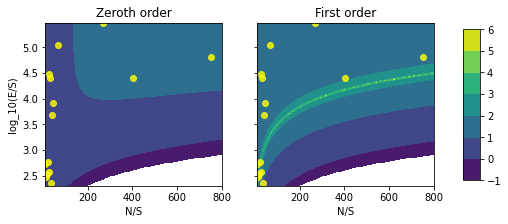

In [63]:
fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))

# Set contour range to go from the smallest difference to the biggest, in either data set
# Need one consistent range so colorscheme is accurate
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)

# Plot the contours
im1 = axs[0].contourf(ns,np.log10(es),z_bm1,contour)
im2 = axs[1].contourf(ns,np.log10(es),z_bm2,contour)

# Overlay the data
for ax in axs:
    ax.scatter(data['N']/data['S'],np.log10(data['E']/data['S']),c='yellow',alpha=0.8)

# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels and titles
axs[0].set_ylabel('log_10(E/S)')
for ax in axs:
    ax.set_xlabel('N/S')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

fig.savefig('figures/logcontours_data_ns200es200.pdf')

## What about smoothing?
This is annoying because there are nans, so smoothing is kind of a pain.

/Users/micbru/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/micbru/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


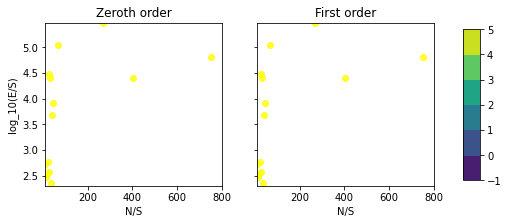

In [54]:
import scipy.ndimage

fig,axs = plt.subplots(1,2,sharey=True,figsize=(8,3))

# Set contour range to go from the smallest difference to the biggest, in either data set
# Need one consistent range so colorscheme is accurate
contour_floor =  np.min([np.floor(np.nanmin(z_bm1)),np.floor(np.nanmin(z_bm2))])
contour_ceil =  np.max([np.ceil(np.nanmax(z_bm1)),np.ceil(np.nanmax(z_bm2))])
contour = np.arange(contour_floor,contour_ceil+1)

# Smooth the data using cubic spline interpolation
z_bm1_smooth = scipy.ndimage.zoom(z_bm1,3)
z_bm2_smooth = scipy.ndimage.zoom(z_bm2,3)

ns_smooth = np.linspace(10,800,num=num_ns*3)
es_smooth = np.logspace(np.log10(200),np.log10(300000),num=num_es*3)

# Plot the contours
im1 = axs[0].contourf(ns_smooth,np.log10(es_smooth),z_bm1_smooth,contour)
im2 = axs[1].contourf(ns_smooth,np.log10(es_smooth),z_bm2_smooth,contour)

# Overlay the data
for ax in axs:
    ax.scatter(data['N']/data['S'],np.log10(data['E']/data['S']),c='yellow',alpha=0.8)

# Adjust and add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(im2, cax=cbar_ax)

# Now labels and titles
axs[0].set_ylabel('log_10(E/S)')
for ax in axs:
    ax.set_xlabel('N/S')
axs[0].set_title('Zeroth order')
axs[1].set_title('First order')

fig.savefig('figures/logcontours_data_ns20es150_smooth.pdf')

In [59]:
?scipy.ndimage.zoom